In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

print(tf.__version__)

2.10.0


## 获取数据
### 首先下载数据集。

### Load CAZyme dataset.


In [4]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\caz.sub.train.csv'


### Load Pfam datasets.


In [5]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\pfam.sub.train.csv'


### Load KEGG datasets.


In [6]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\kegg.sub.train.csv'


### Load COG


In [7]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\cog.sub.train.csv'


### Load TIGRFAM


In [8]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\cogtig.sub.train.csv'


### Load KEGG + CAZyme


In [9]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\kegg.caz.sub.train.csv'


### 使用 pandas 导入数据集。

In [10]:

raw_dataset = pd.read_csv(data_path2)

dataset = raw_dataset.copy()
dataset.tail()

F1   F2   F3   F4        F5   F6        F7        F8    F9  F10  ...  \
43  0.0  0.0  0.0  0.0 -0.042857  0.0  0.311508 -0.010714  0.15  0.0  ...   
44  0.0  0.0  0.0  0.0  0.342857  0.0  0.310714 -0.189286 -0.15  0.0  ...   
45  0.0  0.0  0.0  0.0  0.300000  0.0  0.622222 -0.200000  0.00  0.0  ...   
46  0.0  0.0  0.0  0.0  0.042857  0.0 -0.311508  0.010714 -0.15  0.0  ...   
47  0.0  0.0  0.0  0.0 -0.300000  0.0 -0.622222  0.200000  0.00  0.0  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
43   -1    0   -1    0    0    0    0    0    0     3.091857  
44    0    0    0    0    0    0    0    0    0     0.656584  
45   -1    0   -1    0    0    0    0    0    0   -20.695588  
46    1    0    1    0    0    0    0    0    0     3.251276  
47    1    0    1    0    0    0    0    0    0     2.406624  

[5 rows x 66 columns]

## 数据清洗
数据集中包括一些未知值。

In [11]:
dataset.isna().sum()

F1             0
F2             0
F3             0
F4             0
F5             0
              ..
F62            0
F63            0
F64            0
F65            0
interaction    0
Length: 66, dtype: int64

In [ ]:
dataset = dataset.dropna()

## 拆分训练数据集和测试数据集
现在需要将数据集拆分为一个训练数据集和一个测试数据集。

我们最后将使用测试数据集对模型进行评估。

In [12]:
predict=np.array([])
observe=np.array([])

### 分配数据
分成10份

In [13]:
train_dataset = dataset.sample(frac=0.9,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([0, 3, 39, 44, 45], dtype='int64')

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=1)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=2)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=3)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=4)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=5)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=6)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=7)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=8)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

In [ ]:
train_dataset = dataset.sample(frac=0.9,random_state=9)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

### 从标签中分离特征
将特征值从目标值或者"标签"中分离。 这个标签是你使用训练模型进行预测的值。

In [15]:
train_labels = train_dataset.pop('interaction')
test_labels = test_dataset.pop('interaction')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [16]:
normed_train_data = train_dataset
normed_test_data = test_dataset

## 模型
### 构建模型¶
让我们来构建我们自己的模型。这里，我们将会使用一个“顺序”模型，其中包含两个紧密相连的隐藏层，以及返回单个、连续值得输出层。模型的构建步骤包含于一个名叫 'build_model' 的函数中，稍后我们将会创建第二个模型。 两个密集连接的隐藏层。

In [17]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [18]:
model = build_model()

In [19]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 109ms/step


array([[-0.01536161],
       [ 0.11446819],
       [ 0.01383774],
       [ 0.01915411],
       [-0.00691385],
       [ 0.02427233],
       [-0.00691385],
       [-0.02226214],
       [ 0.00993797],
       [ 0.01373417]], dtype=float32)

### 训练模型
对模型进行1000个周期的训练，并在 history 对象中记录训练和验证的准确性。

In [20]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

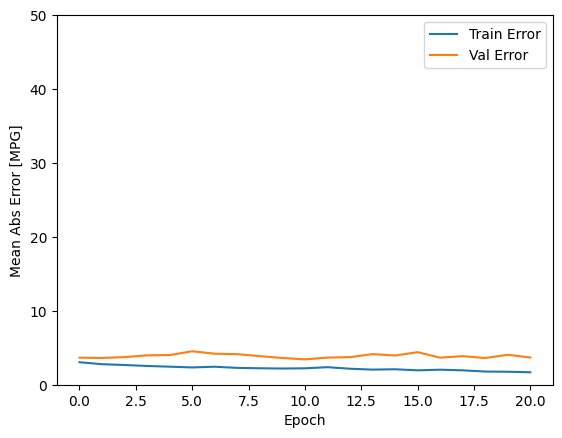

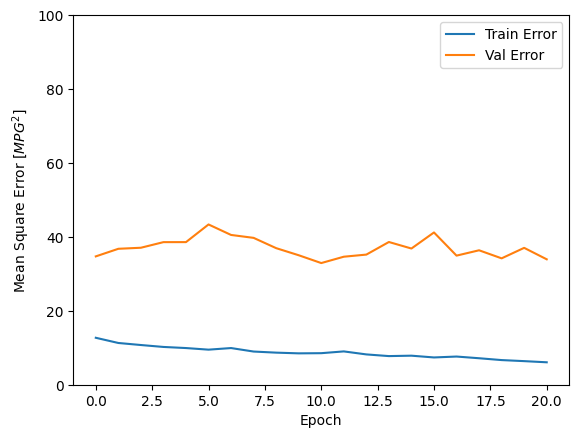

In [22]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()


plot_history(history)


...........

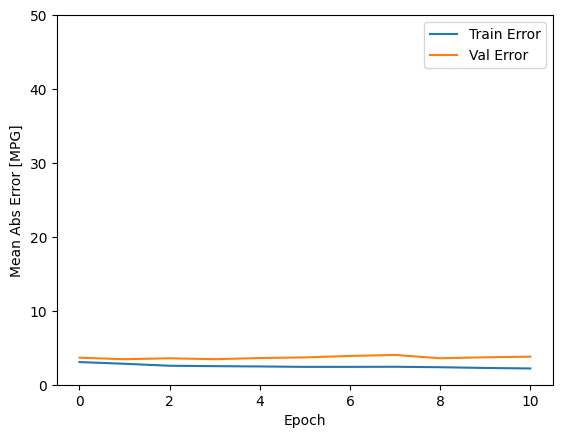

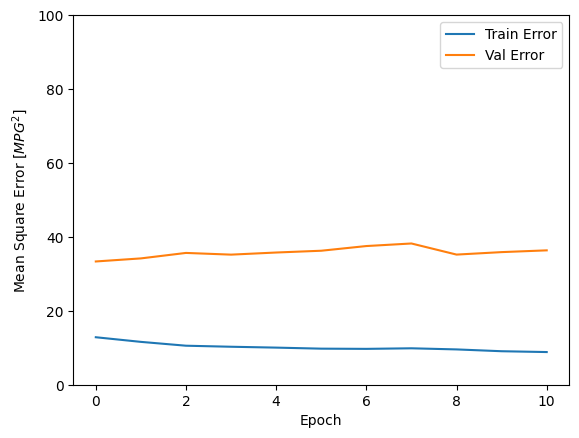

In [23]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

### 做预测
最后，使用测试集中的数据预测 MPG 值:

1/1 [==============================] - 0s 18ms/step


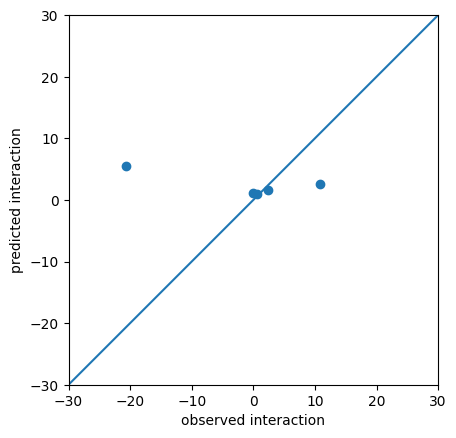

In [25]:
test_predictions = model.predict(normed_test_data).flatten()


plt.scatter(test_labels, test_predictions)
plt.xlabel('observed interaction')
plt.ylabel('predicted interaction')
plt.axis('equal')
plt.axis('square')
plt.xlim([-30,30])
plt.ylim([-30,30])
_ = plt.plot([-100, 100], [-100, 100])

In [26]:
predict=np.append(predict,test_predictions)
observe=np.append(observe,test_labels.values)

## All run with one block code.

0
    F1   F2   F3    F4        F5   F6        F7        F8    F9  F10  ...  \
0  0.0 -0.1 -0.1  0.19  0.233846  0.0  0.295825 -0.125459  0.09  0.0  ...   

   F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
0    0    0    0    1    0    2    1    1    1     -0.02402  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................................................................

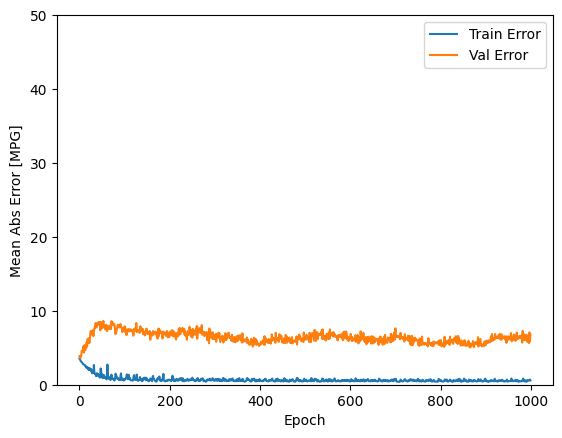

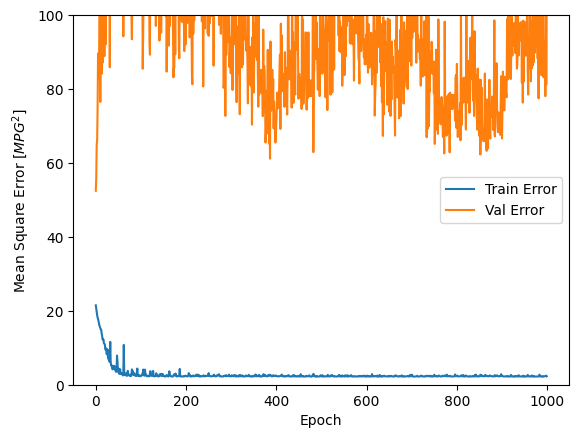


...........

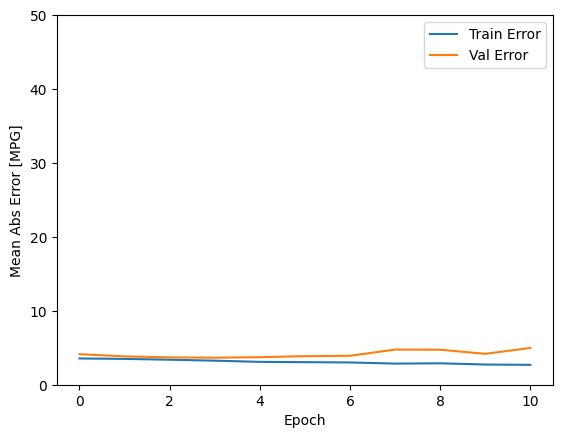

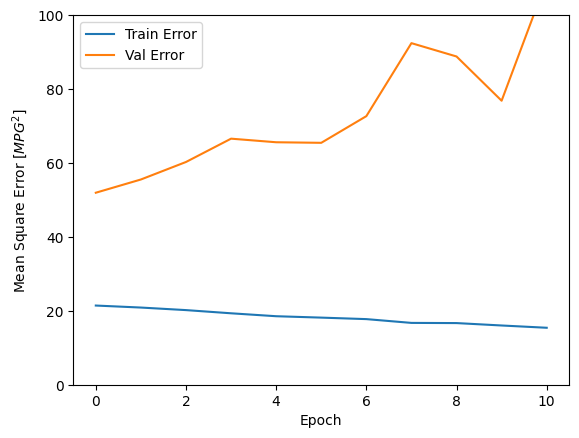

1/1 [==============================] - 0s 58ms/step
1
    F1   F2   F3    F4        F5   F6        F7        F8    F9  F10  ...  \
1  0.0  0.0  0.0  0.19 -0.096154  0.0 -0.774501 -0.505532 -0.14  0.0  ...   

   F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
1    0   -1    0    1    0    2    1    1    1     -5.46609  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................

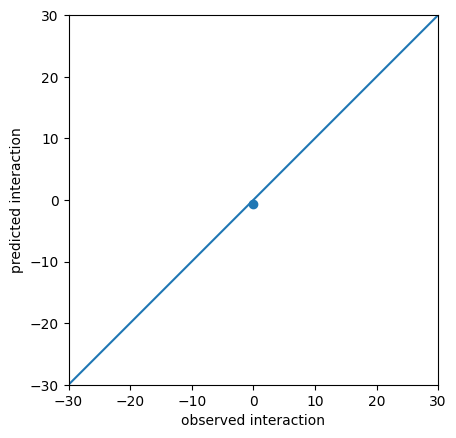

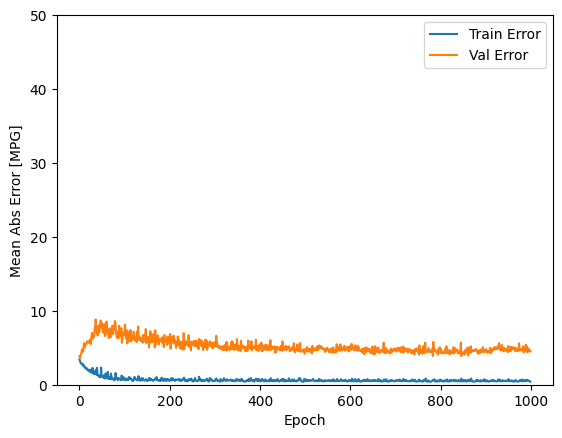

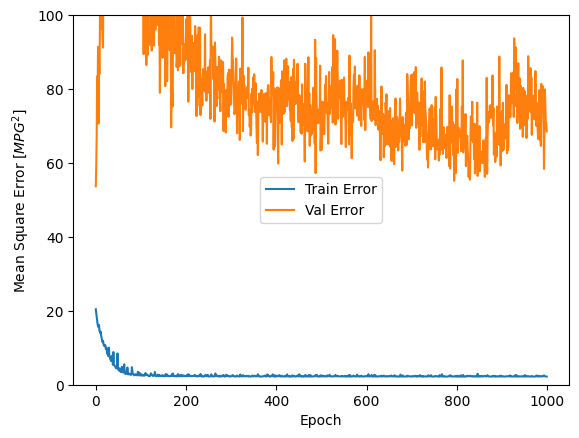


...........

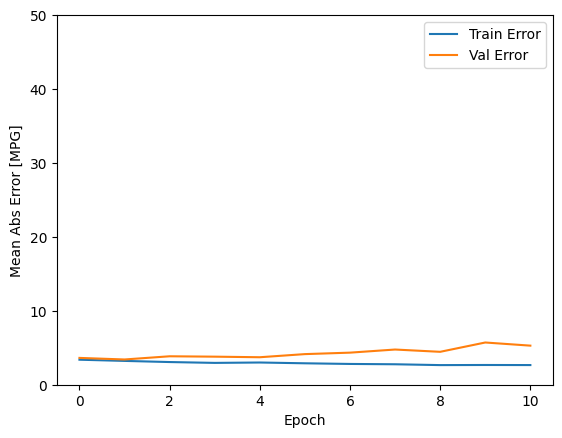

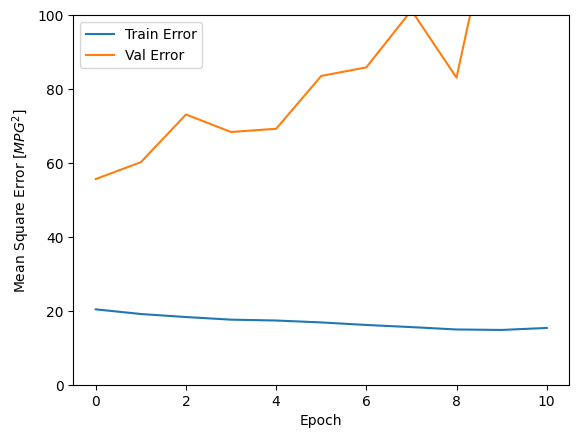

1/1 [==============================] - 0s 58ms/step
2
    F1   F2   F3    F4        F5   F6        F7        F8    F9  F10  ...  \
2  0.0  0.1  0.1 -0.19 -0.233846  0.0 -0.295825  0.125459 -0.09  0.0  ...   

   F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
2    0    0    0   -1    0   -2   -1   -1   -1      2.06187  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................

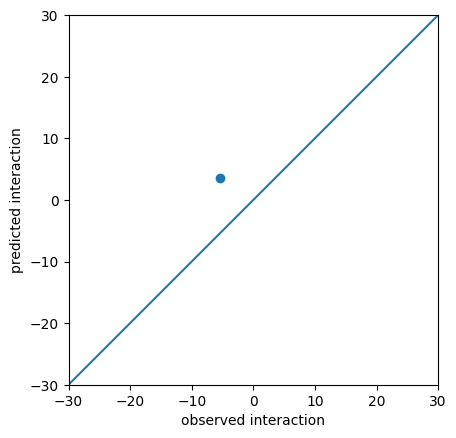

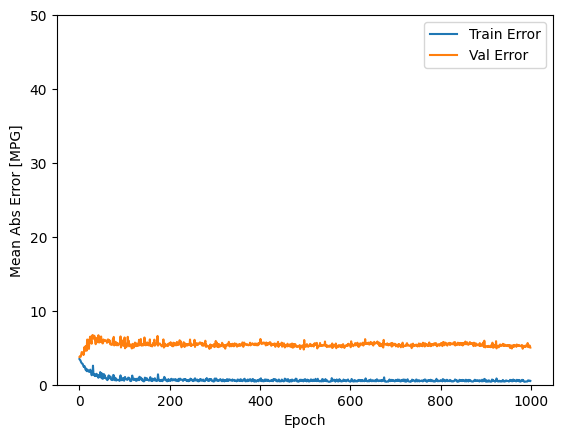

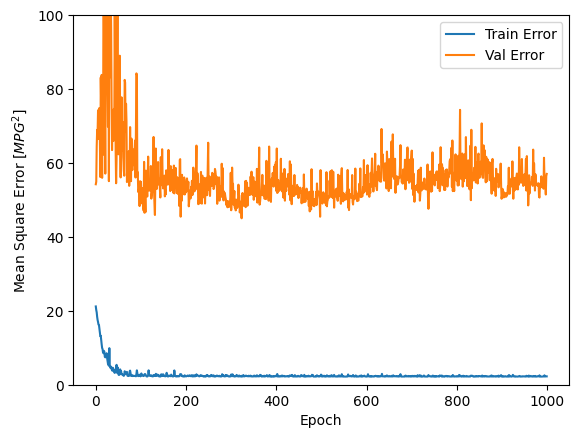


...........

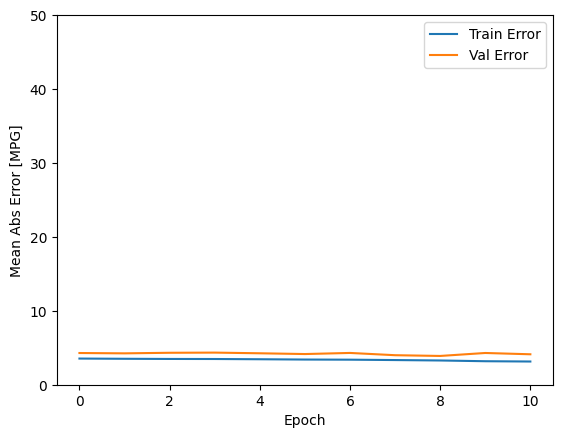

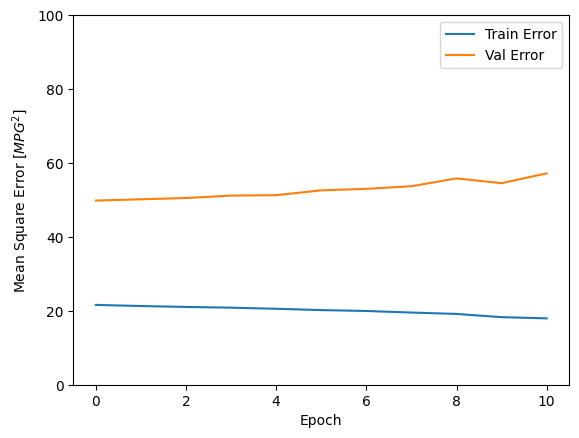

1/1 [==============================] - 0s 56ms/step
3
    F1   F2   F3   F4    F5   F6        F7        F8    F9  F10  ...  F57  \
3  0.0  0.1  0.1  0.0 -0.33  0.0 -1.070326 -0.380073 -0.23  0.0  ...    0   

   F58  F59  F60  F61  F62  F63  F64  F65  interaction  
3   -1    0    0    0    0    0    0    0    10.838264  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............................................

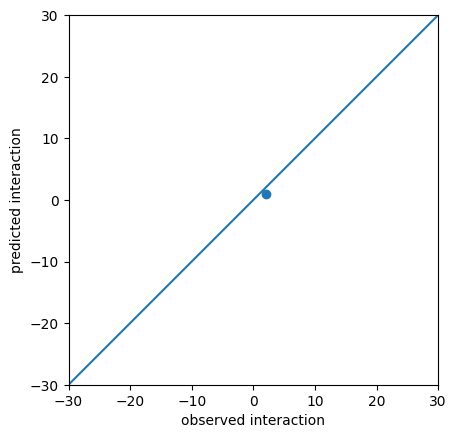

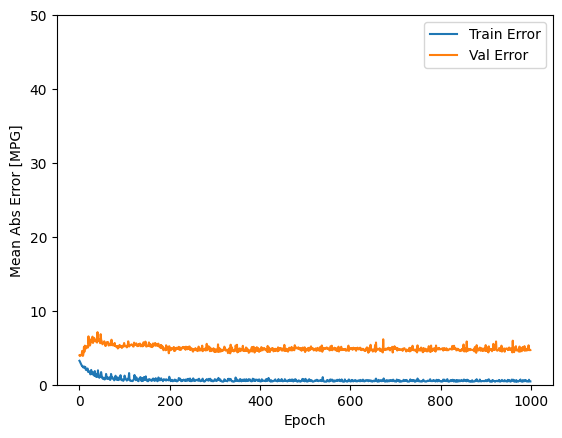

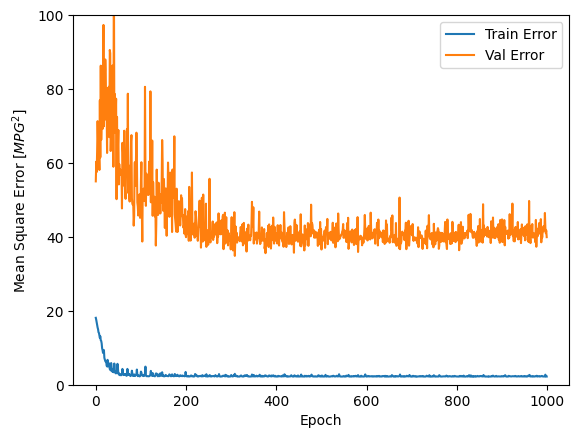


...........

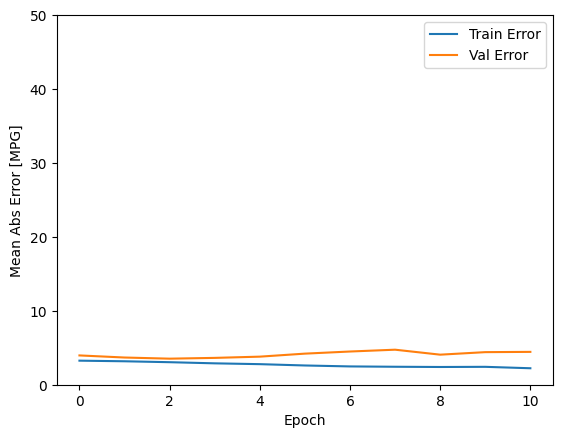

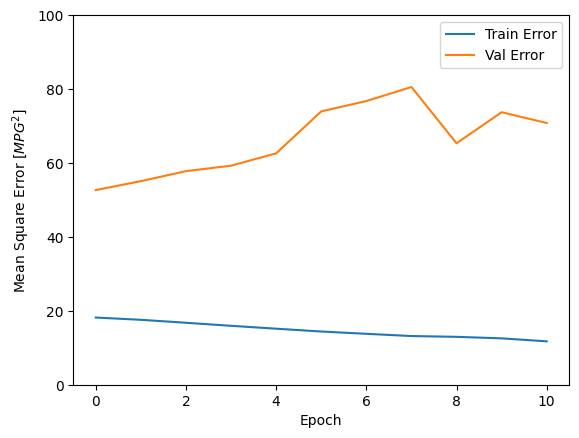

1/1 [==============================] - 0s 60ms/step
4
    F1   F2   F3    F4        F5   F6        F7        F8    F9  F10  ...  \
4  0.0  0.0  0.0 -0.19  0.096154  0.0  0.774501  0.505532  0.14  0.0  ...   

   F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
4    0    1    0   -1    0   -2   -1   -1   -1       2.9835  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.....................................

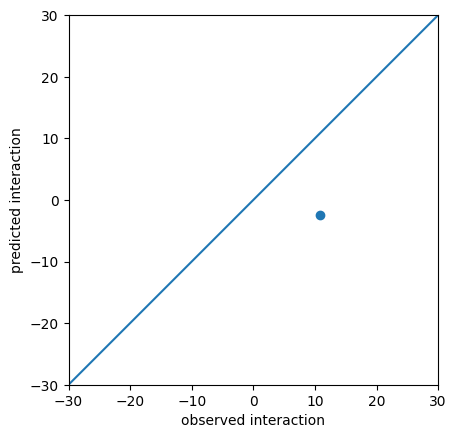

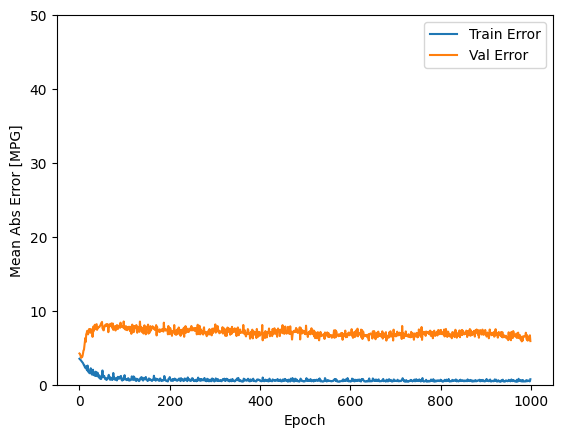

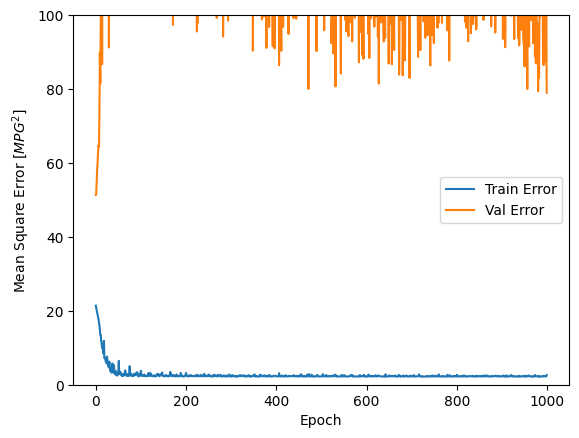


...........

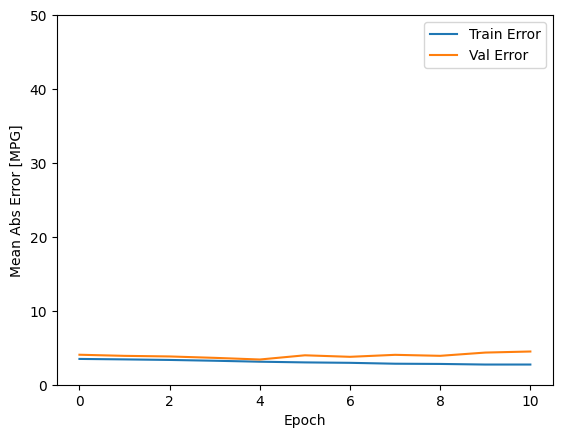

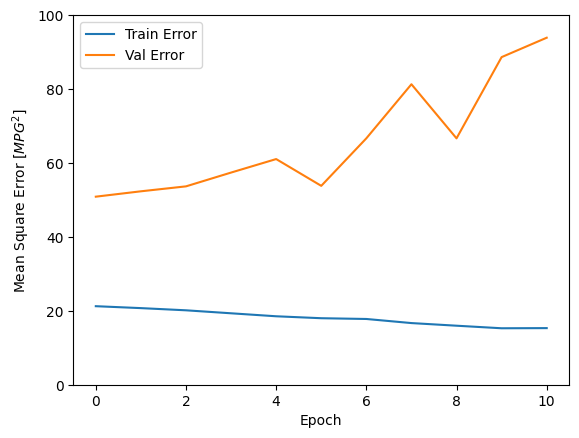

1/1 [==============================] - 0s 61ms/step
5
    F1   F2   F3   F4    F5   F6        F7        F8    F9  F10  ...  F57  \
5  0.0 -0.1 -0.1  0.0  0.33  0.0  1.070326  0.380073  0.23  0.0  ...    0   

   F58  F59  F60  F61  F62  F63  F64  F65  interaction  
5    1    0    0    0    0    0    0    0     3.255937  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............................................

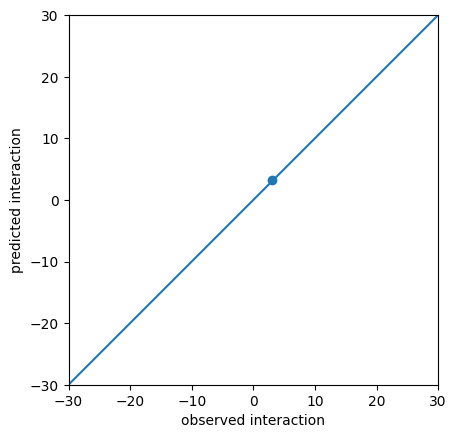

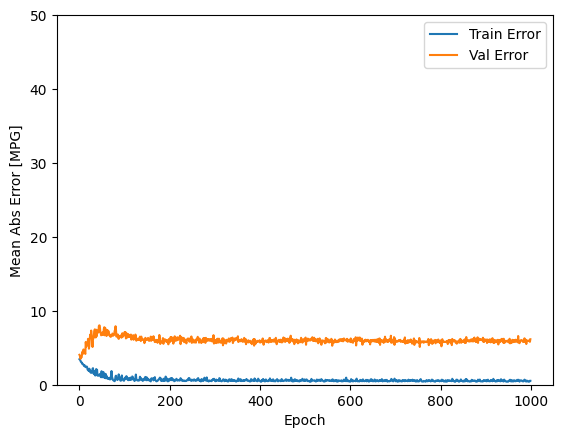

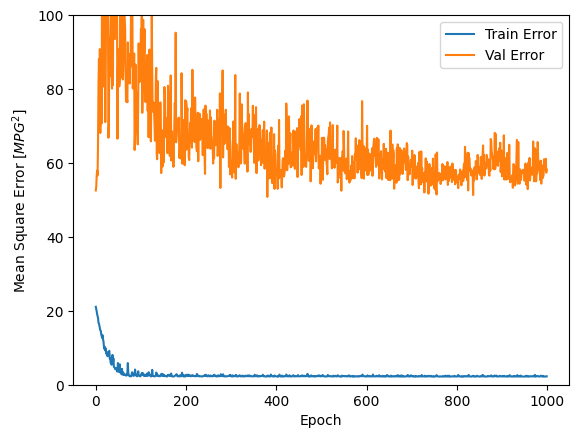


...........

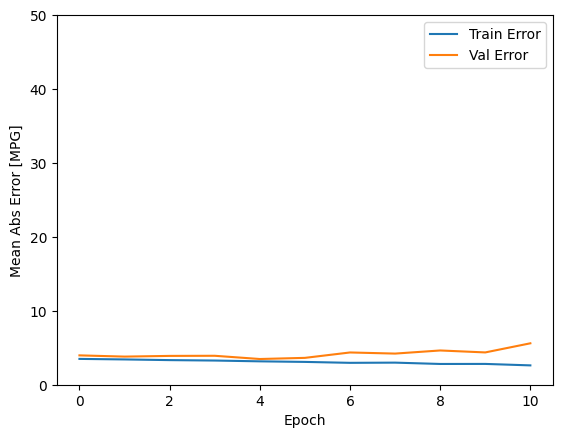

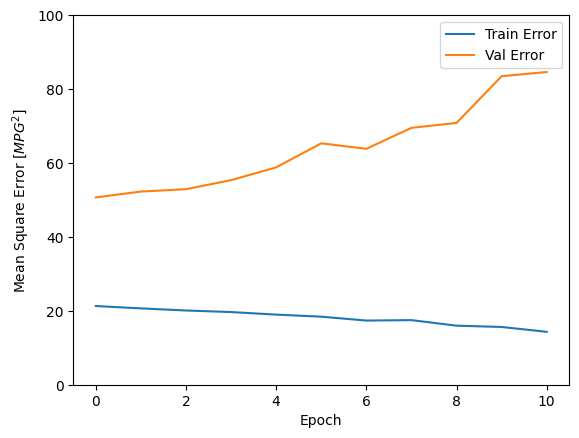

1/1 [==============================] - 0s 58ms/step
6
    F1   F2   F3   F4       F5   F6        F7        F8   F9   F10  ...  F57  \
6  0.0  0.0  0.0  0.0  0.00067  0.0  0.109239 -0.024418  0.0  0.13  ...    0   

   F58  F59  F60  F61  F62  F63  F64  F65  interaction  
6    0    0    0    0    0    0    0    0    -1.343178  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................

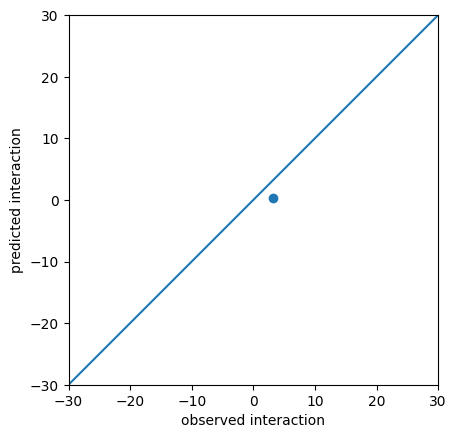

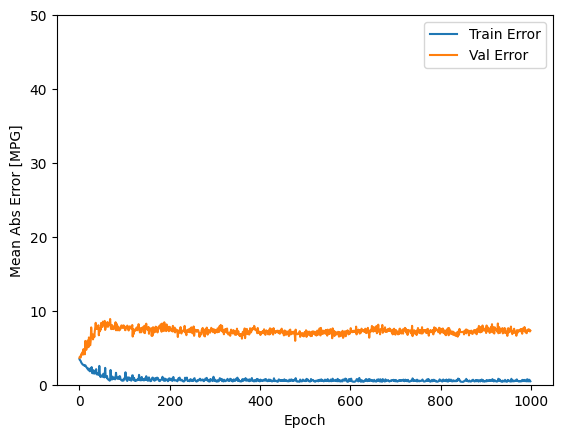

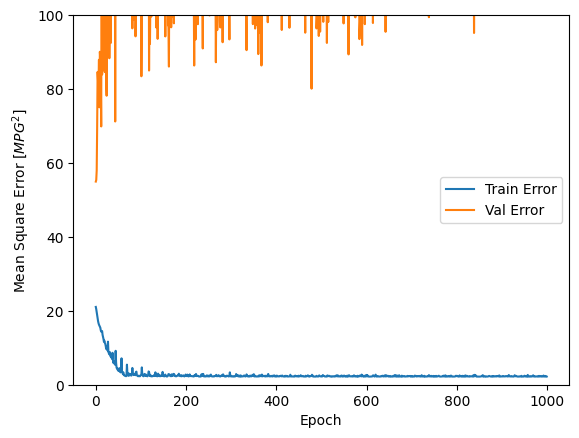


...........

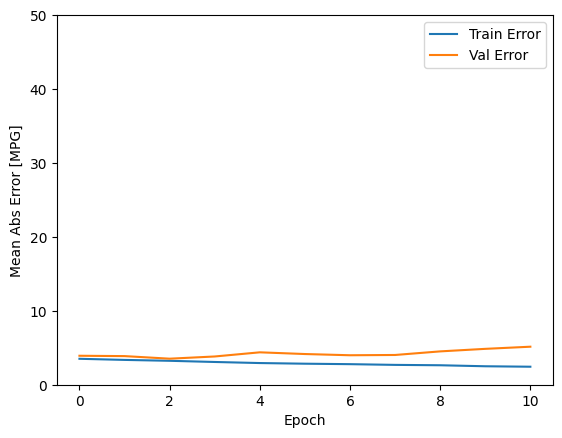

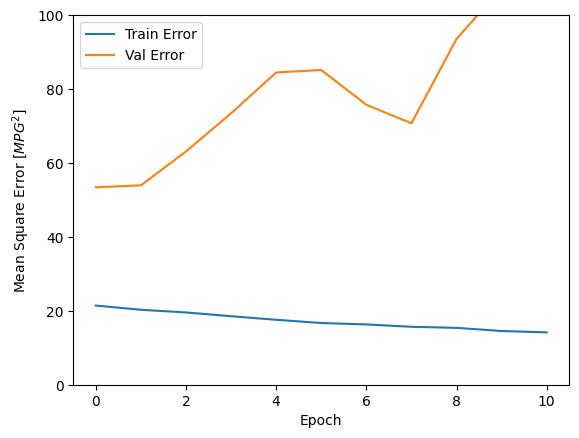

1/1 [==============================] - 0s 59ms/step
7
    F1    F2   F3   F4       F5    F6        F7        F8    F9   F10  ...  \
7  0.0 -0.18  0.0  0.0 -0.08033 -0.18  0.235978 -0.100758 -0.05  0.13  ...   

   F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
7    0    0    0    0    0    0    0    0    0    -0.658642  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...................................

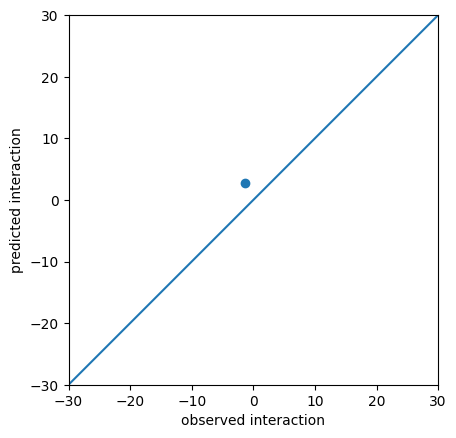

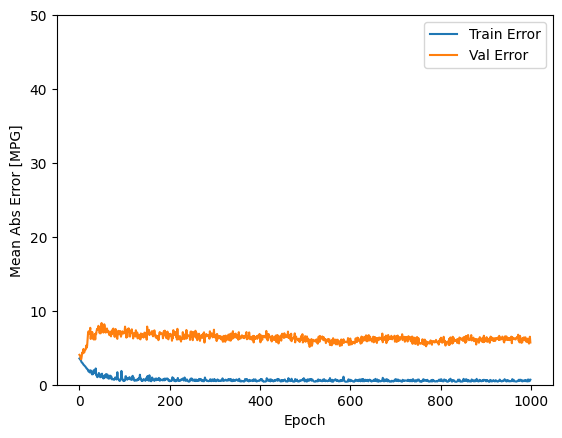

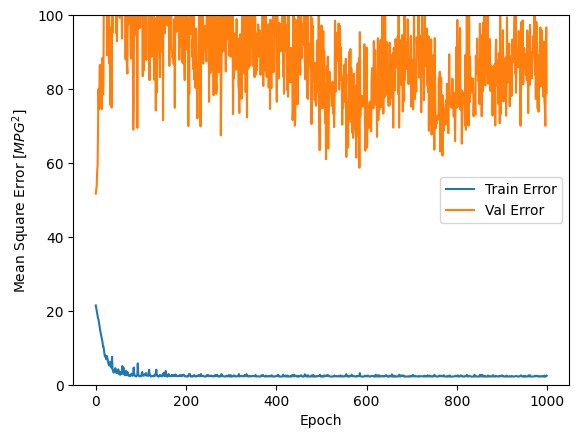


...........

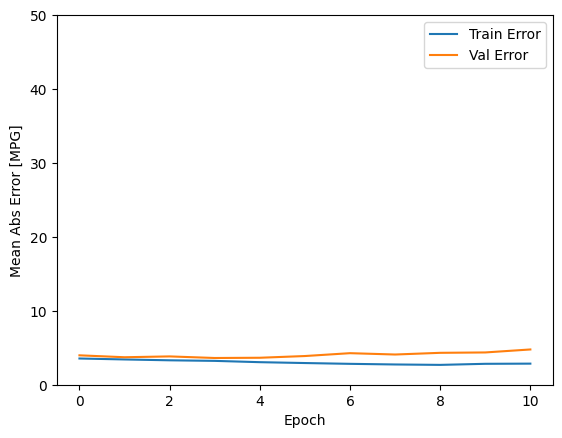

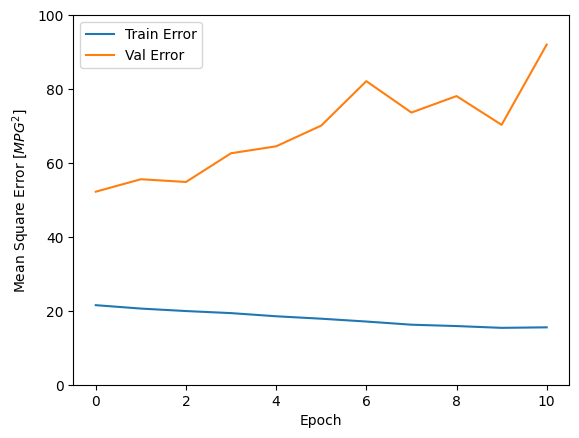

1/1 [==============================] - 0s 56ms/step
8
    F1   F2   F3   F4       F5   F6        F7        F8   F9   F10  ...  F57  \
8  0.0  0.0  0.0  0.0 -0.00067  0.0 -0.109239  0.024418  0.0 -0.13  ...    0   

   F58  F59  F60  F61  F62  F63  F64  F65  interaction  
8    0    0    0    0    0    0    0    0     3.345386  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................

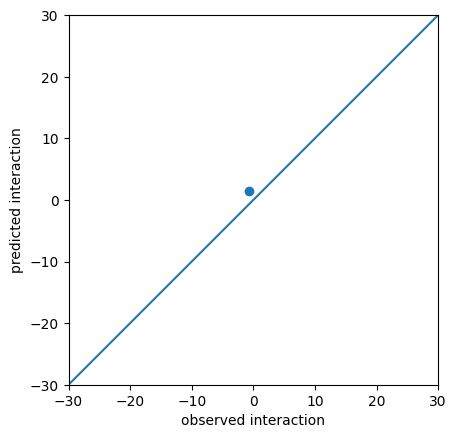

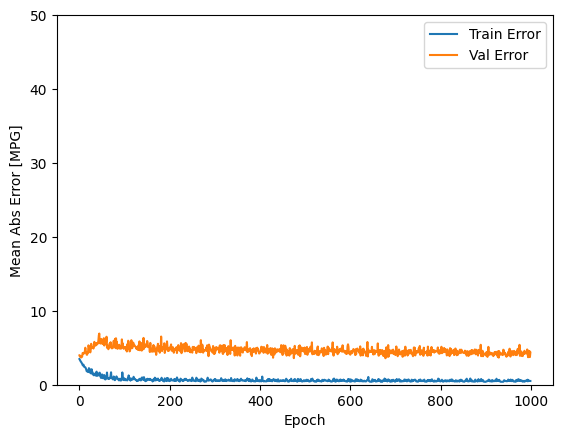

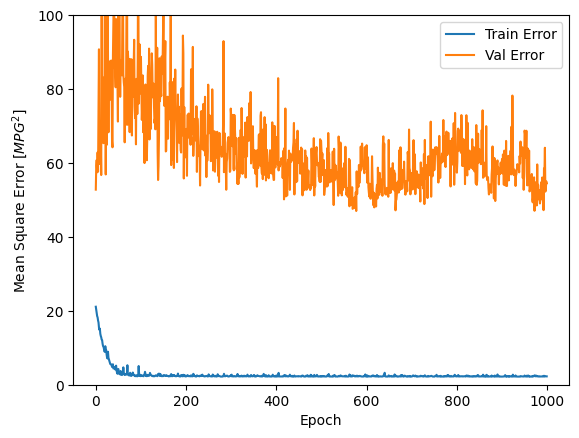


...........

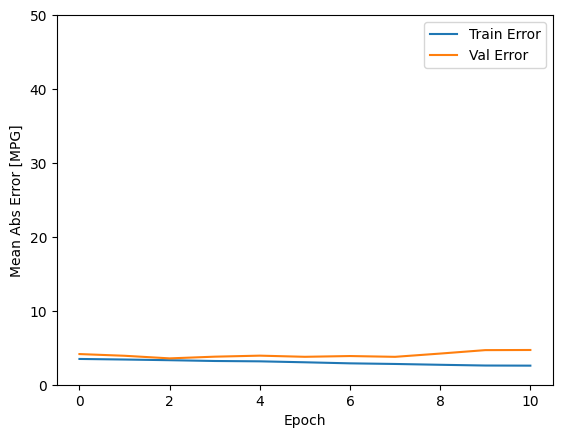

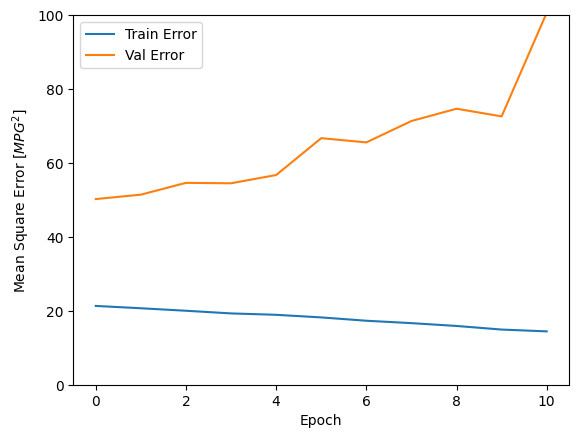

1/1 [==============================] - 0s 57ms/step
9
    F1    F2   F3   F4     F5    F6        F7        F8    F9  F10  ...  F57  \
9  0.0 -0.18  0.0  0.0 -0.081 -0.18  0.126739 -0.076341 -0.05  0.0  ...    0   

   F58  F59  F60  F61  F62  F63  F64  F65  interaction  
9    0    0    0    0    0    0    0    0   -15.650074  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
.........................................

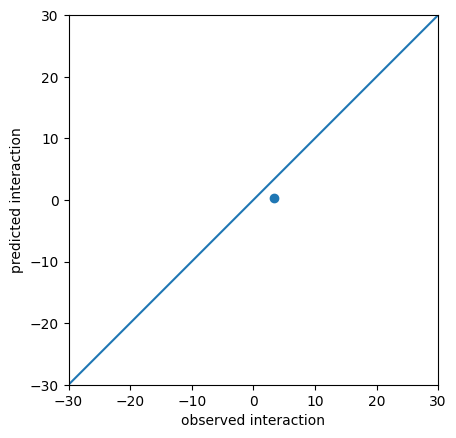

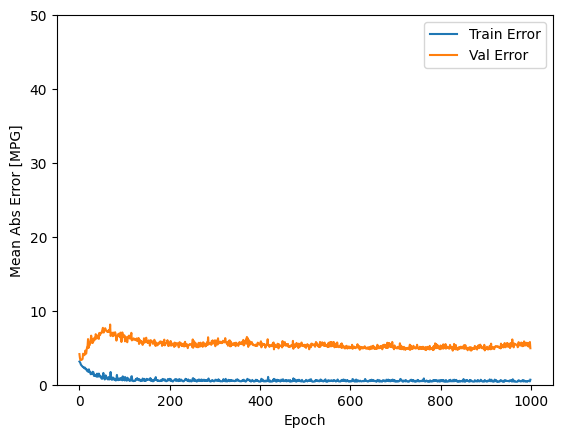

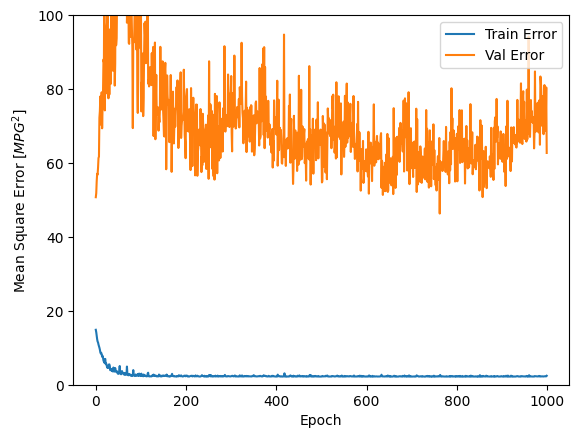


...........

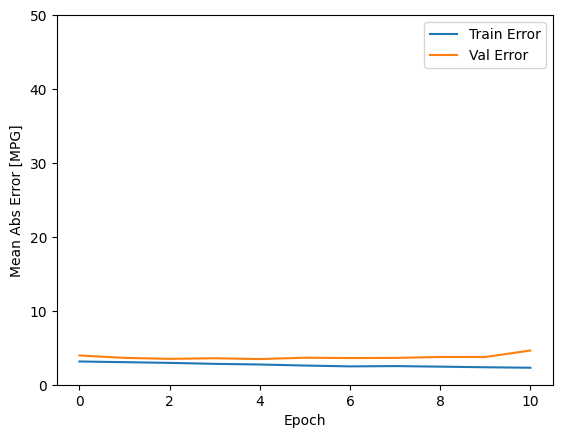

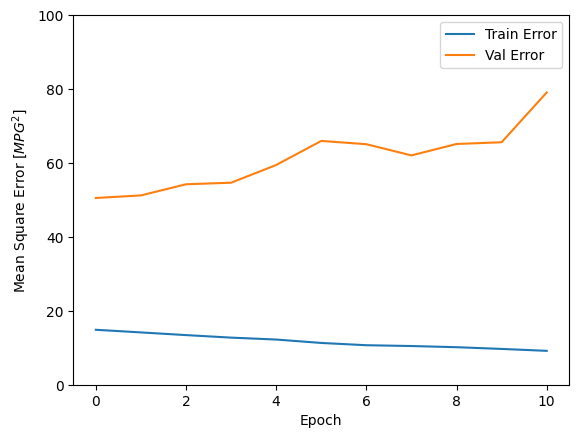

1/1 [==============================] - 0s 62ms/step
10
     F1    F2   F3   F4       F5    F6        F7        F8    F9   F10  ...  \
10  0.0  0.18  0.0  0.0  0.08033  0.18 -0.235978  0.100758  0.05 -0.13  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
10    0    0    0    0    0    0    0    0    0     5.397608  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..............................

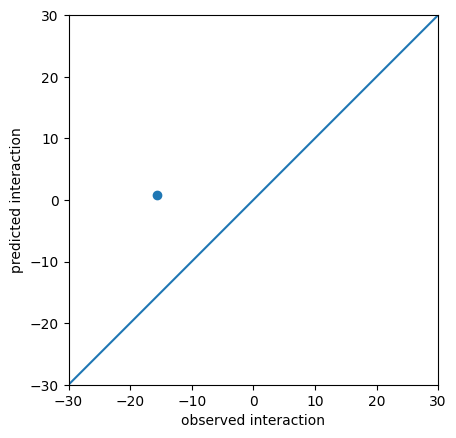

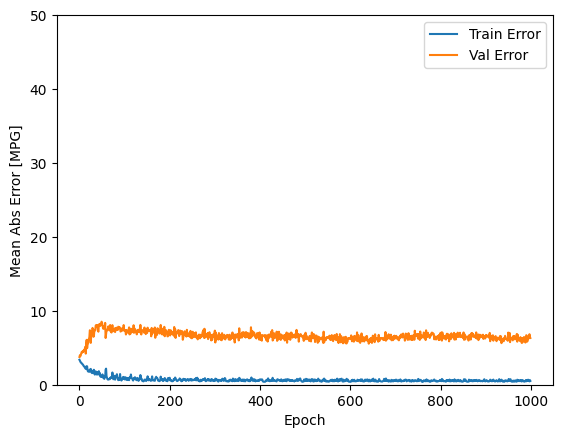

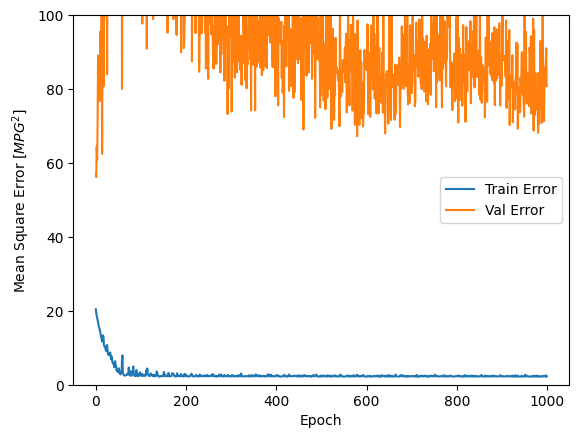


...........

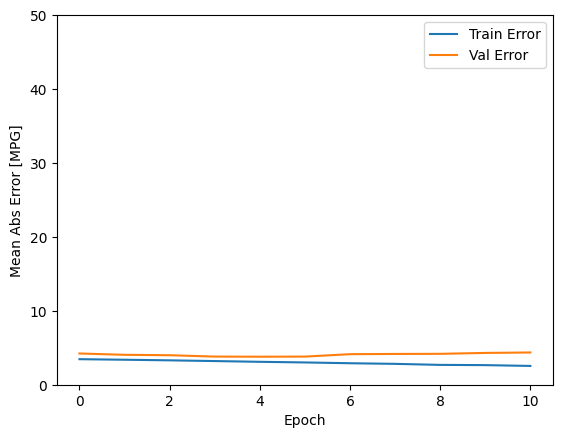

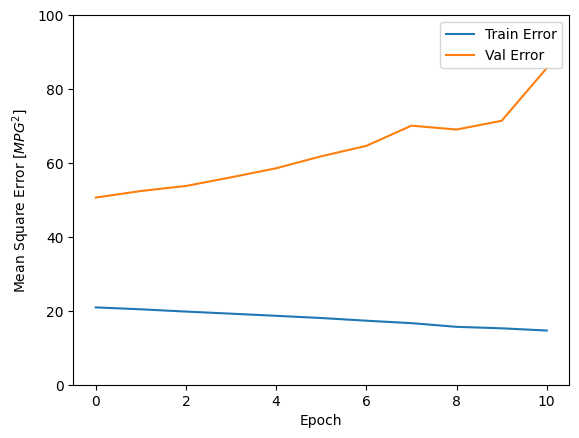

1/1 [==============================] - 0s 56ms/step
11
     F1    F2   F3   F4     F5    F6        F7        F8    F9  F10  ...  F57  \
11  0.0  0.18  0.0  0.0  0.081  0.18 -0.126739  0.076341  0.05  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
11    0    0    0    0    0    0    0    0    -4.254459  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................

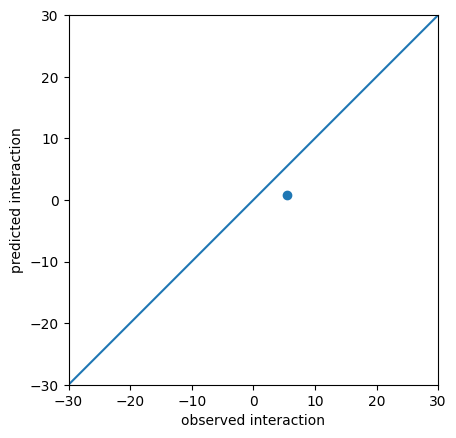

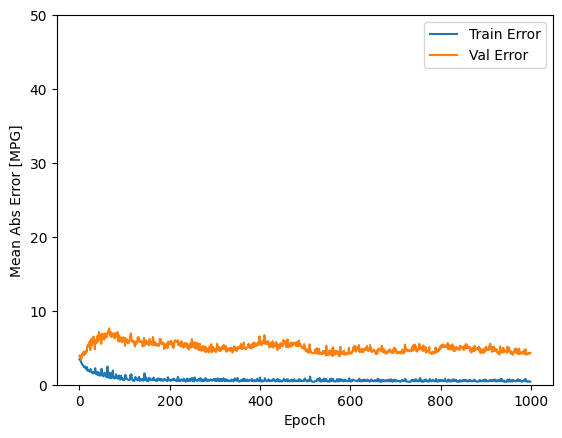

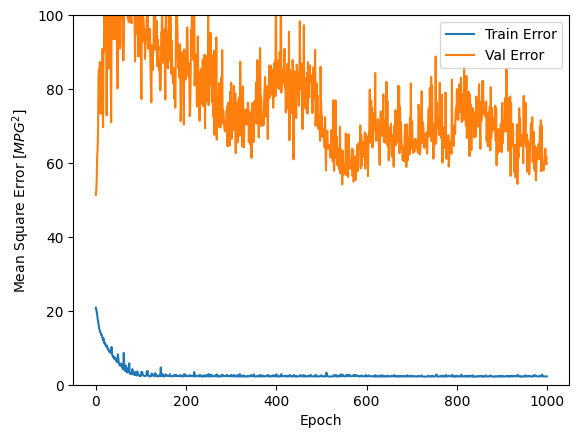


...........

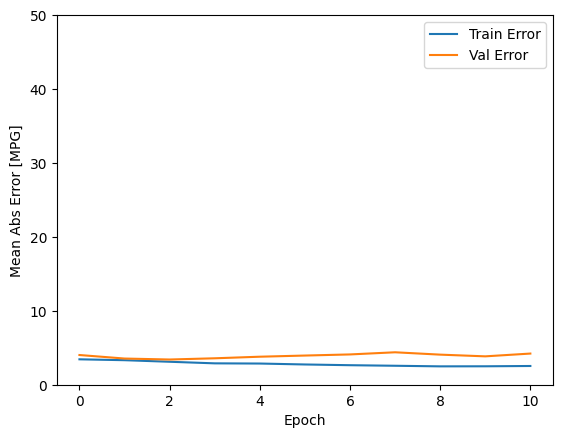

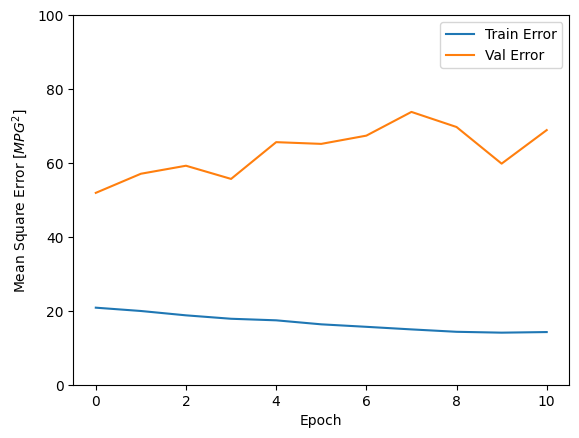

1/1 [==============================] - 0s 56ms/step
12
     F1   F2   F3   F4      F5   F6    F7      F8    F9  F10  ...  F57  F58  \
12  0.0  0.0  0.0  0.0 -0.3994  0.0  0.27 -0.1674 -0.15  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
12    0    0    0    0    0   -1    0    -1.881543  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

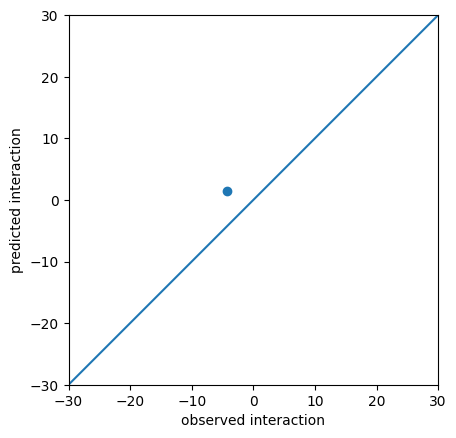

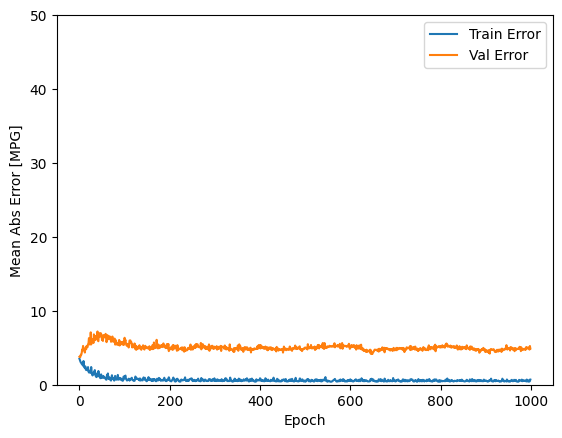

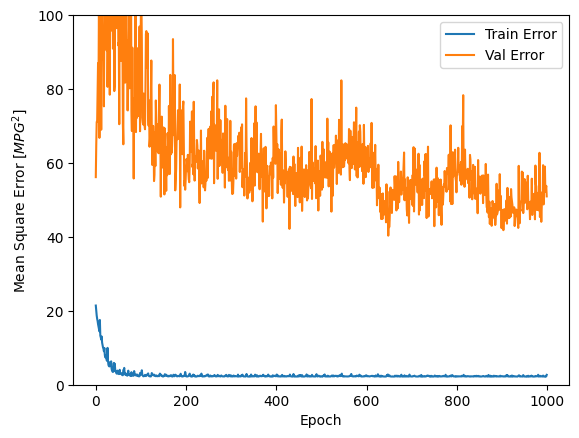


...........

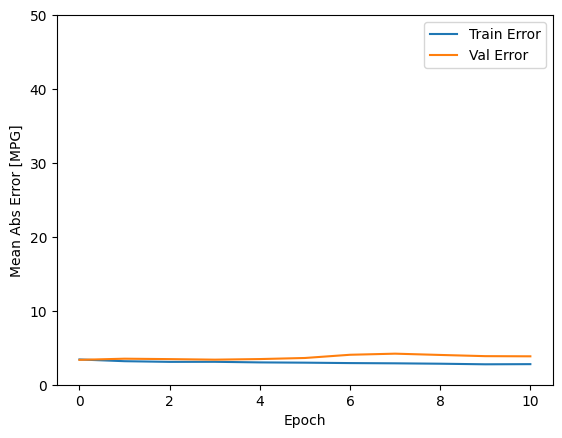

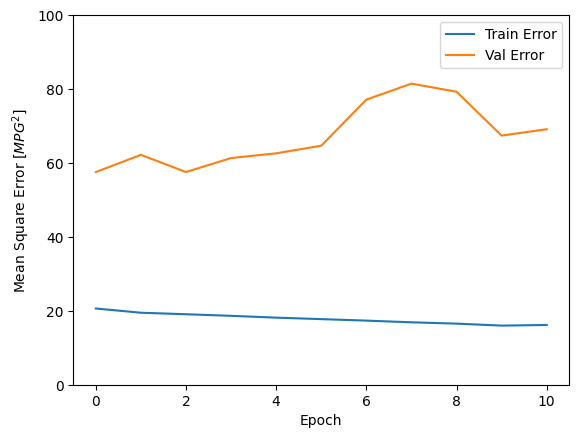

1/1 [==============================] - 0s 58ms/step
13
     F1    F2   F3   F4    F5   F6        F7        F8    F9   F10  ...  F57  \
13  0.0 -0.15  0.0  0.0 -0.01  0.0  0.010676 -0.082973 -0.01 -0.15  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
13    0    0    0    0    0    0    0    0    -0.753414  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

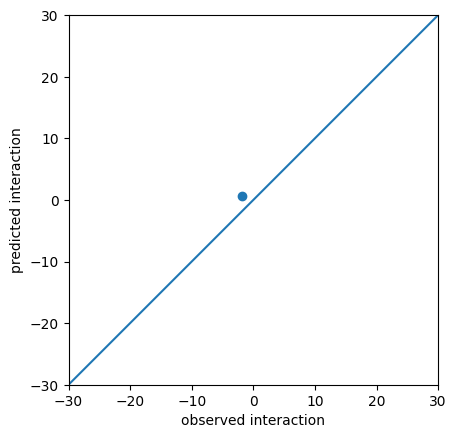

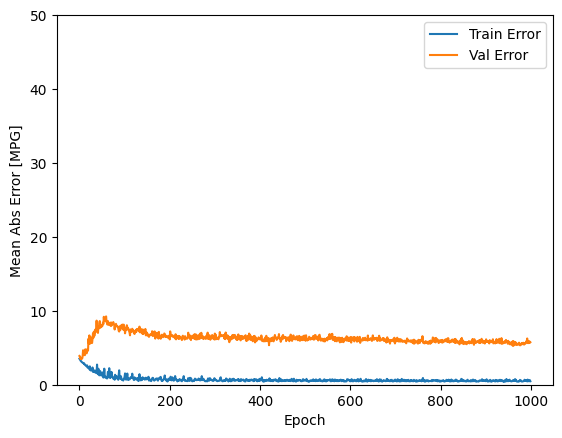

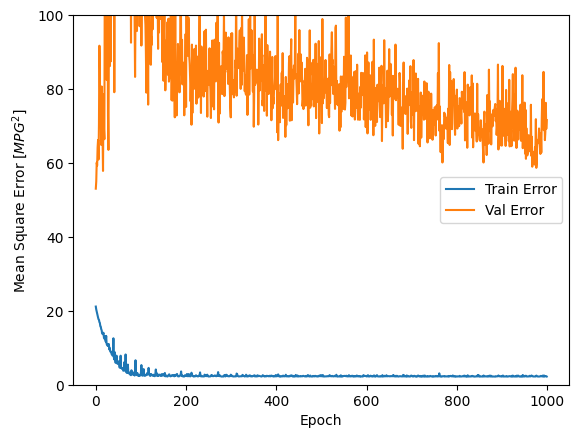


...........

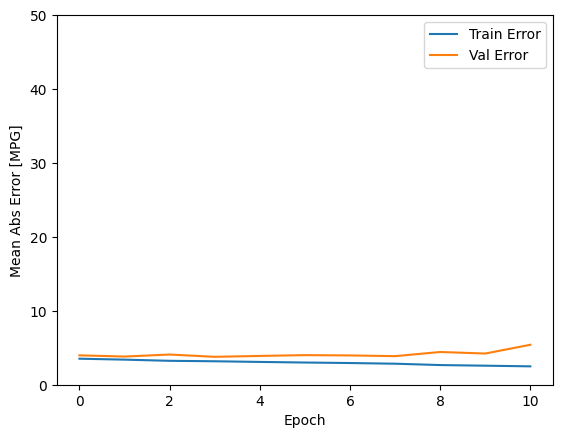

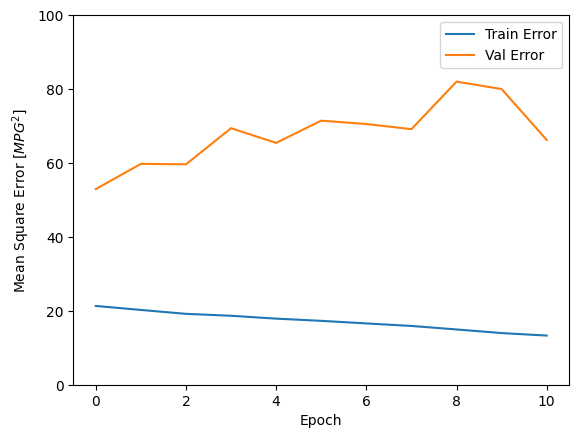

1/1 [==============================] - 0s 61ms/step
14
     F1   F2   F3   F4      F5   F6    F7      F8    F9  F10  ...  F57  F58  \
14  0.0  0.0  0.0  0.0  0.3994  0.0 -0.27  0.1674  0.15  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
14    0    0    0    0    0    1    0     3.819703  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

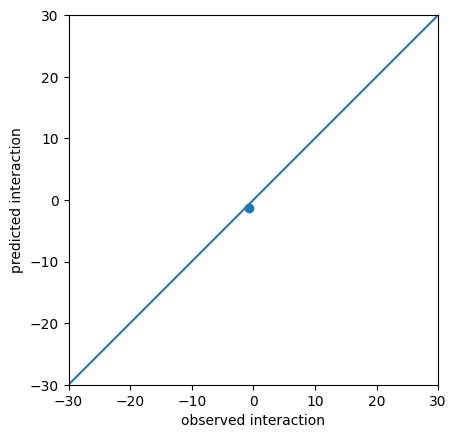

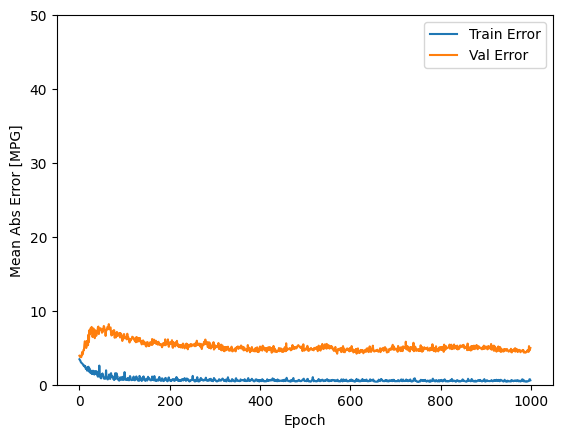

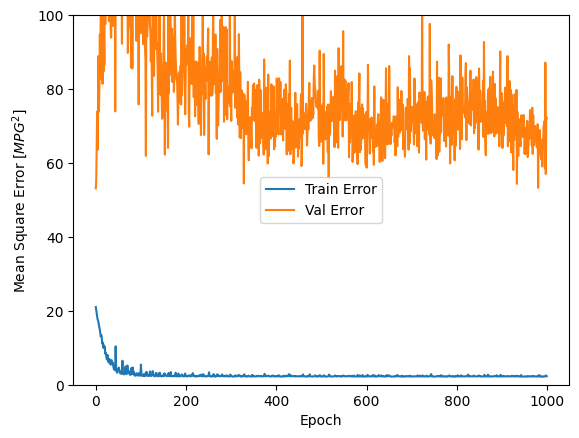


...........

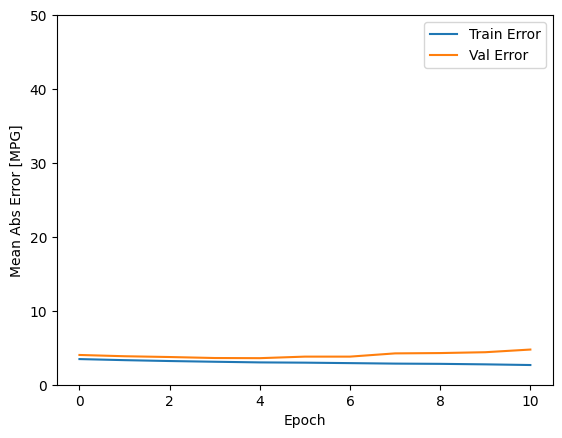

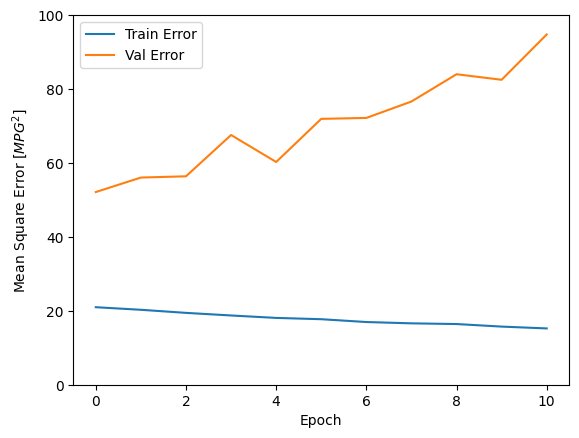

1/1 [==============================] - 0s 57ms/step
15
     F1    F2   F3   F4      F5   F6        F7        F8    F9   F10  ...  \
15  0.0 -0.15  0.0  0.0  0.3894  0.0 -0.259324  0.084427  0.14 -0.15  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
15    0    0    0    0    0    0    0    1    0    -1.177483  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................

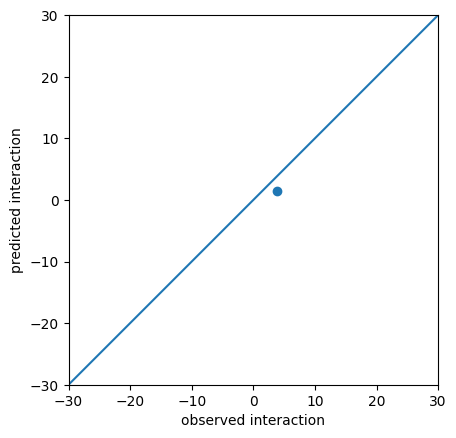

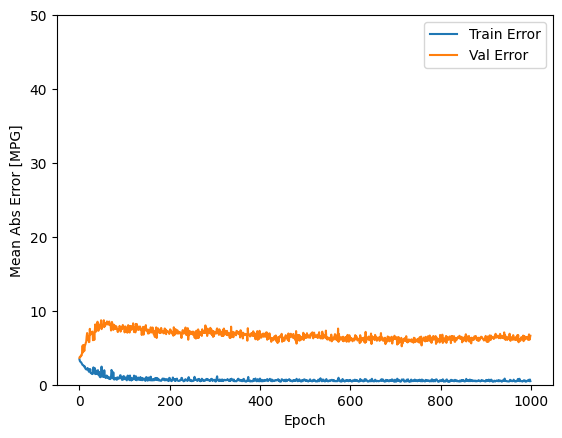

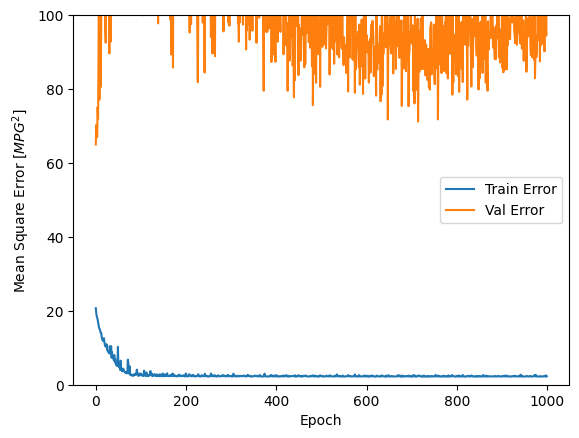


...........

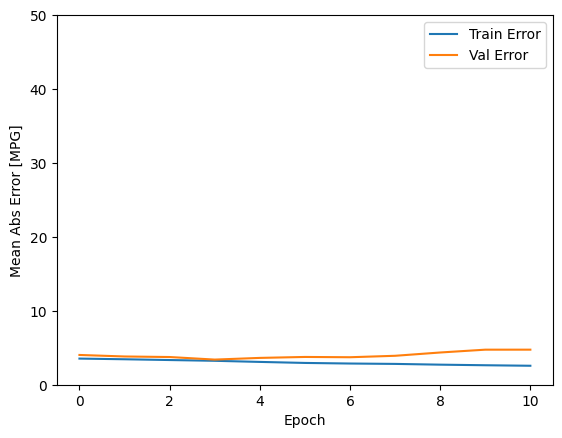

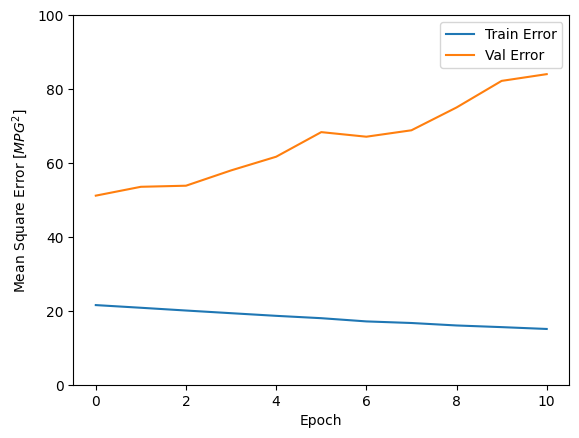

1/1 [==============================] - 0s 57ms/step
16
     F1    F2   F3   F4    F5   F6        F7        F8    F9   F10  ...  F57  \
16  0.0  0.15  0.0  0.0  0.01  0.0 -0.010676  0.082973  0.01  0.15  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
16    0    0    0    0    0    0    0    0     3.190785  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

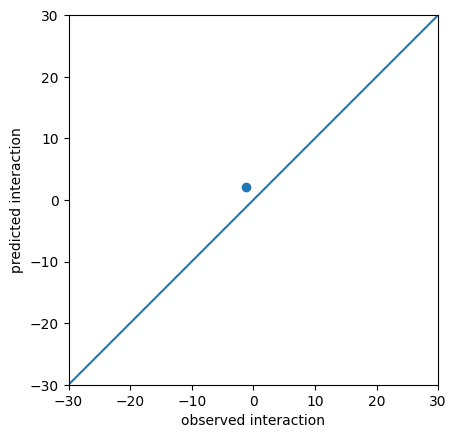

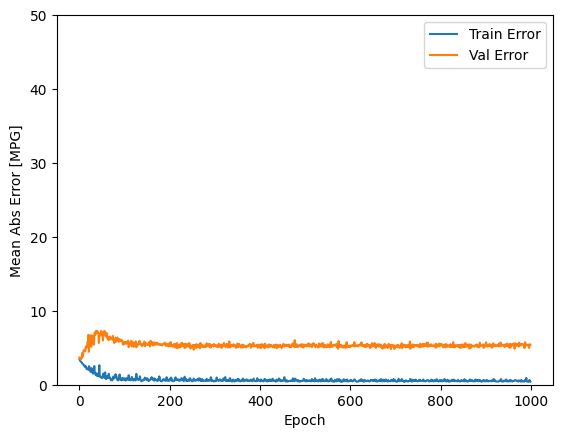

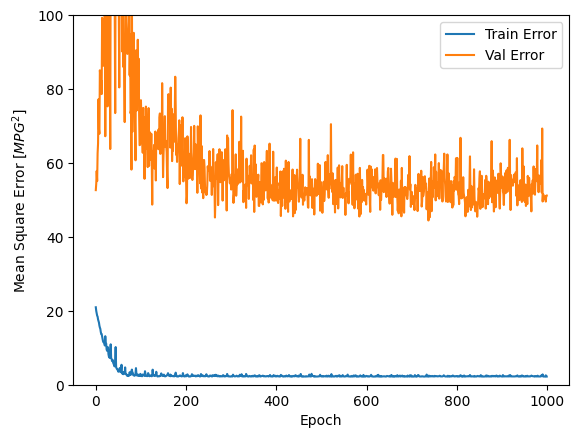


...........

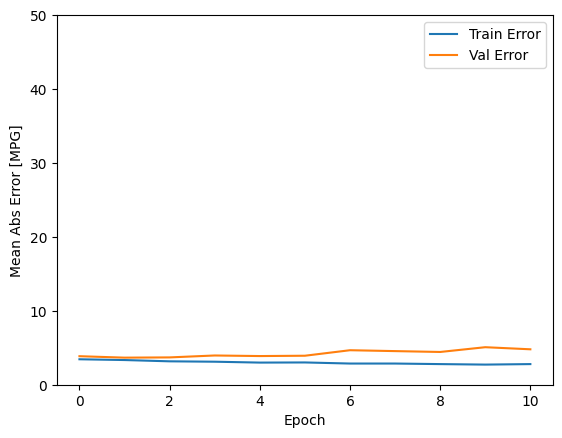

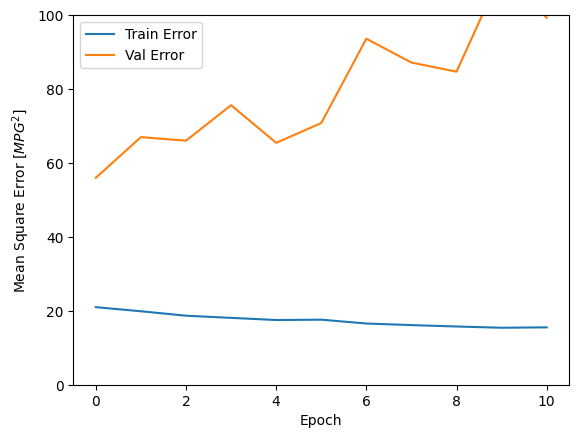

1/1 [==============================] - 0s 59ms/step
17
     F1    F2   F3   F4      F5   F6        F7        F8    F9   F10  ...  \
17  0.0  0.15  0.0  0.0 -0.3894  0.0  0.259324 -0.084427 -0.14  0.15  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
17    0    0    0    0    0    0    0   -1    0     2.782601  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................

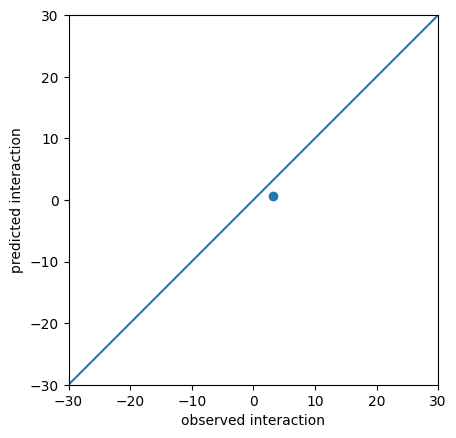

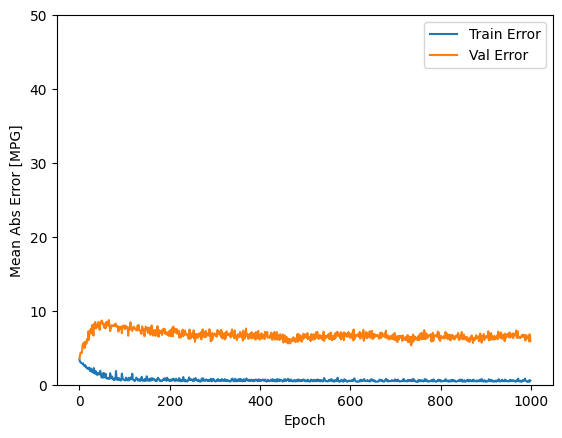

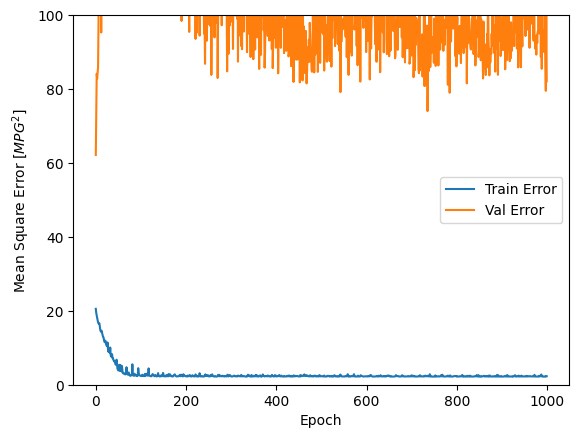


...........

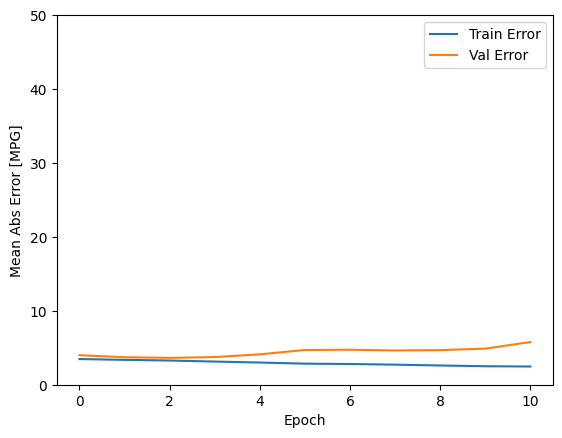

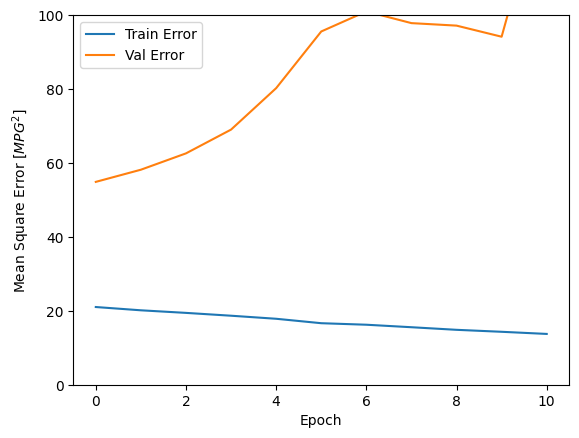

1/1 [==============================] - 0s 58ms/step
18
     F1   F2   F3   F4      F5   F6        F7        F8    F9  F10  ...  F57  \
18  0.0  0.0  0.0  0.0 -0.4094  0.0  0.218596 -0.152312 -0.16  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
18    0    0    0    0    0    0   -1    0    -1.209811  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

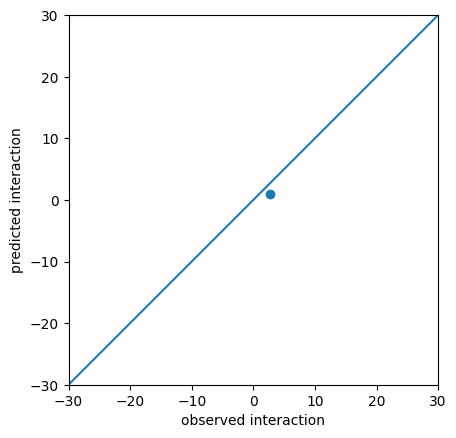

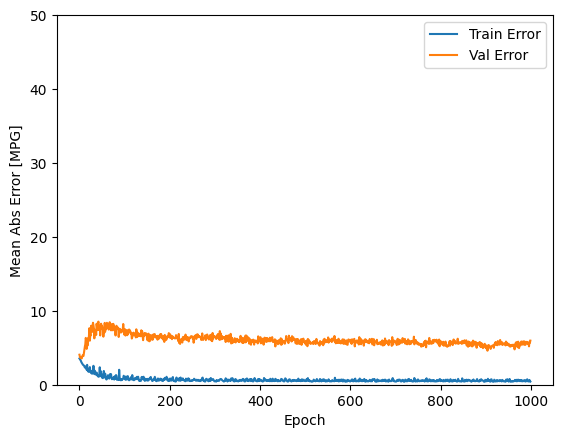

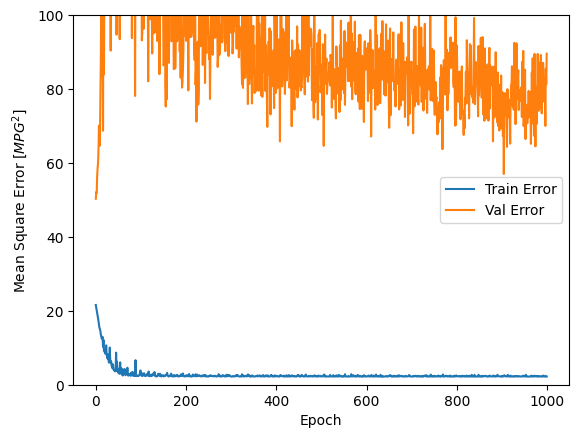


...........

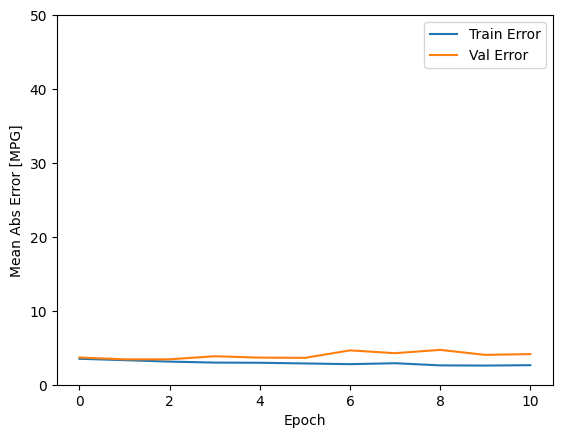

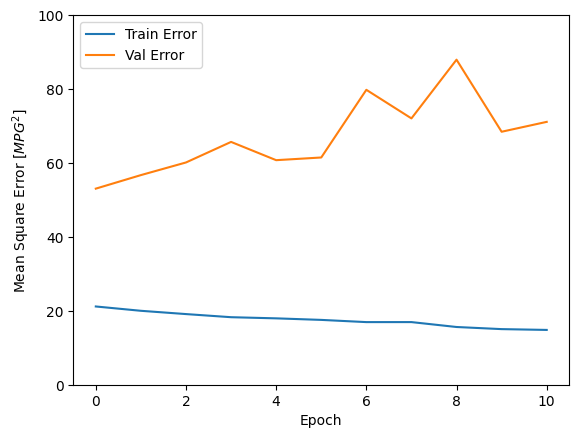

1/1 [==============================] - 0s 59ms/step
19
     F1   F2   F3   F4    F5   F6        F7        F8    F9  F10  ...  F57  \
19  0.0  0.0  0.0  0.0  0.13  0.0  0.508596  0.155088  0.13  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
19    0    0    0    0    0    0    0    0    -4.737554  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

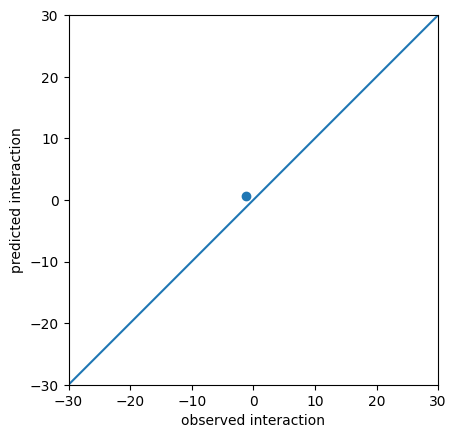

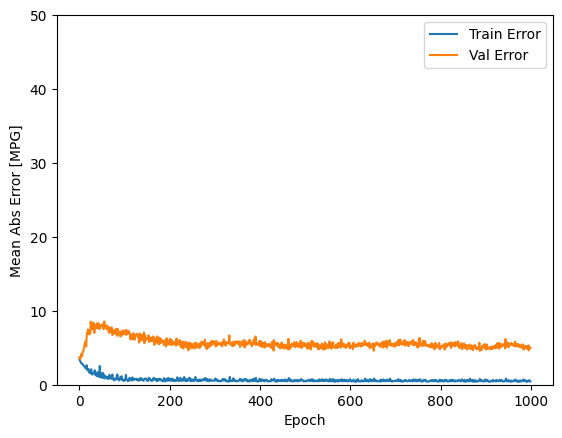

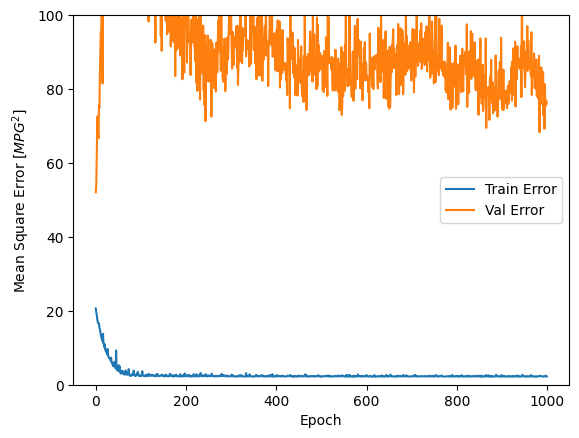


...........

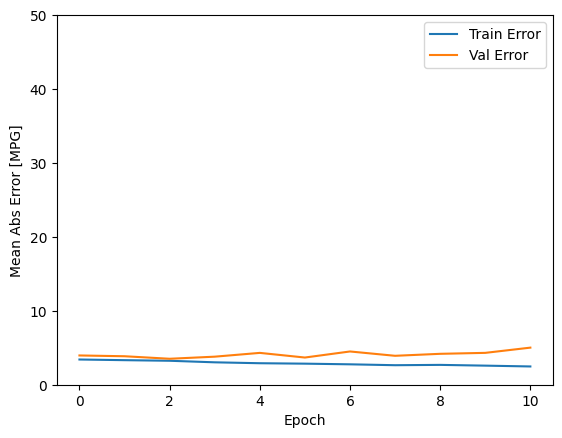

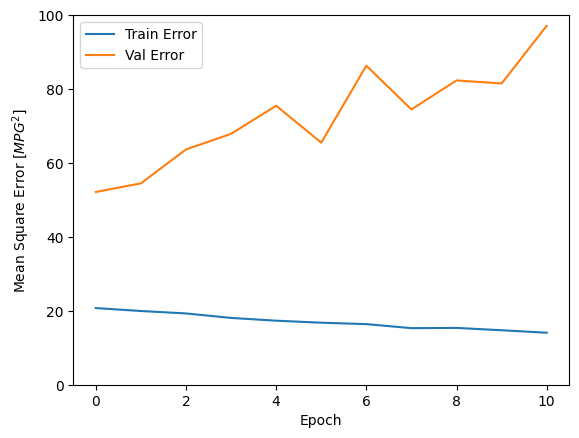

1/1 [==============================] - 0s 58ms/step
20
     F1   F2   F3   F4      F5   F6        F7        F8    F9  F10  ...  F57  \
20  0.0  0.0  0.0  0.0  0.4094  0.0 -0.218596  0.152312  0.16  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
20    0    0    0    0    0    0    1    0     3.381545  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

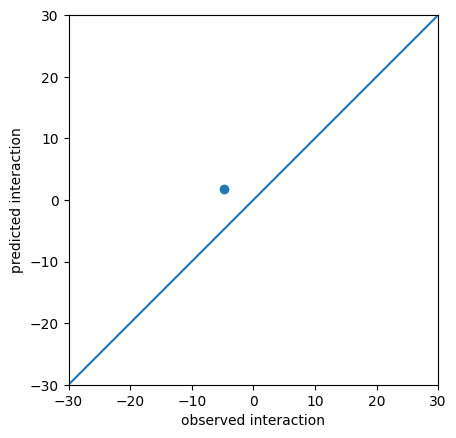

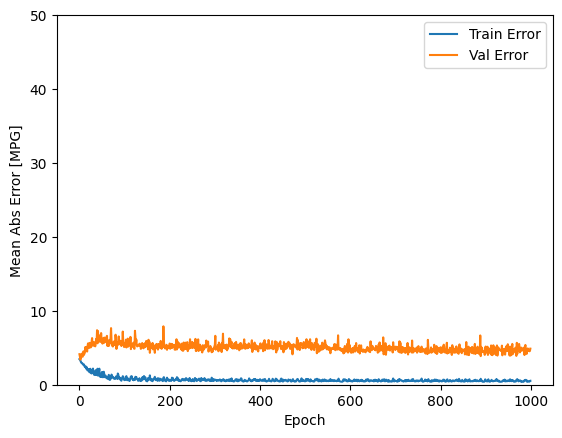

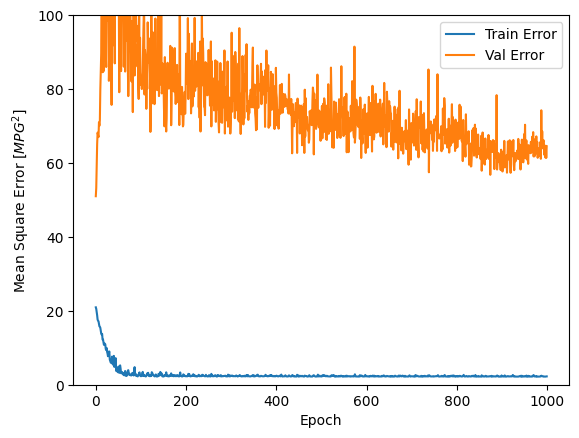


...........

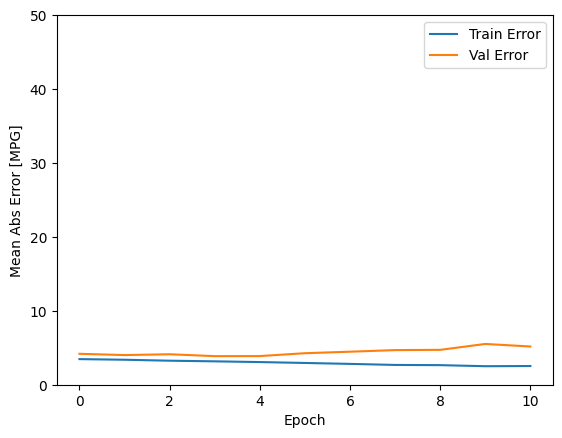

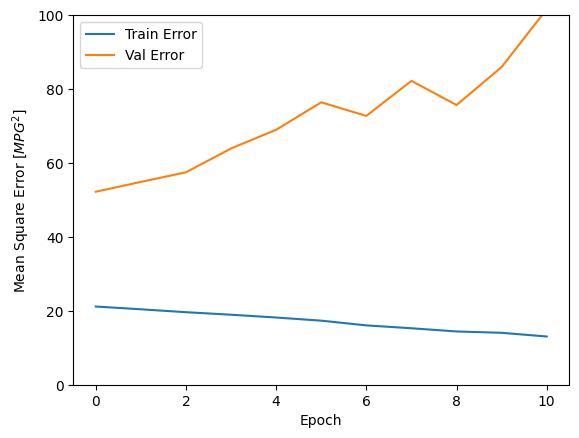

1/1 [==============================] - 0s 57ms/step
21
     F1   F2   F3   F4      F5   F6    F7      F8    F9  F10  ...  F57  F58  \
21  0.0  0.0  0.0  0.0  0.5394  0.0  0.29  0.3074  0.29  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
21    0    0    0    0    0    1    0     1.480376  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

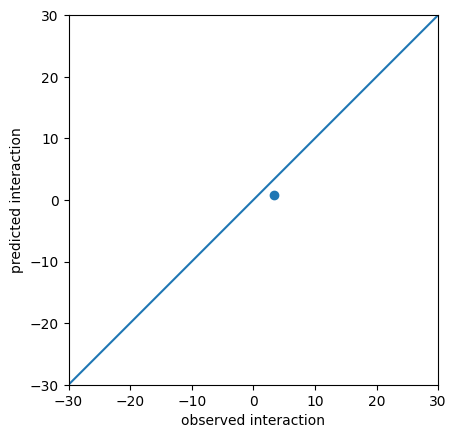

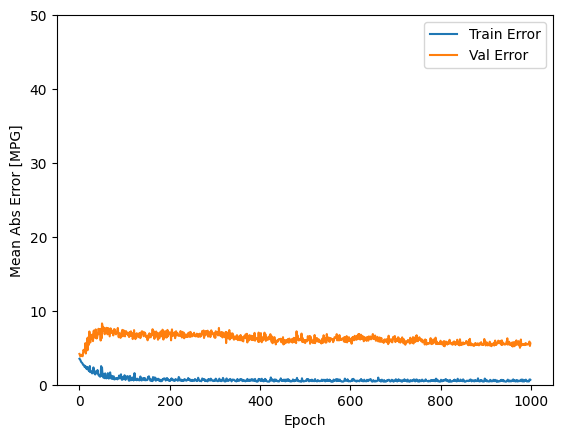

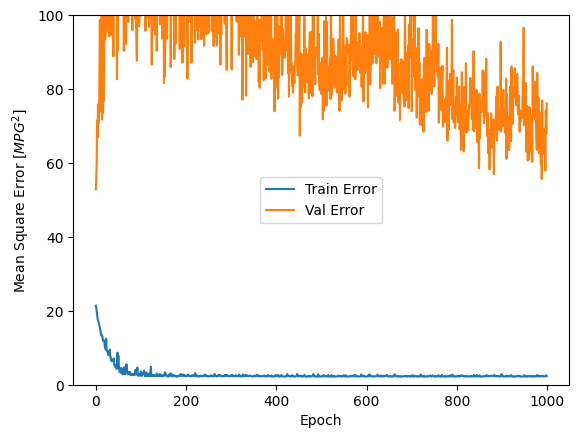


...........

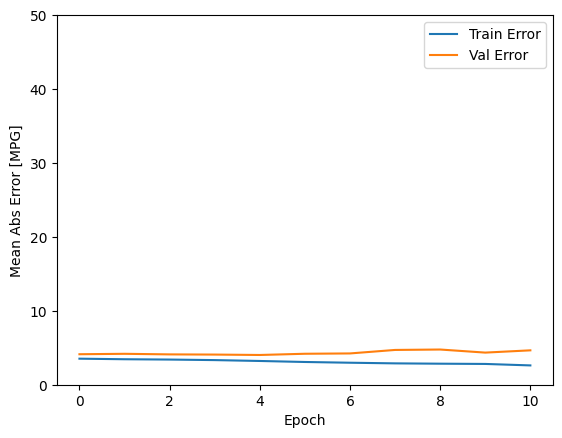

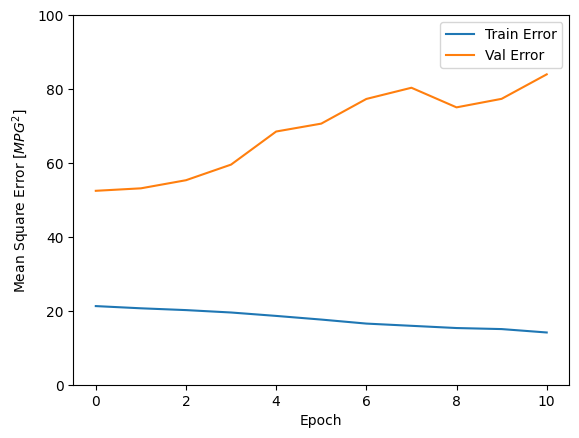

1/1 [==============================] - 0s 59ms/step
22
     F1   F2   F3   F4    F5   F6        F7        F8    F9  F10  ...  F57  \
22  0.0  0.0  0.0  0.0 -0.13  0.0 -0.508596 -0.155088 -0.13  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
22    0    0    0    0    0    0    0    0     2.740656  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

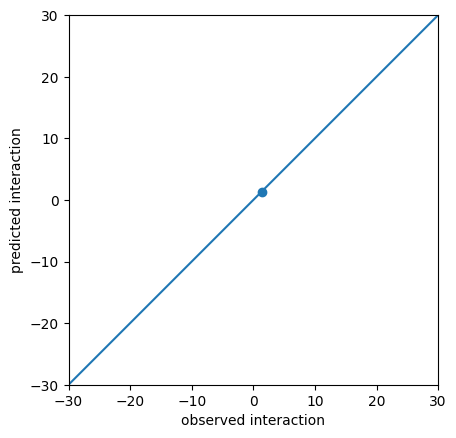

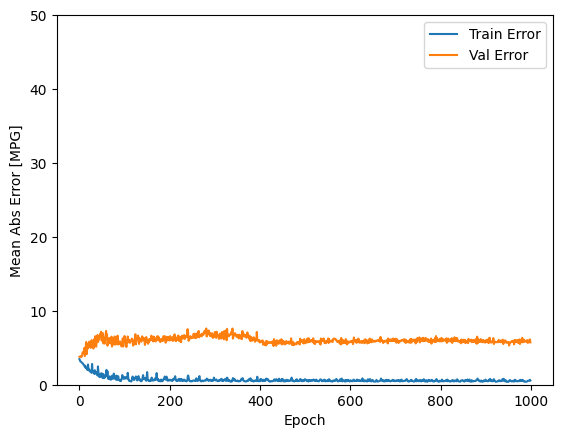

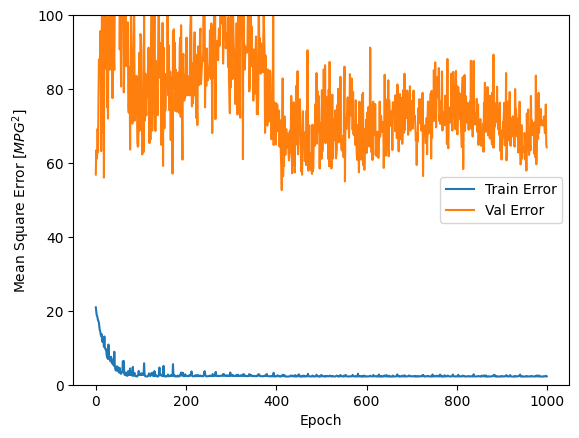


...........

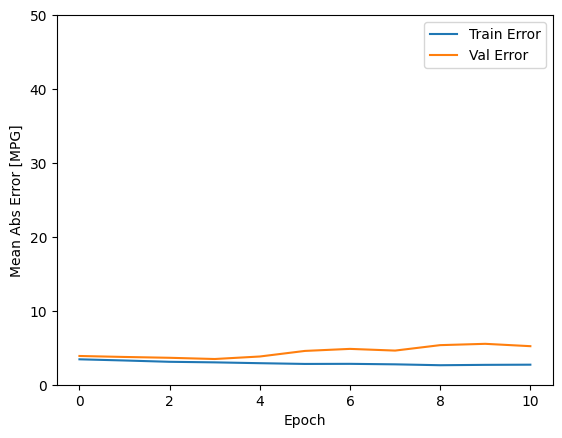

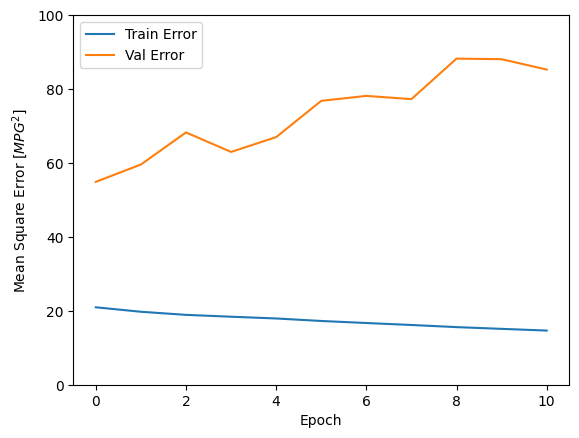

1/1 [==============================] - 0s 58ms/step
23
     F1   F2   F3   F4      F5   F6    F7      F8    F9  F10  ...  F57  F58  \
23  0.0  0.0  0.0  0.0 -0.5394  0.0 -0.29 -0.3074 -0.29  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
23    0    0    0    0    0   -1    0     4.276388  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

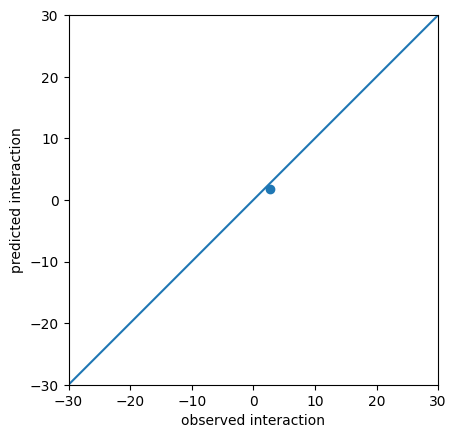

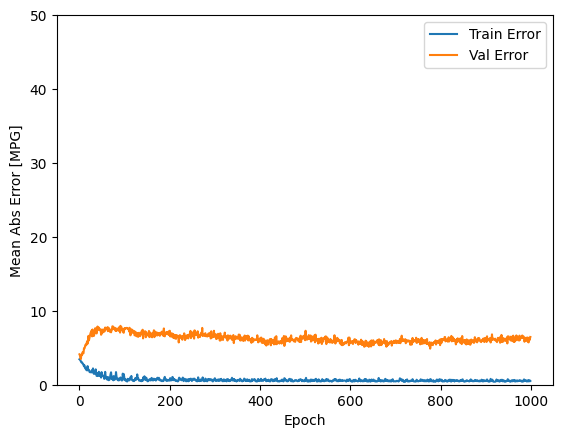

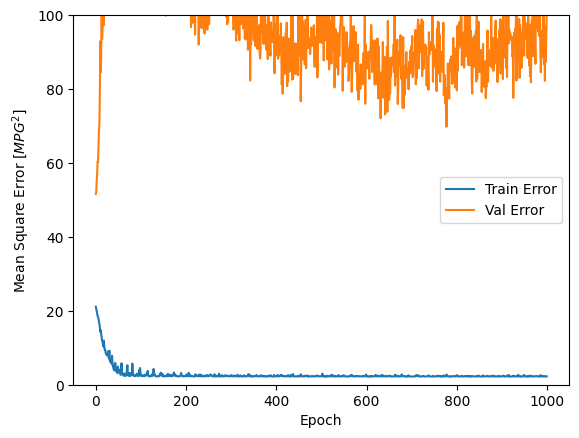


...........

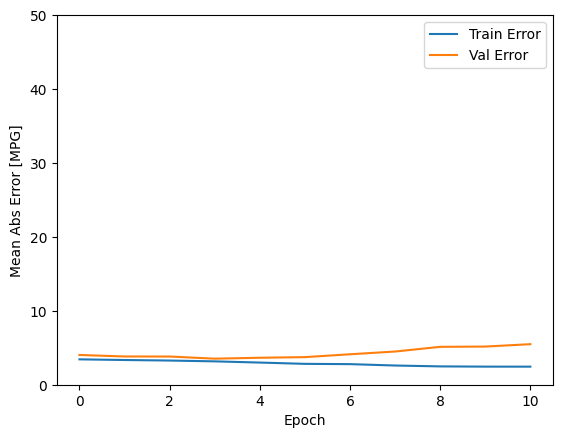

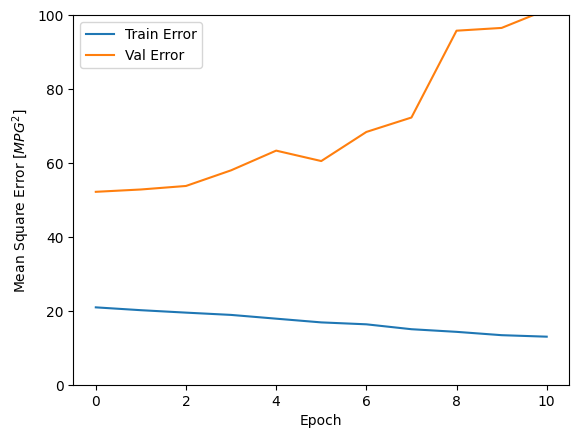

1/1 [==============================] - 0s 60ms/step
24
     F1    F2   F3   F4    F5   F6        F7        F8    F9   F10  ...  F57  \
24  0.0 -0.15  0.0  0.0 -0.15  0.0 -0.549324 -0.222973 -0.15 -0.15  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
24    0    0    0    0    0    0    0    0      0.82194  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

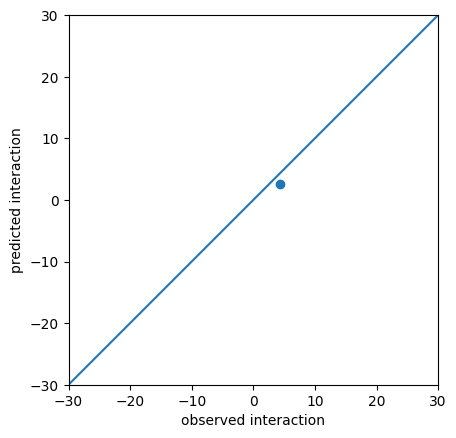

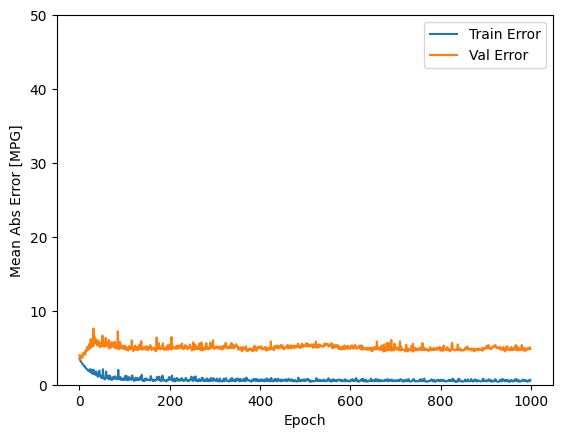

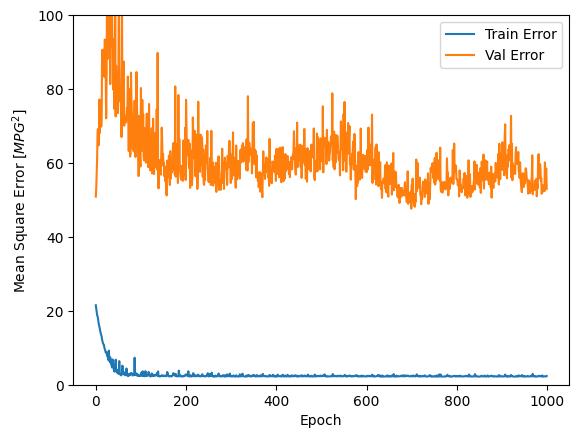


...........

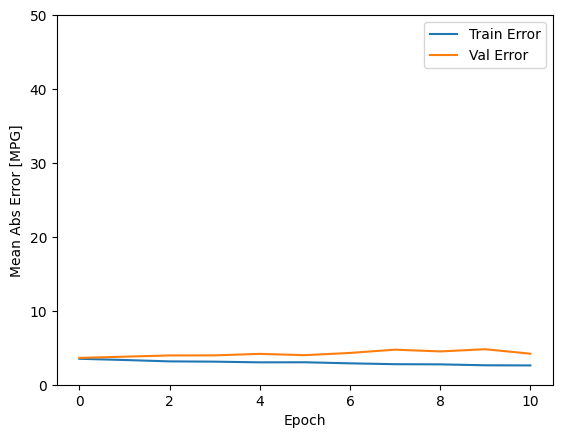

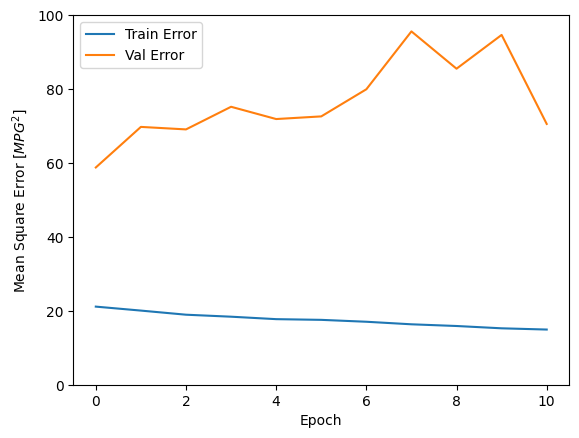

1/1 [==============================] - 0s 58ms/step
25
     F1   F2   F3   F4   F5   F6    F7    F8   F9  F10  ...  F57  F58  F59  \
25  0.0  0.0  0.0  0.0  0.0  0.0 -0.63 -0.45  0.0  0.0  ...    0    0    0   

    F60  F61  F62  F63  F64  F65  interaction  
25    0    0    0    0    0    0    -5.217945  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..............................................................

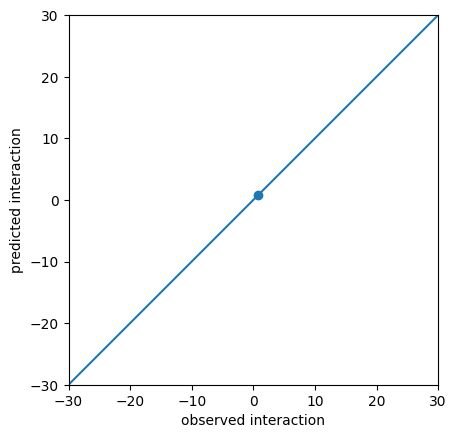

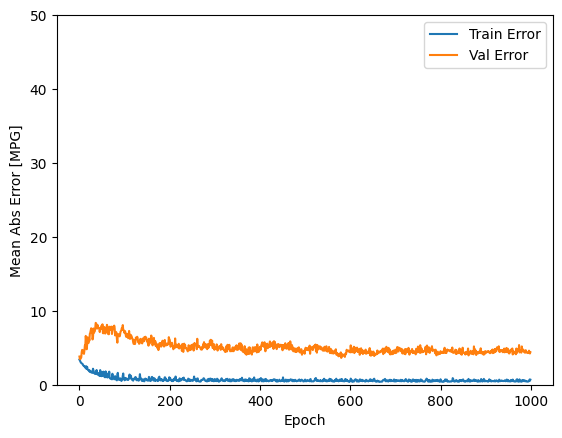

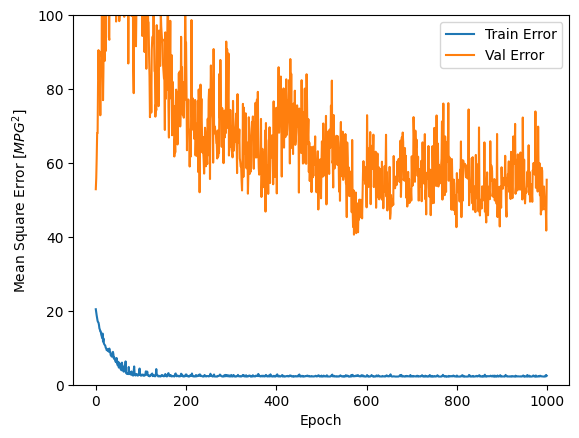


...........

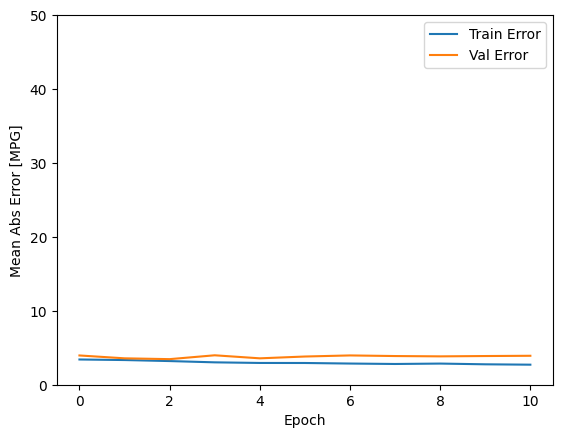

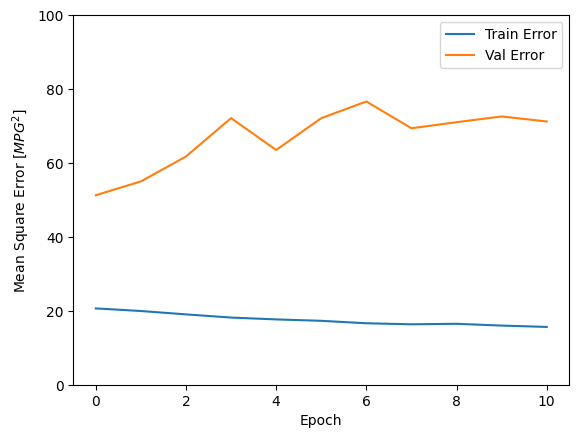

1/1 [==============================] - 0s 58ms/step
26
     F1    F2   F3   F4    F5   F6        F7        F8    F9   F10  ...  F57  \
26  0.0  0.15  0.0  0.0  0.15  0.0  0.549324  0.222973  0.15  0.15  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
26    0    0    0    0    0    0    0    0     2.981602  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

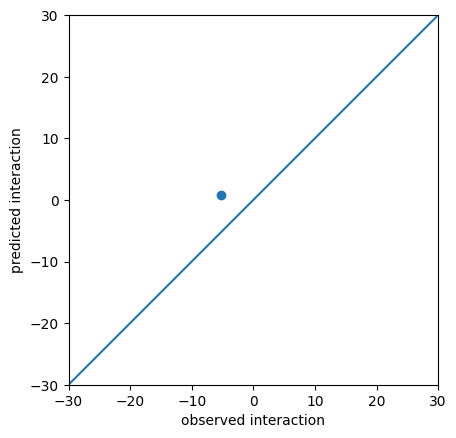

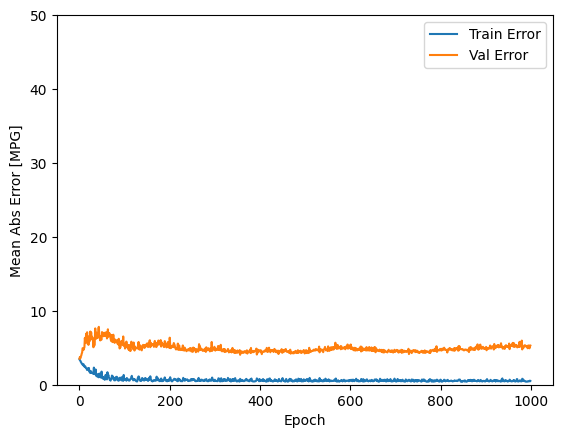

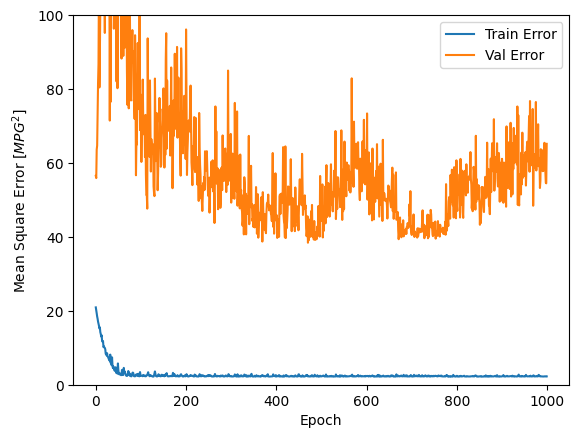


...........

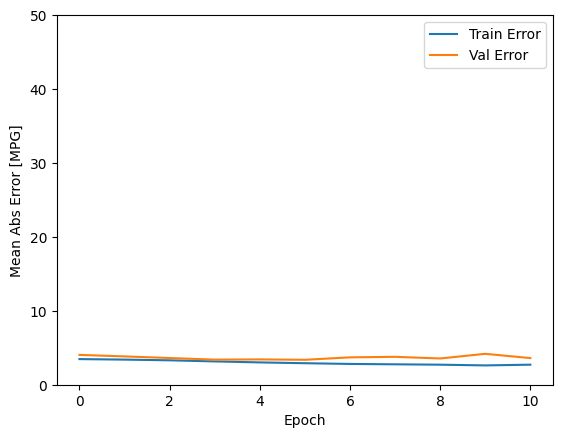

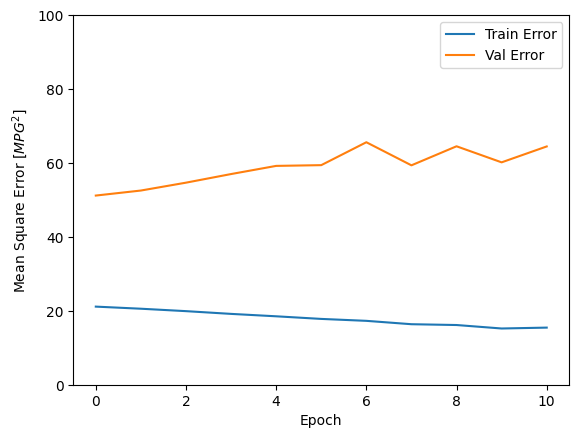

1/1 [==============================] - 0s 57ms/step
27
     F1    F2   F3   F4    F5   F6        F7        F8    F9   F10  ...  F57  \
27  0.0  0.15  0.0  0.0  0.15  0.0 -0.080676 -0.227027  0.15  0.15  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
27    0    0    0    0    0    0    0    0     2.176199  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

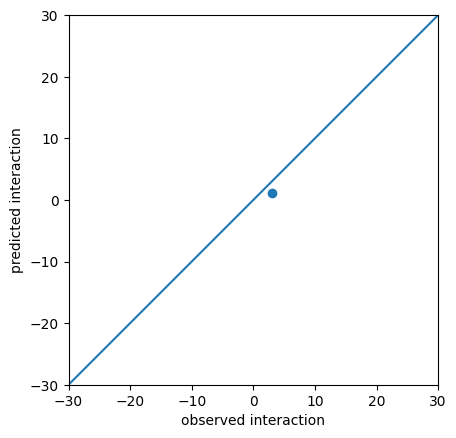

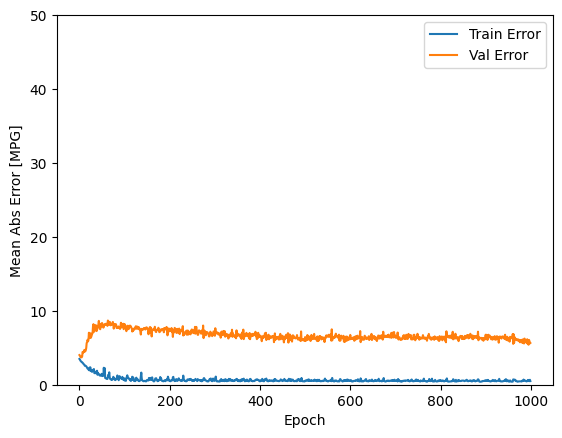

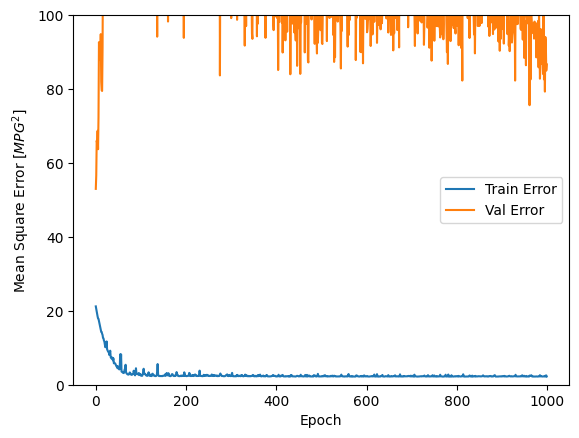


...........

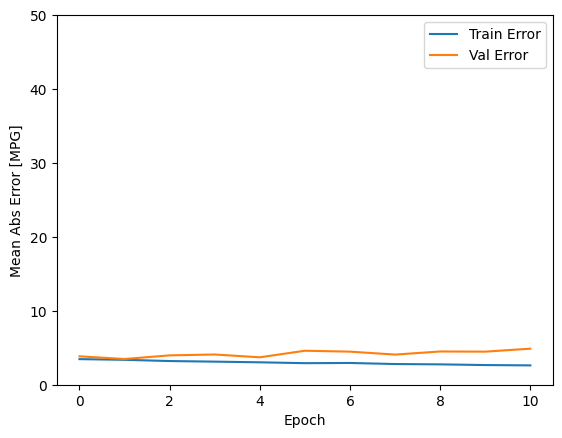

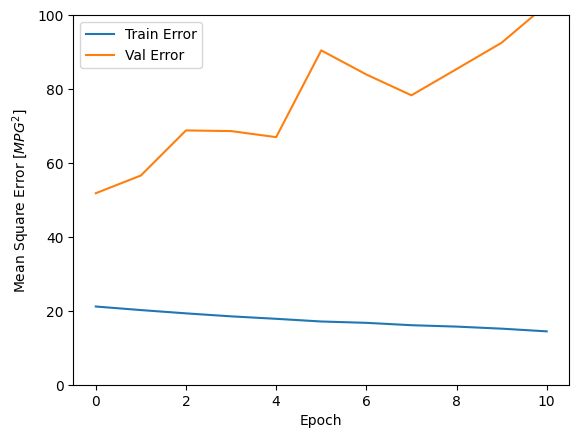

1/1 [==============================] - 0s 58ms/step
28
     F1   F2   F3   F4   F5   F6    F7    F8   F9  F10  ...  F57  F58  F59  \
28  0.0  0.0  0.0  0.0  0.0  0.0  0.63  0.45  0.0  0.0  ...    0    0    0   

    F60  F61  F62  F63  F64  F65  interaction  
28    0    0    0    0    0    0     2.107996  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..............................................................

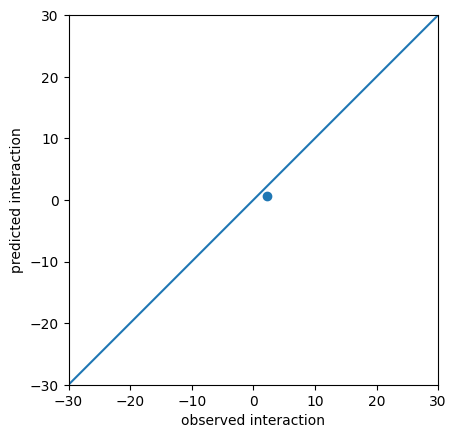

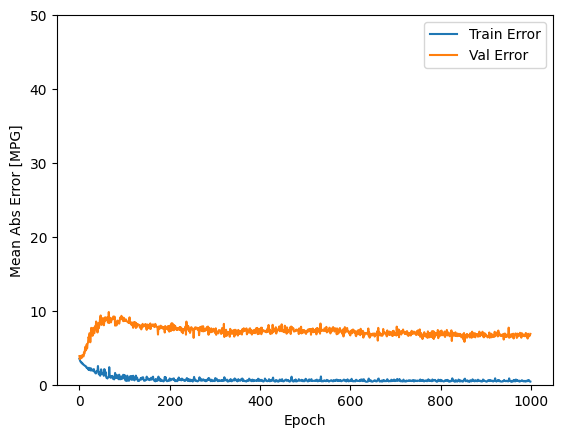

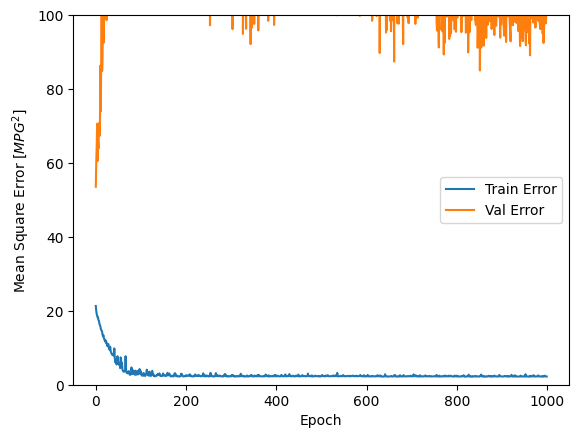


.............

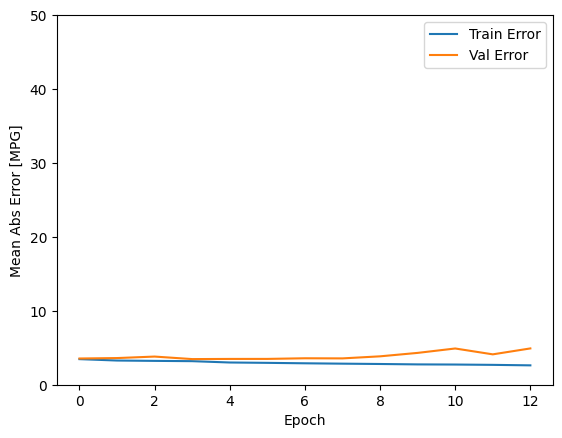

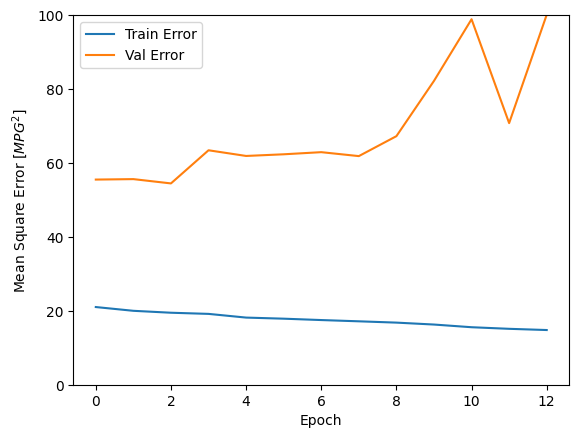

1/1 [==============================] - 0s 57ms/step
29
     F1    F2   F3   F4    F5   F6        F7        F8    F9   F10  ...  F57  \
29  0.0 -0.15  0.0  0.0 -0.15  0.0  0.080676  0.227027 -0.15 -0.15  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
29    0    0    0    0    0    0    0    0     6.355802  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

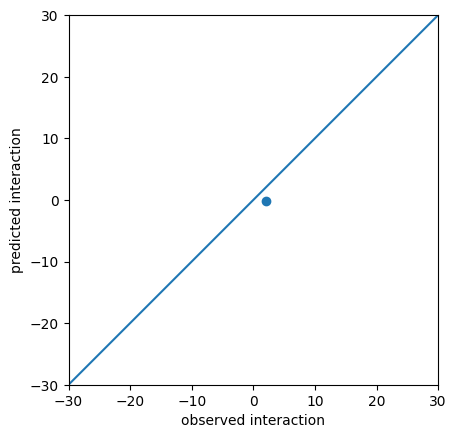

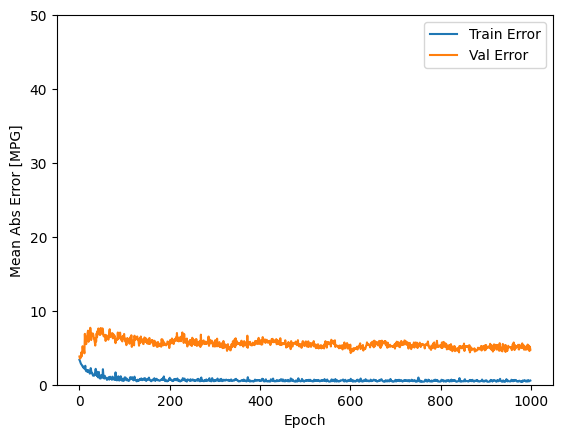

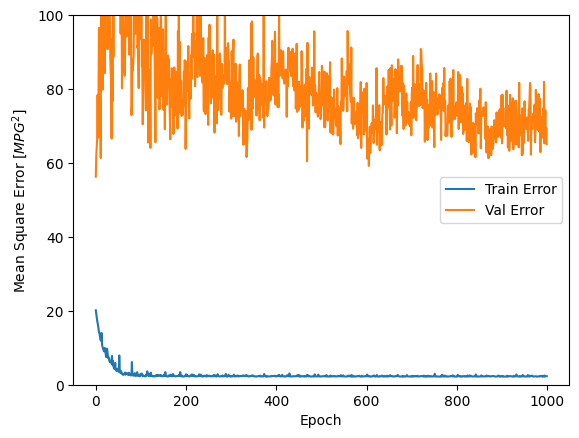


...........

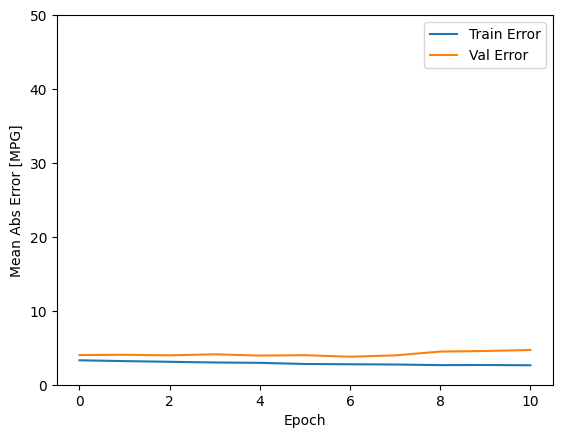

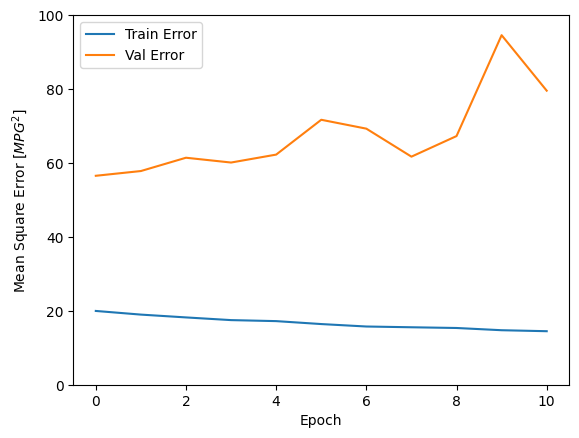

1/1 [==============================] - 0s 56ms/step
30
     F1   F2   F3   F4    F5   F6        F7    F8    F9  F10  ...  F57  F58  \
30  0.0  0.0  0.0  0.0  0.15  0.0  0.545641  0.15 -0.02  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
30    0    0    1    0    0    0    0    -0.578053  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

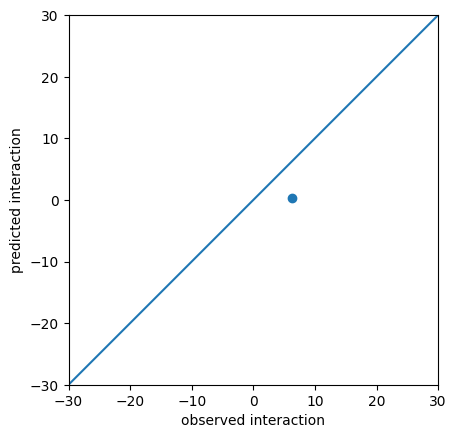

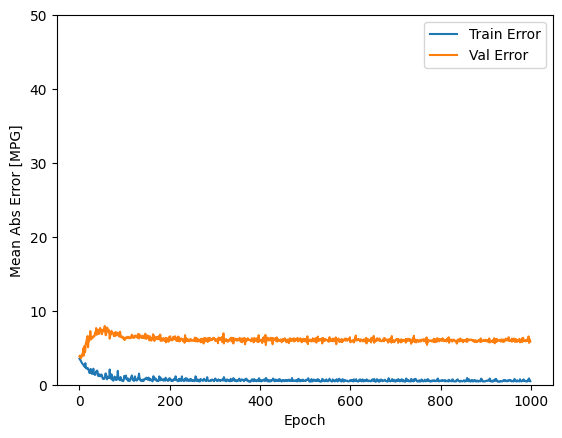

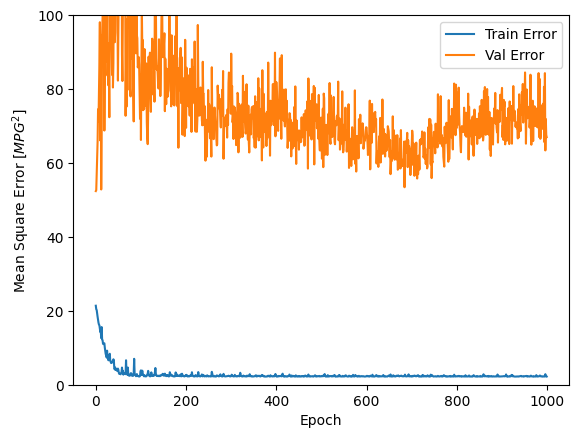


...........

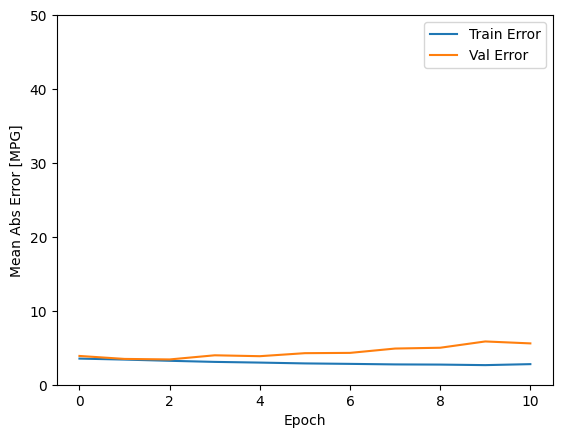

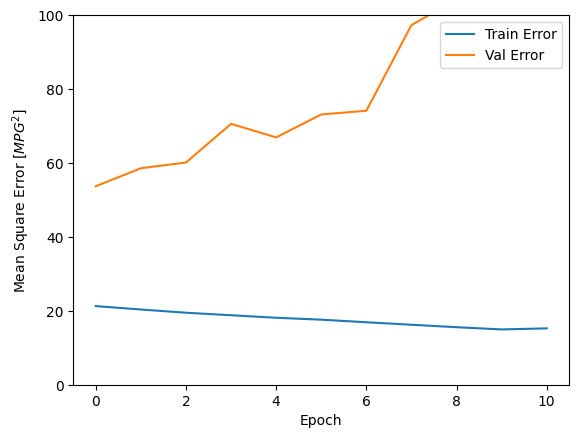

1/1 [==============================] - 0s 58ms/step
31
     F1   F2   F3   F4    F5   F6        F7    F8    F9  F10  ...  F57  F58  \
31  0.0  0.0  0.0  0.0  0.15  0.0  0.545641  0.15 -0.02  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
31    0    0    1    0    0    0    0    -0.361771  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

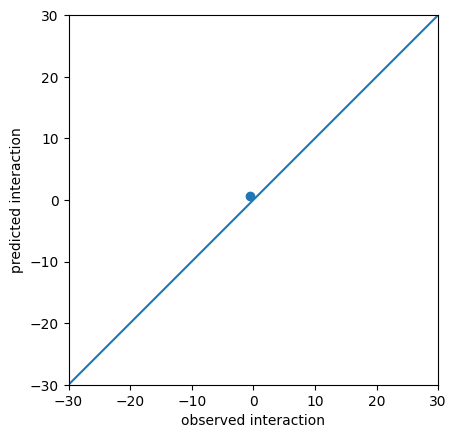

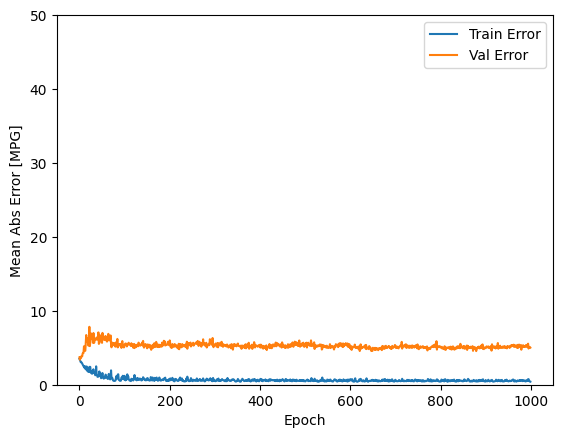

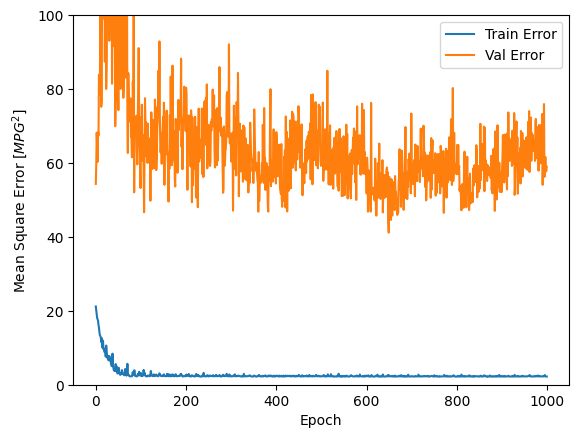


...........

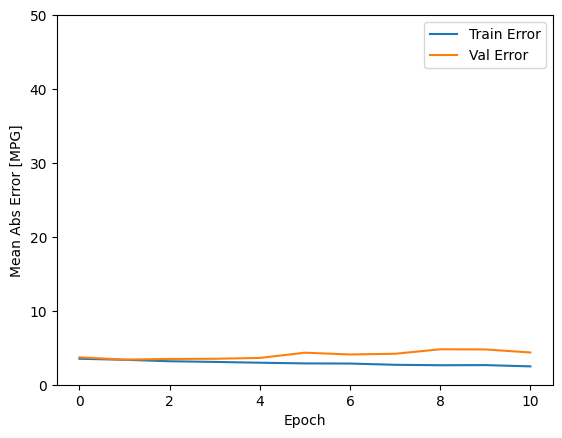

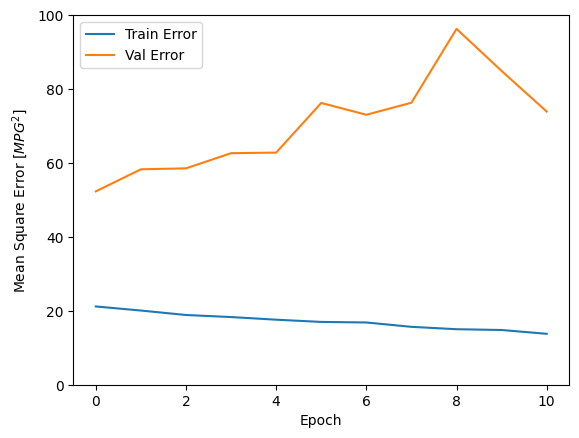

1/1 [==============================] - 0s 57ms/step
32
     F1   F2   F3   F4    F5   F6        F7    F8    F9  F10  ...  F57  F58  \
32  0.0  0.0  0.0  0.0 -0.15  0.0 -0.545641 -0.15  0.02  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
32    0    0   -1    0    0    0    0     2.678787  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

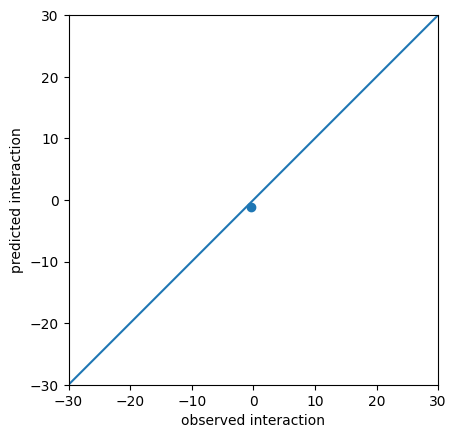

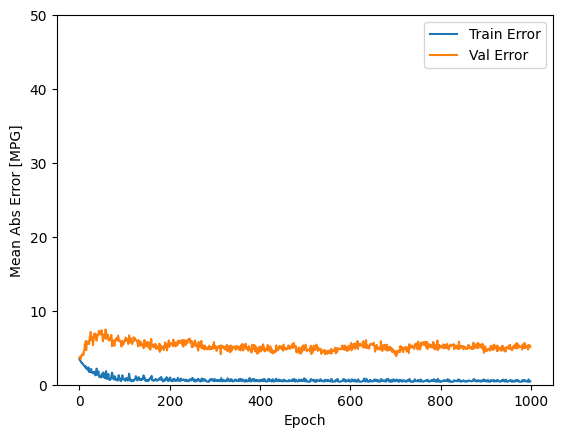

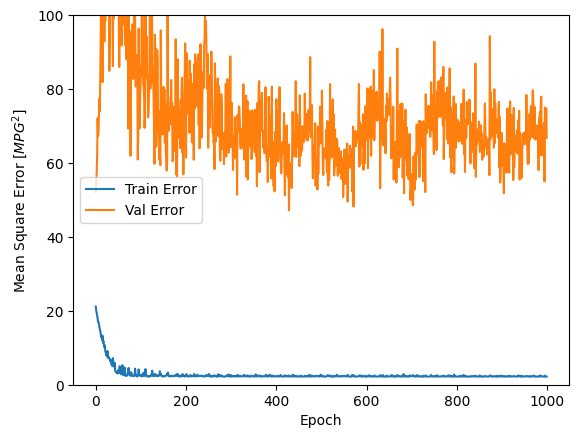


...........

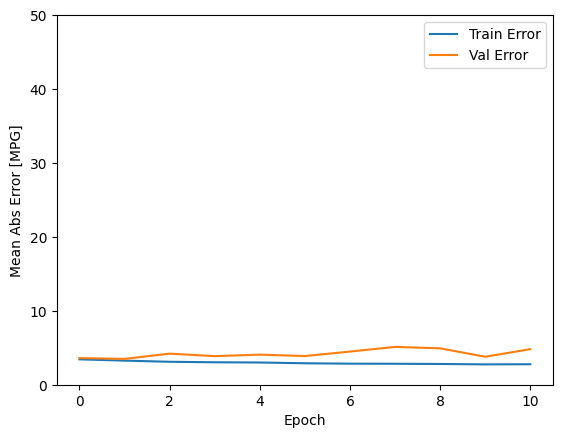

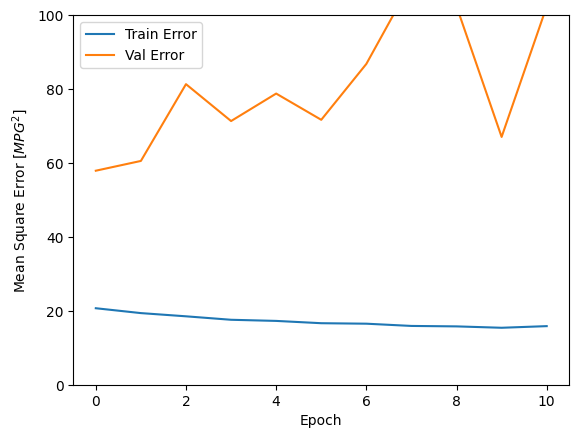

1/1 [==============================] - 0s 57ms/step
33
     F1   F2   F3   F4   F5   F6   F7   F8   F9  F10  ...  F57  F58  F59  F60  \
33  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0    0    0    0   

    F61  F62  F63  F64  F65  interaction  
33    0    0    0    0    0    -4.891075  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................................

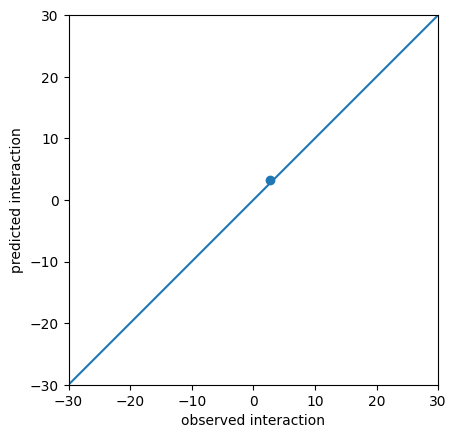

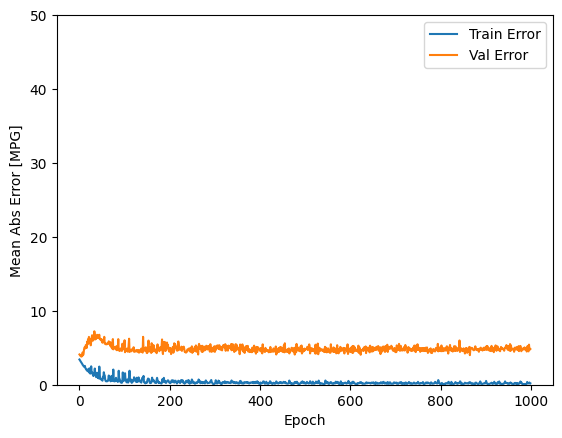

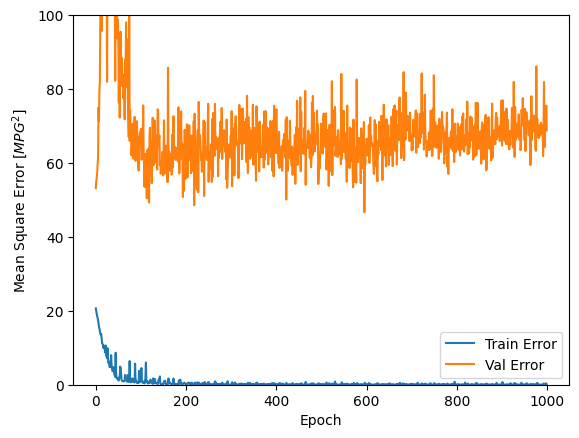


............

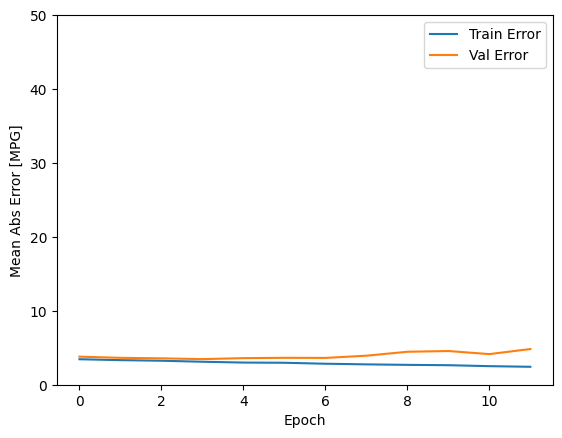

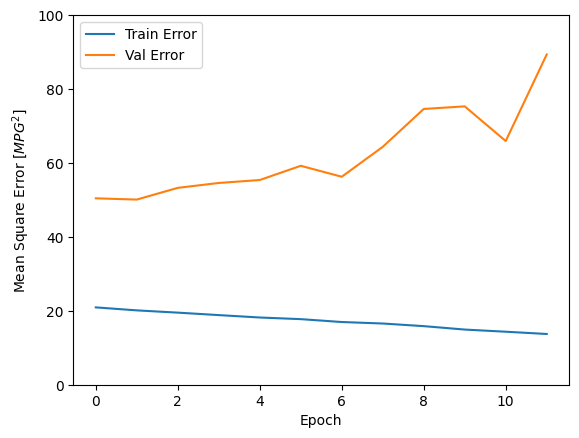

1/1 [==============================] - 0s 59ms/step
34
     F1   F2   F3   F4    F5   F6        F7    F8    F9  F10  ...  F57  F58  \
34  0.0  0.0  0.0  0.0 -0.15  0.0 -0.545641 -0.15  0.02  0.0  ...    0    0   

    F59  F60  F61  F62  F63  F64  F65  interaction  
34    0    0   -1    0    0    0    0     2.039893  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................

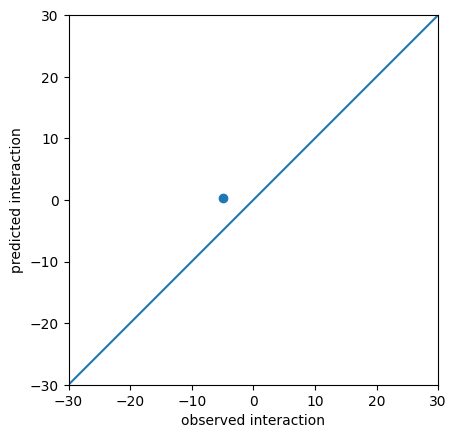

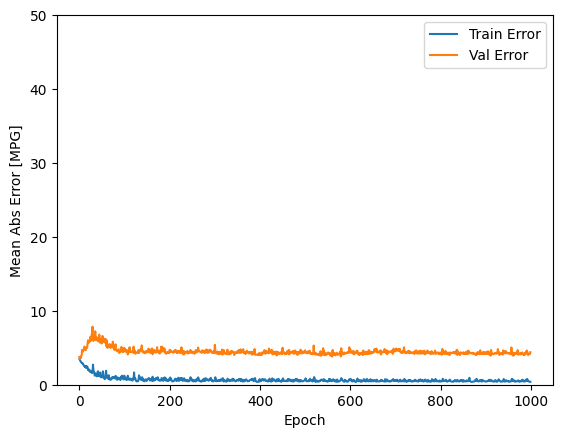

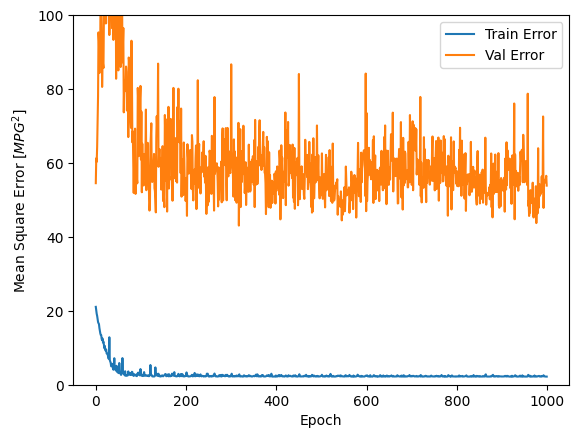


...........

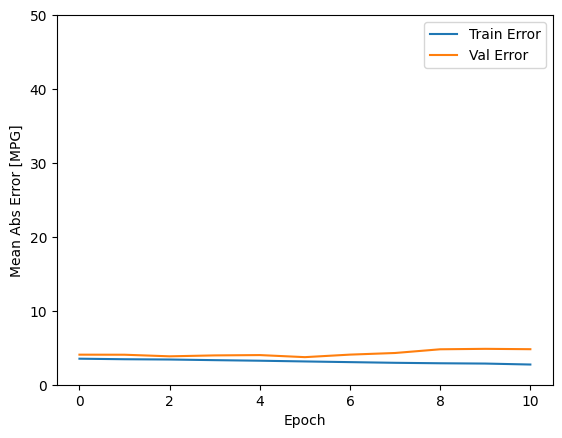

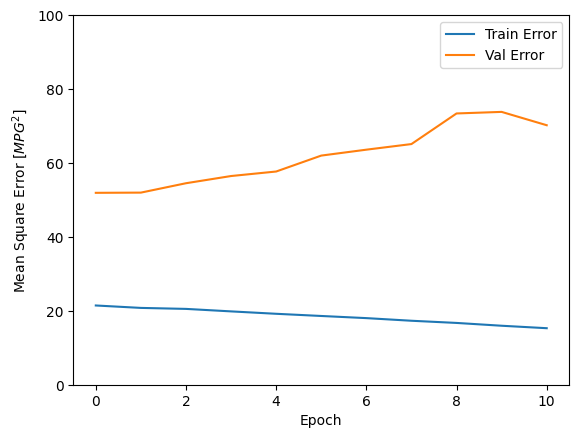

1/1 [==============================] - 0s 58ms/step
35
     F1   F2   F3   F4   F5   F6   F7   F8   F9  F10  ...  F57  F58  F59  F60  \
35  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0    0    0    0   

    F61  F62  F63  F64  F65  interaction  
35    0    0    0    0    0     7.830699  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................................................

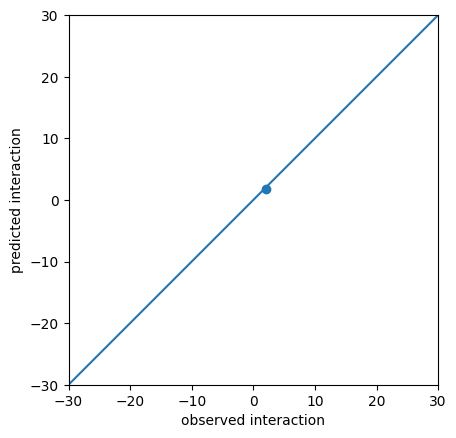

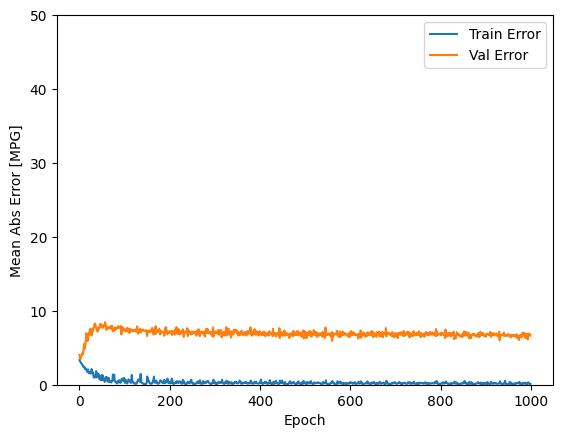

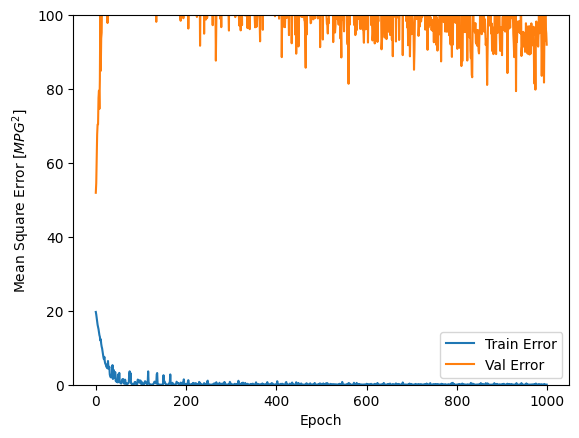


...........

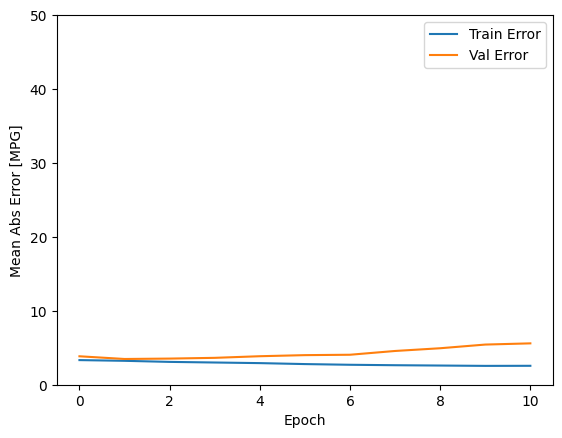

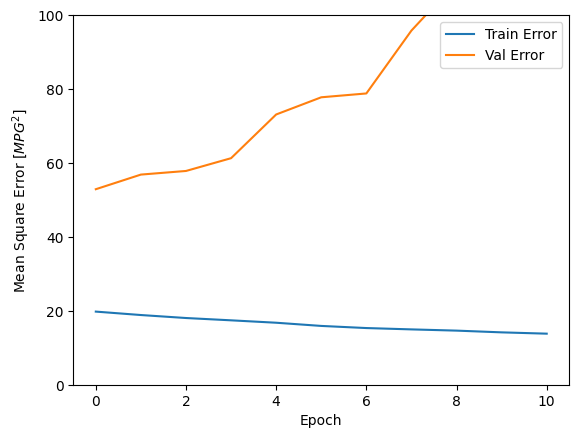

1/1 [==============================] - 0s 57ms/step
36
      F1    F2    F3   F4   F5   F6        F7        F8    F9  F10  ...  F57  \
36 -0.23  0.09  0.09  0.0  0.0  0.0 -0.404706 -0.305882 -0.23  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
36    0    0    0    0    0    0    0    0     1.503372  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

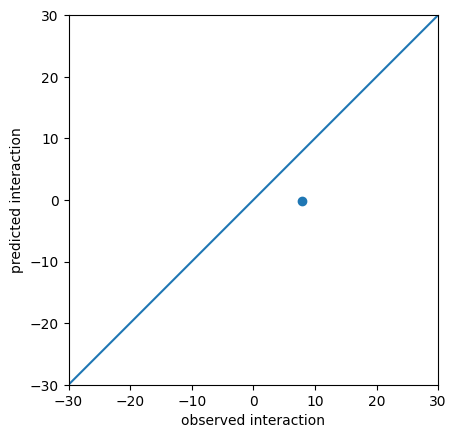

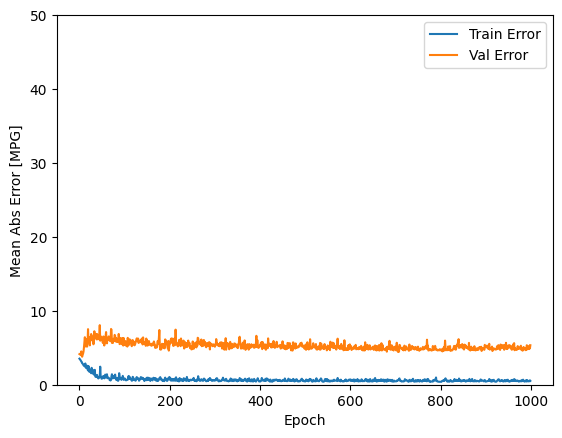

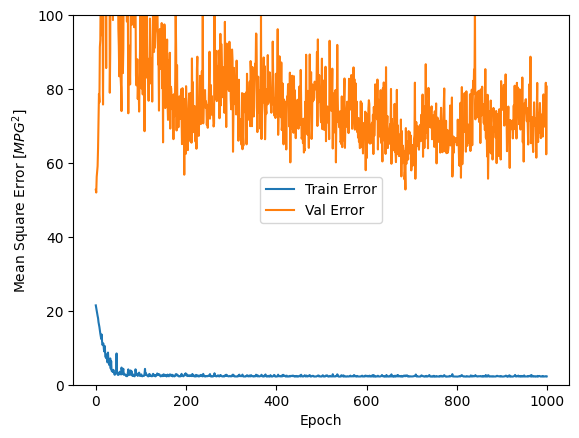


...........

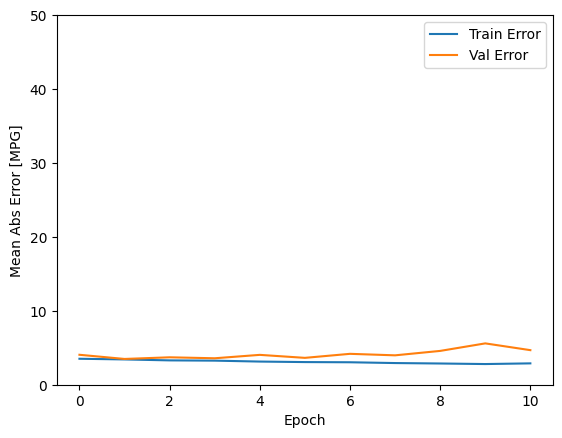

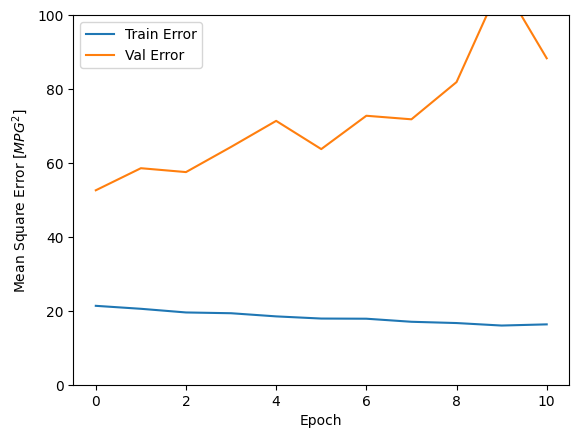

1/1 [==============================] - 0s 56ms/step
37
     F1    F2    F3   F4   F5   F6    F7   F8   F9  F10  ...  F57  F58  F59  \
37  0.0  0.09  0.09  0.0  0.0  0.0  0.15  0.1  0.0  0.0  ...    0    0    0   

    F60  F61  F62  F63  F64  F65  interaction  
37    0    0    0    0    0    0    -5.237525  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
............................................................

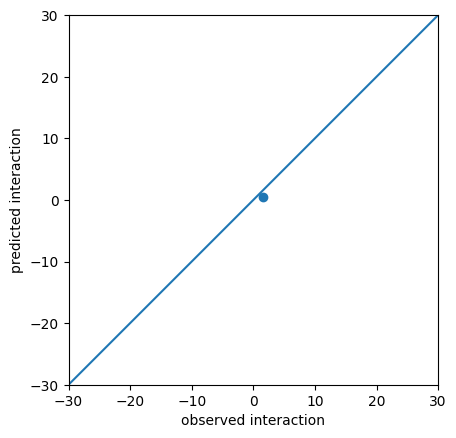

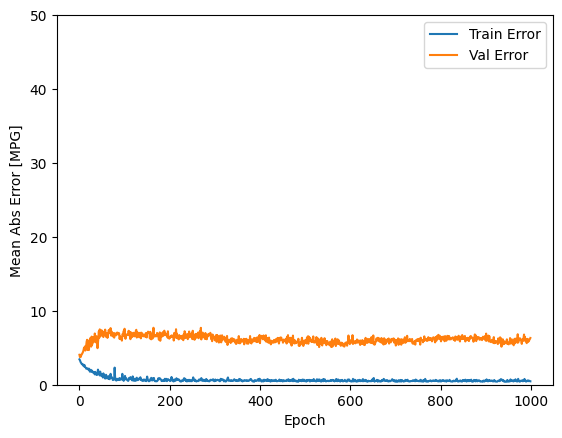

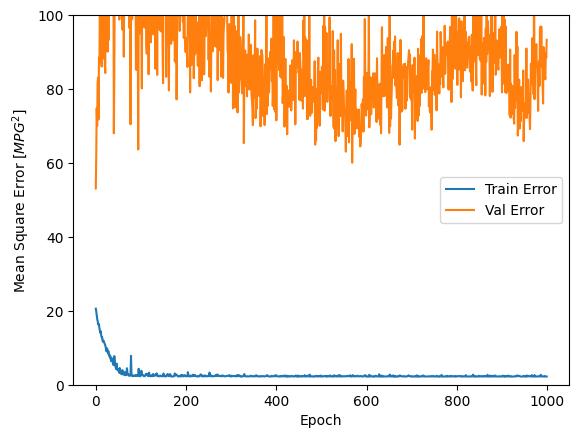


...........

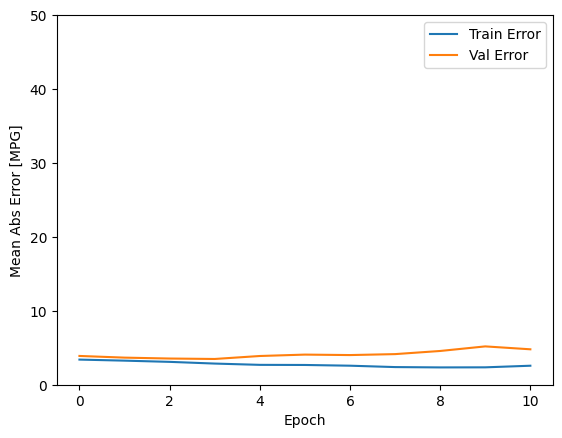

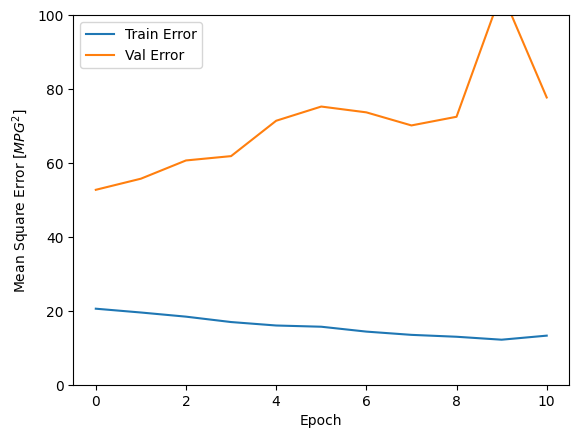

1/1 [==============================] - 0s 59ms/step
38
      F1    F2    F3   F4   F5   F6        F7        F8    F9  F10  ...  F57  \
38  0.23 -0.09 -0.09  0.0  0.0  0.0  0.404706  0.305882  0.23  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
38    0    0    0    0    0    0    0    0     0.502239  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
......................................

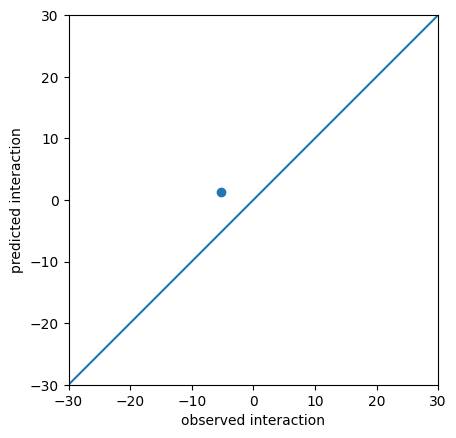

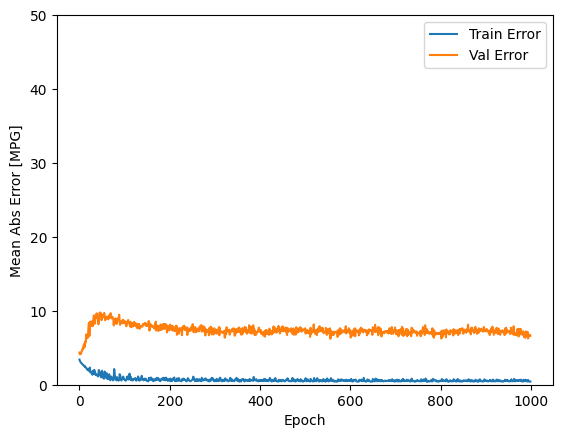

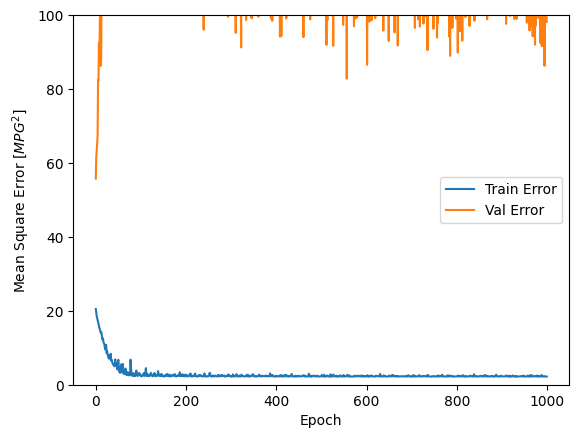


...........

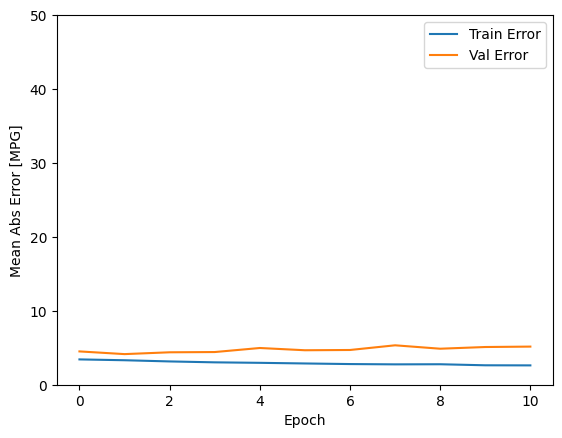

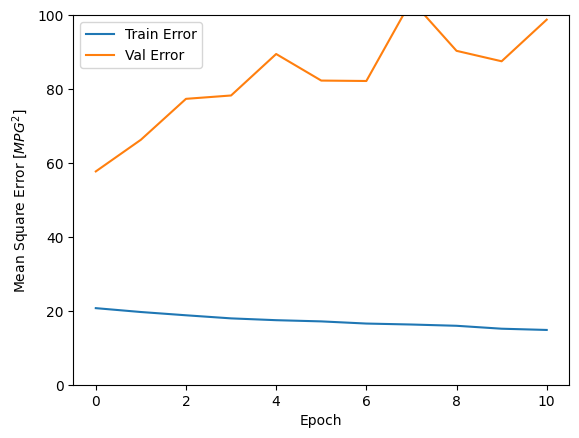

1/1 [==============================] - 0s 68ms/step
39
      F1   F2   F3   F4   F5   F6        F7        F8    F9  F10  ...  F57  \
39  0.23  0.0  0.0  0.0  0.0  0.0  0.554706  0.405882  0.23  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
39    0    0    0    0    0    0    0    0     2.459868  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

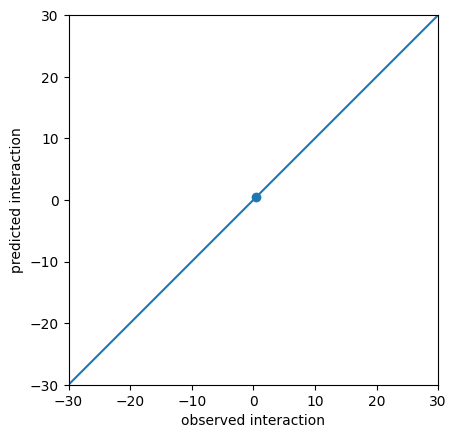

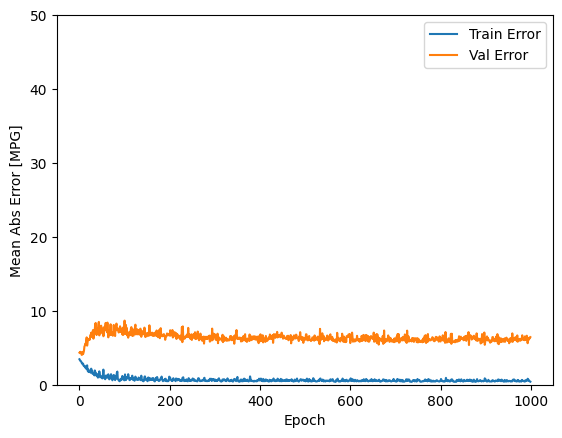

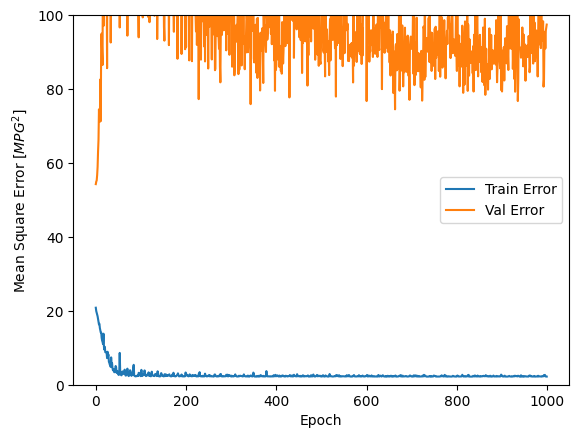


...........

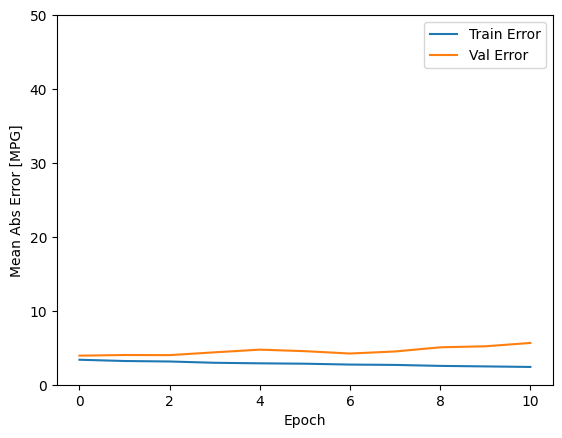

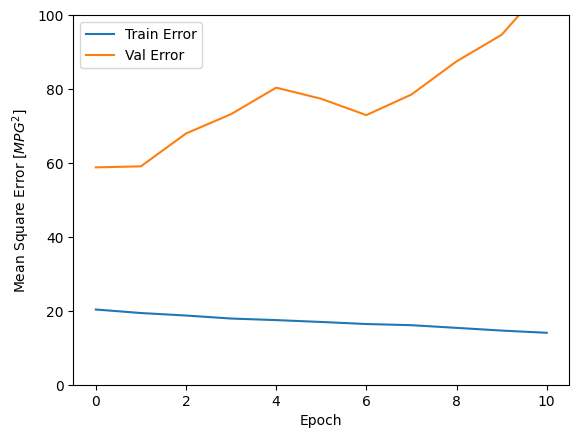

1/1 [==============================] - 0s 57ms/step
40
     F1    F2    F3   F4   F5   F6    F7   F8   F9  F10  ...  F57  F58  F59  \
40  0.0 -0.09 -0.09  0.0  0.0  0.0 -0.15 -0.1  0.0  0.0  ...    0    0    0   

    F60  F61  F62  F63  F64  F65  interaction  
40    0    0    0    0    0    0     1.482819  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
............................................................

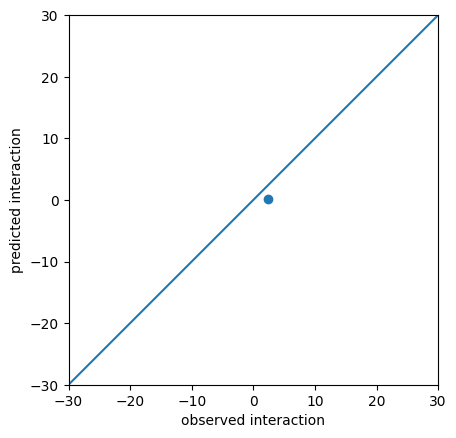

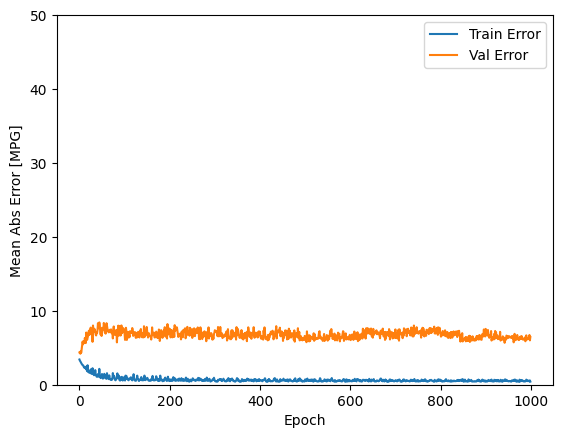

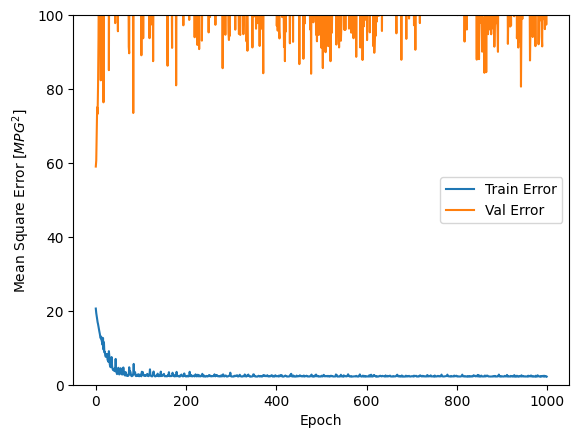


...........

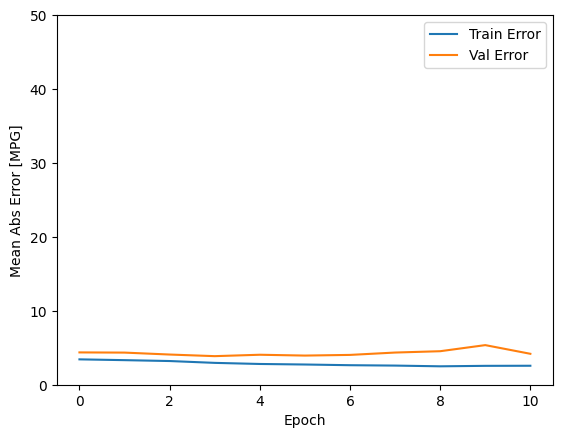

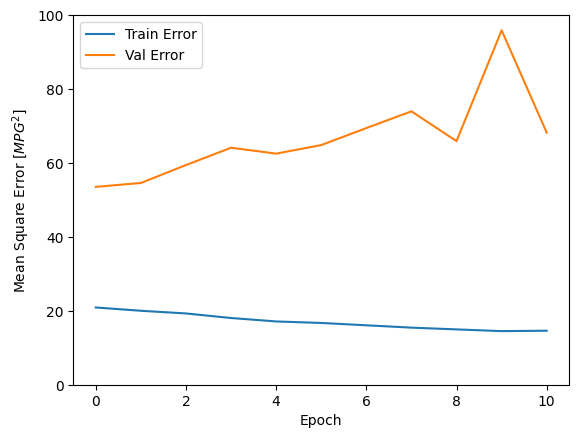

1/1 [==============================] - 0s 57ms/step
41
      F1   F2   F3   F4   F5   F6        F7        F8    F9  F10  ...  F57  \
41 -0.23  0.0  0.0  0.0  0.0  0.0 -0.554706 -0.405882 -0.23  0.0  ...    0   

    F58  F59  F60  F61  F62  F63  F64  F65  interaction  
41    0    0    0    0    0    0    0    0     6.199154  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

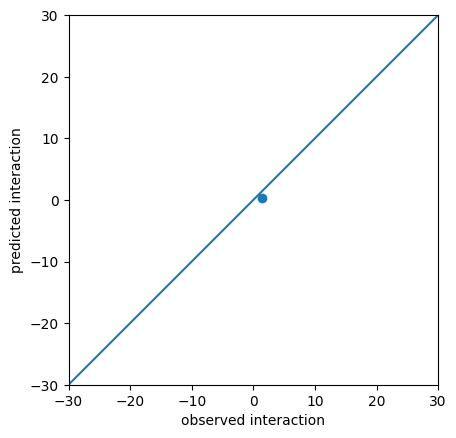

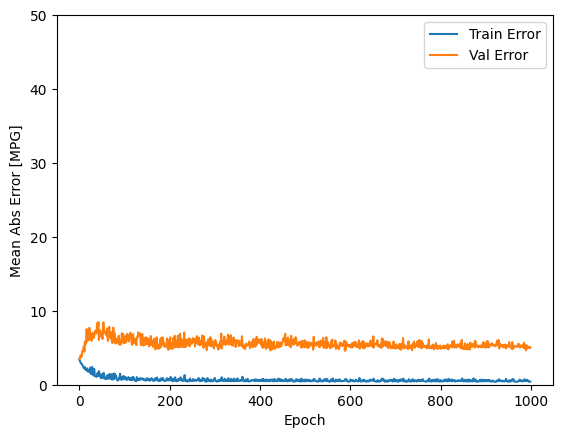

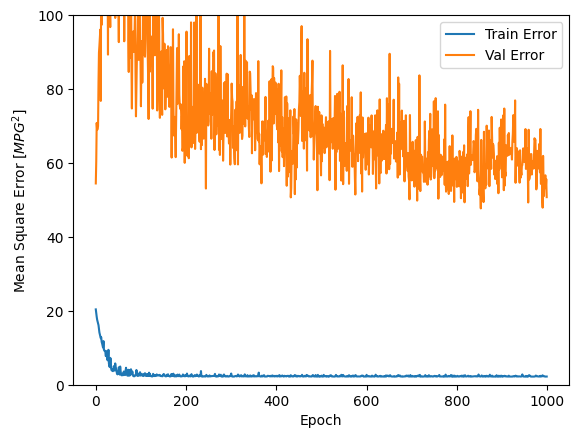


...........

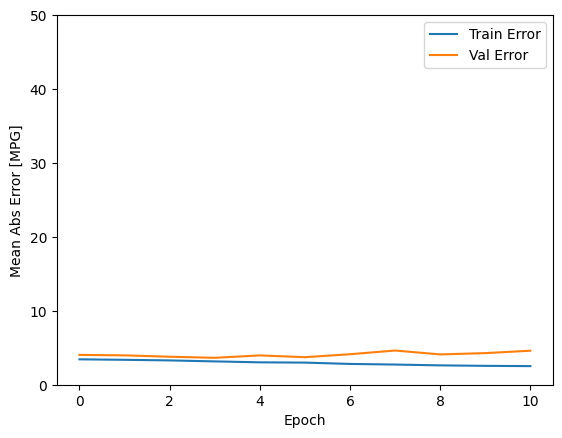

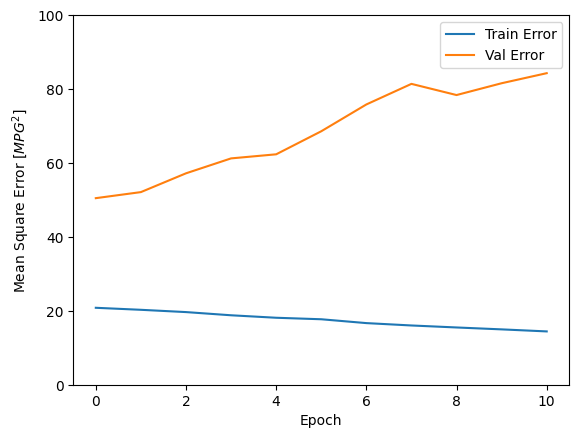

1/1 [==============================] - 0s 60ms/step
42
     F1   F2   F3   F4        F5   F6        F7        F8    F9  F10  ...  \
42  0.0  0.0  0.0  0.0 -0.342857  0.0 -0.310714  0.189286  0.15  0.0  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
42    0    0    0    0    0    0    0    0    0     1.390737  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................

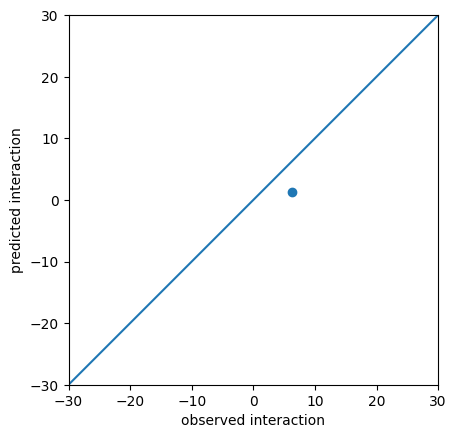

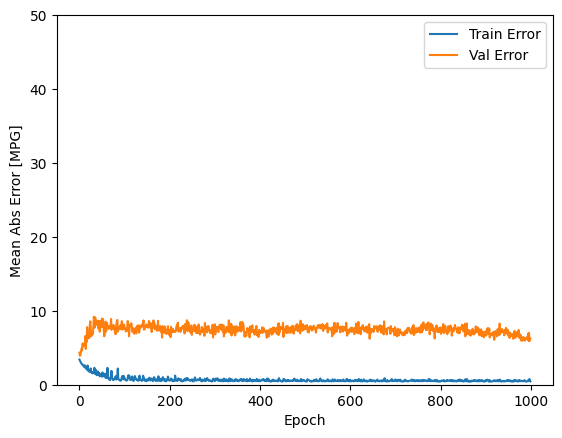

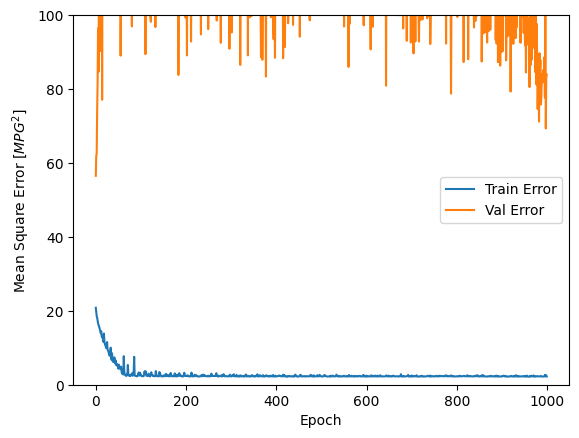


...........

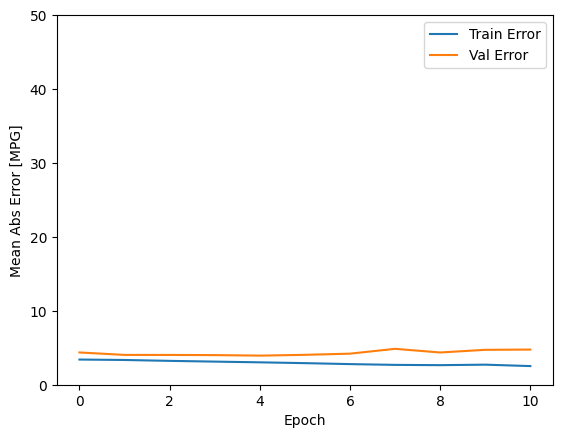

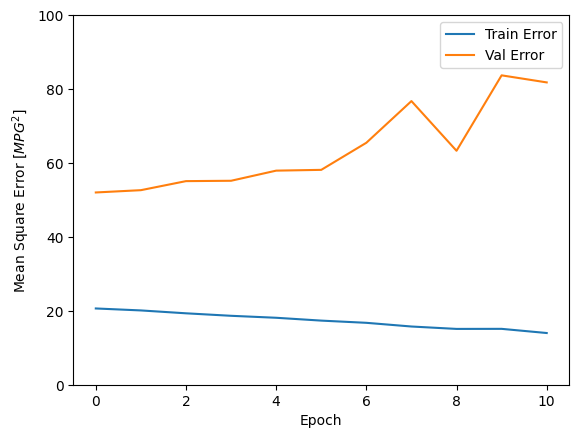

1/1 [==============================] - 0s 67ms/step
43
     F1   F2   F3   F4        F5   F6        F7        F8    F9  F10  ...  \
43  0.0  0.0  0.0  0.0 -0.042857  0.0  0.311508 -0.010714  0.15  0.0  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
43   -1    0   -1    0    0    0    0    0    0     3.091857  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................

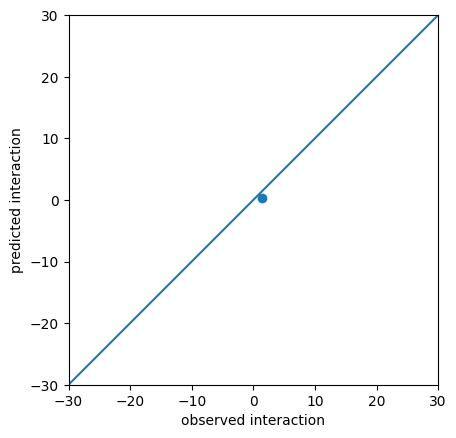

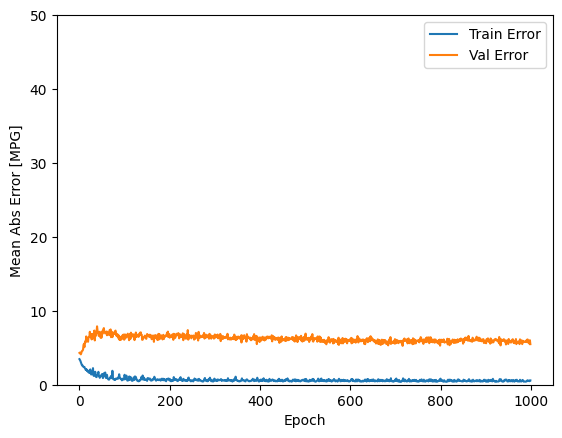

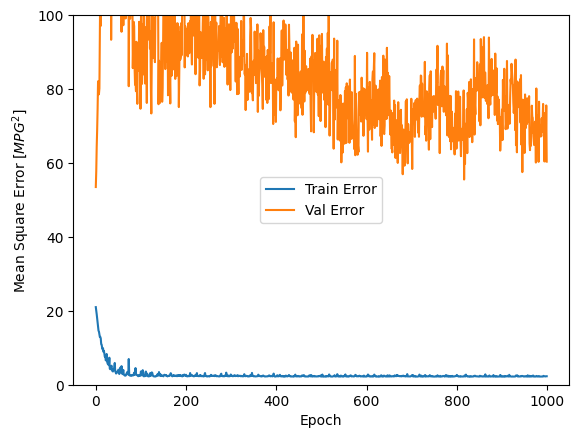


...........

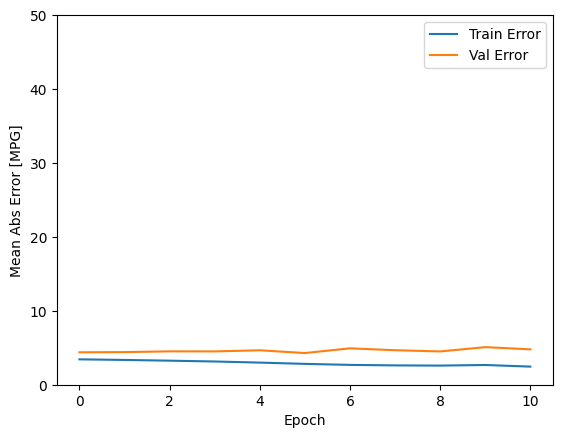

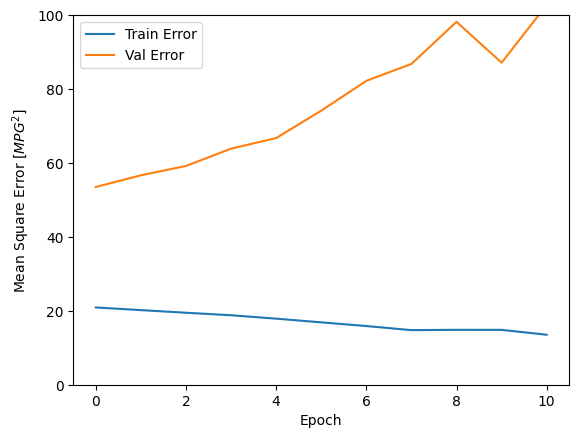

1/1 [==============================] - 0s 59ms/step
44
     F1   F2   F3   F4        F5   F6        F7        F8    F9  F10  ...  \
44  0.0  0.0  0.0  0.0  0.342857  0.0  0.310714 -0.189286 -0.15  0.0  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
44    0    0    0    0    0    0    0    0    0     0.656584  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................

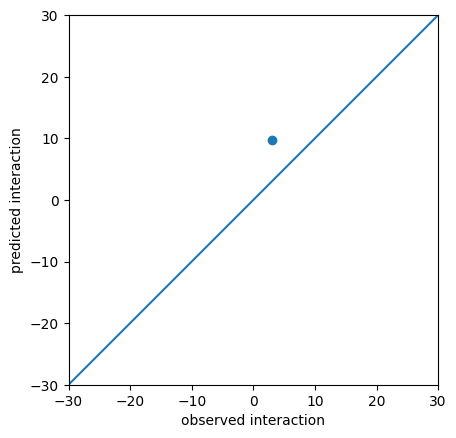

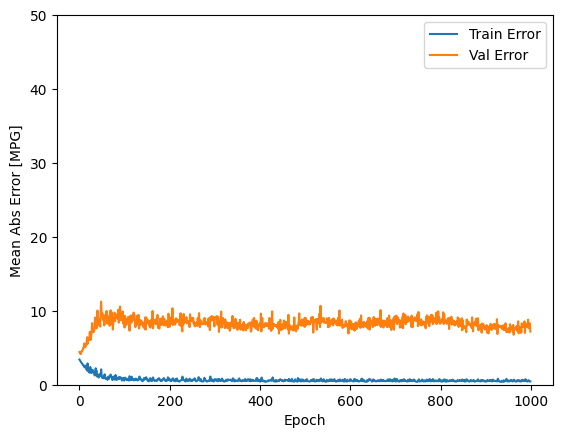

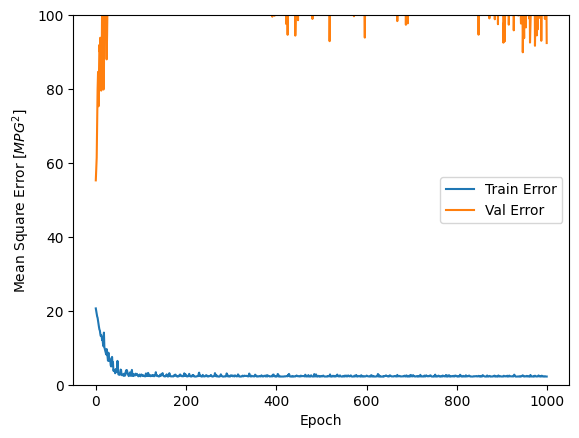


...........

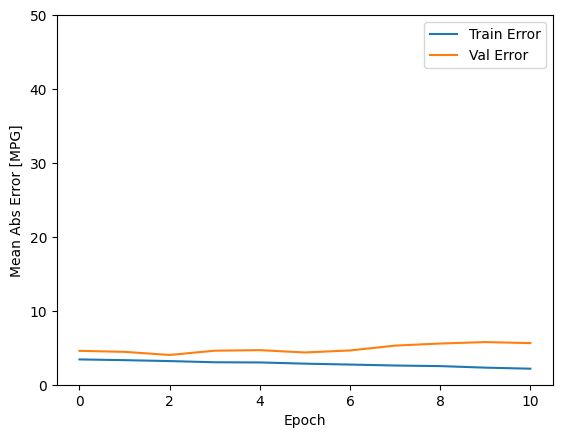

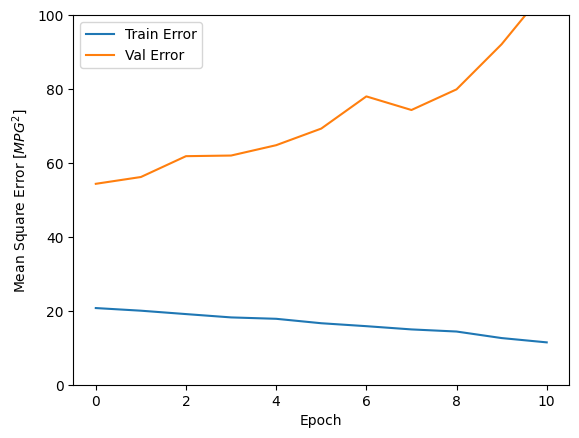

1/1 [==============================] - 0s 68ms/step
45
     F1   F2   F3   F4   F5   F6        F7   F8   F9  F10  ...  F57  F58  F59  \
45  0.0  0.0  0.0  0.0  0.3  0.0  0.622222 -0.2  0.0  0.0  ...   -1    0   -1   

    F60  F61  F62  F63  F64  F65  interaction  
45    0    0    0    0    0    0   -20.695588  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................

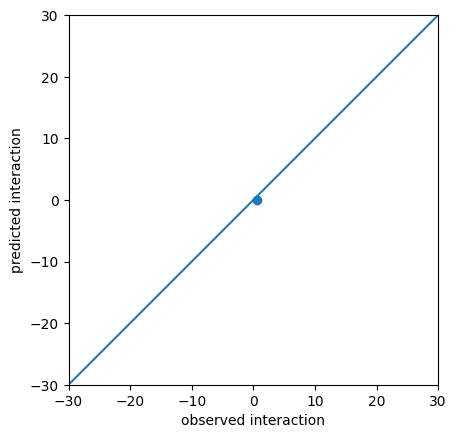

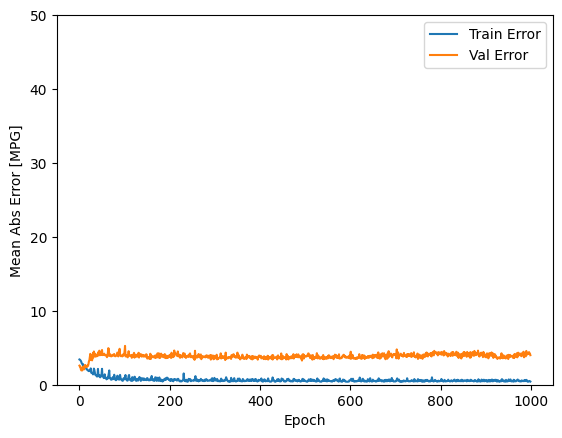

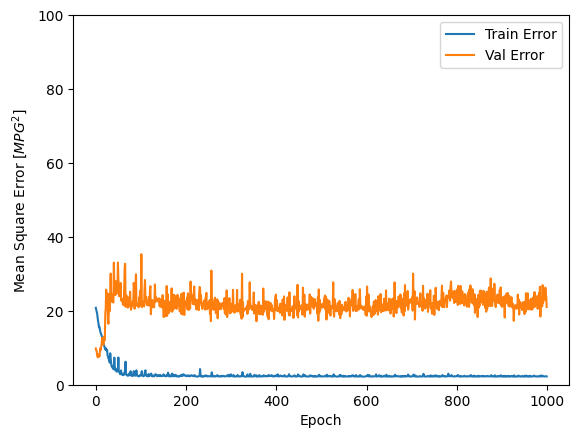


...........

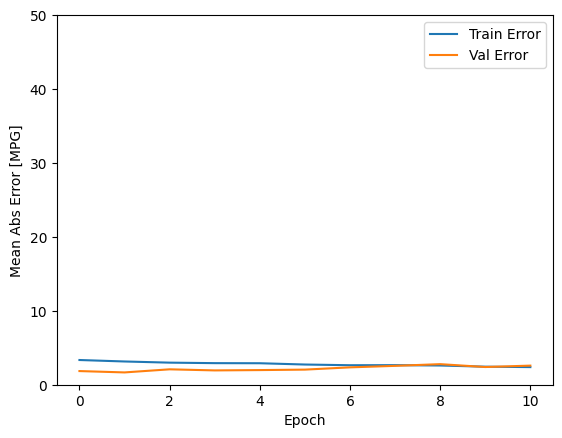

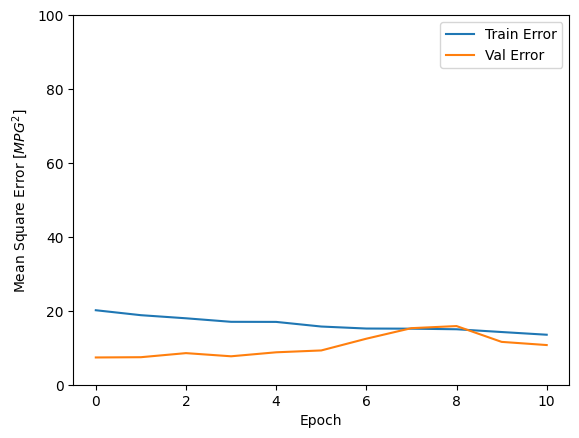

1/1 [==============================] - 0s 69ms/step
46
     F1   F2   F3   F4        F5   F6        F7        F8    F9  F10  ...  \
46  0.0  0.0  0.0  0.0  0.042857  0.0 -0.311508  0.010714 -0.15  0.0  ...   

    F57  F58  F59  F60  F61  F62  F63  F64  F65  interaction  
46    1    0    1    0    0    0    0    0    0     3.251276  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..................................

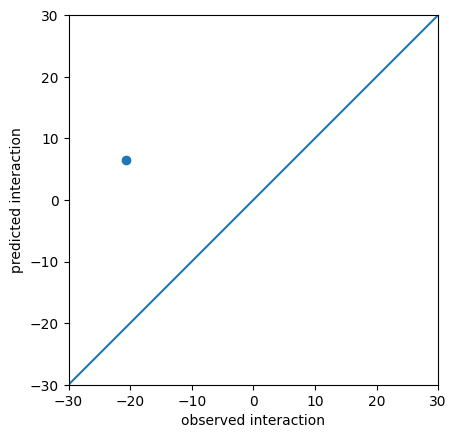

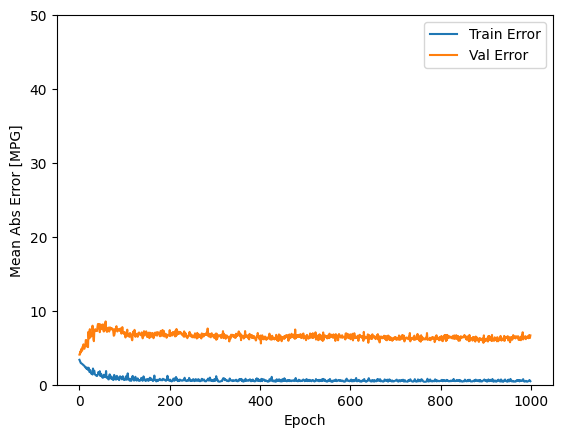

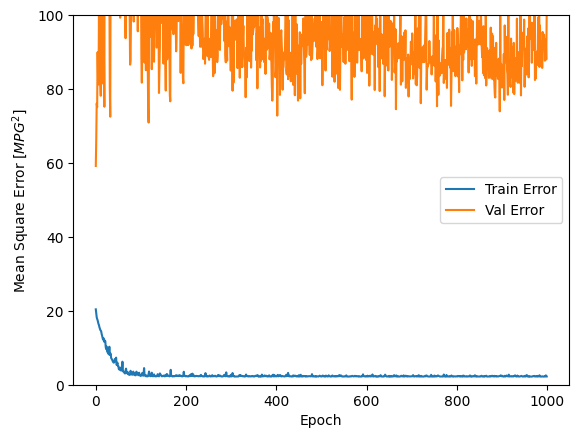


............

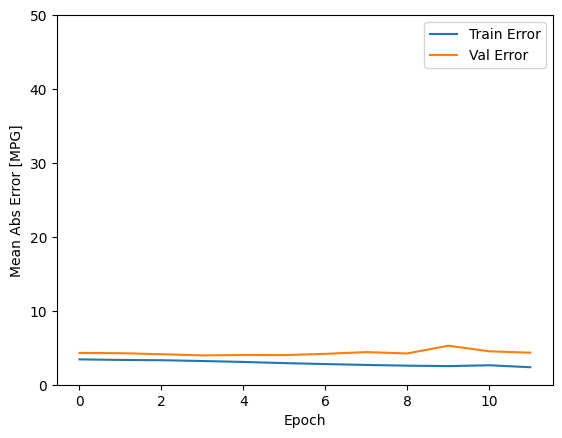

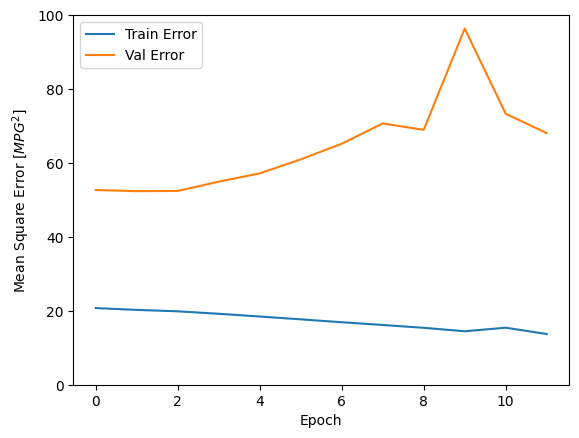

1/1 [==============================] - 0s 65ms/step
47
     F1   F2   F3   F4   F5   F6        F7   F8   F9  F10  ...  F57  F58  F59  \
47  0.0  0.0  0.0  0.0 -0.3  0.0 -0.622222  0.2  0.0  0.0  ...    1    0    1   

    F60  F61  F62  F63  F64  F65  interaction  
47    0    0    0    0    0    0     2.406624  

[1 rows x 66 columns]

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
........................................................

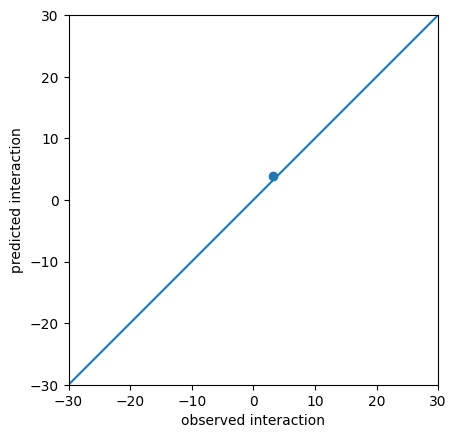

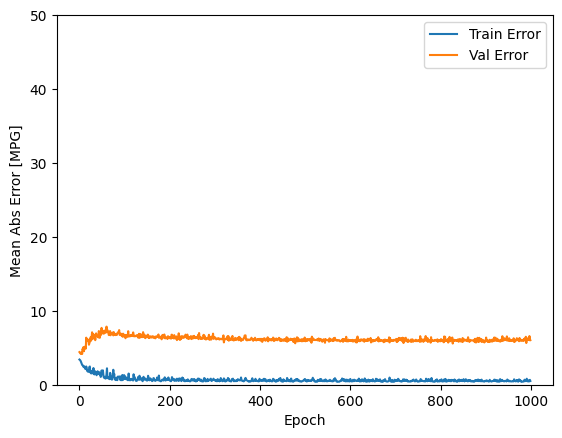

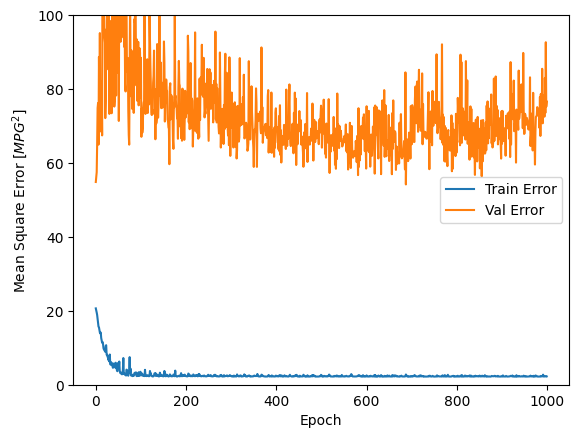


...........

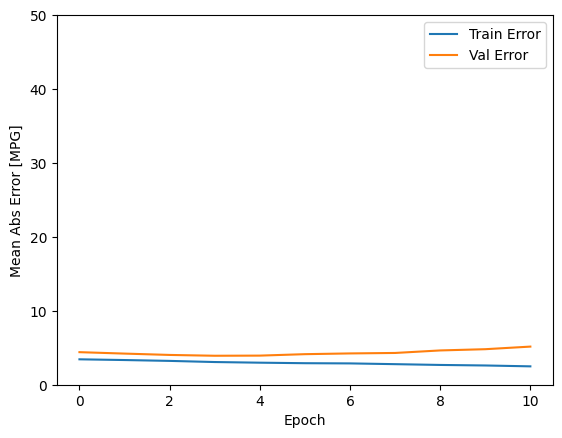

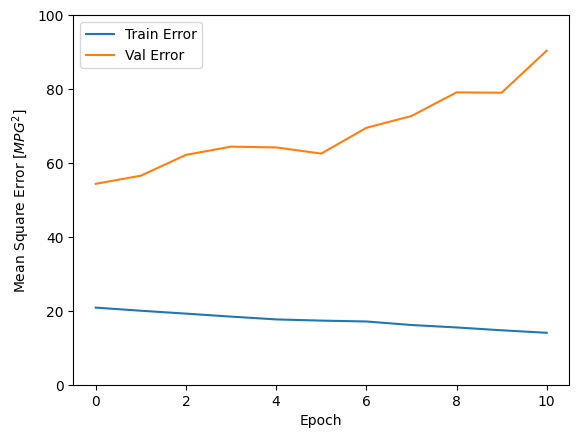

1/1 [==============================] - 0s 61ms/step


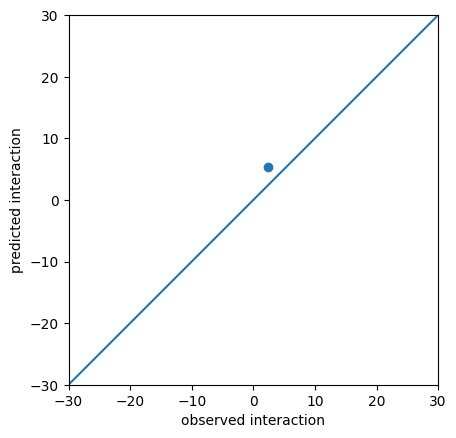

In [68]:
predict=np.array([])
observe=np.array([])

for indx in dataset.index:
    print(indx)
    test_dataset=dataset.loc[[indx]]
    train_dataset=dataset.drop(indx)
    print(test_dataset)
    #print(train_dataset)
    #从标签中分离特征
    train_labels = train_dataset.pop('interaction')
    test_labels = test_dataset.pop('interaction')
    normed_train_data = train_dataset
    normed_test_data = test_dataset
    #构建模型
    def build_model():
      model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(128, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
      ])
      optimizer = tf.keras.optimizers.RMSprop(0.001)
      model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
      return model
    model = build_model()
    #训练模型
    # 通过为每个完成的时期打印一个点来显示训练进度
    class PrintDot(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
    EPOCHS = 1000
    history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=0,
      callbacks=[PrintDot()])
    #plot difference
    def plot_history(history):
      hist = pd.DataFrame(history.history)
      hist['epoch'] = history.epoch
      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Mean Abs Error [MPG]')
      plt.plot(hist['epoch'], hist['mae'],
               label='Train Error')
      plt.plot(hist['epoch'], hist['val_mae'],
               label = 'Val Error')
      plt.ylim([0,50])
      plt.legend()
      plt.figure()
      plt.xlabel('Epoch')
      plt.ylabel('Mean Square Error [$MPG^2$]')
      plt.plot(hist['epoch'], hist['mse'],
               label='Train Error')
      plt.plot(hist['epoch'], hist['val_mse'],
               label = 'Val Error')
      plt.ylim([0,100])
      plt.legend()
      plt.show()
    plot_history(history)
    #优化模型
    model = build_model()
    # patience 值用来检查改进 epochs 的数量
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                        validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
    plot_history(history)
    #
    test_predictions = model.predict(normed_test_data).flatten()
    plt.scatter(test_labels, test_predictions)
    plt.xlabel('observed interaction')
    plt.ylabel('predicted interaction')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([-30,30])
    plt.ylim([-30,30])
    _ = plt.plot([-100, 100], [-100, 100])
    #添加参数
    predict=np.append(predict,test_predictions)
    observe=np.append(observe,test_labels.values)
    

    


In [69]:
print(predict)
print(observe)

[-0.73172981  3.57056451  0.89446539 -2.43985748  3.16946054  0.25716004
  2.78184366  1.51488018  0.29965946  0.7609272   0.86012924  1.45691109
  0.67288274 -1.30667973  1.3720504   2.09880447  0.57467836  0.92428446
  0.56455797  1.78914344  0.73225552  1.2497679   1.70896649  2.6308465
  0.82087731  0.79670852  1.06044304  0.71015871 -0.15492772  0.27005821
  0.59758776 -1.18897688  3.17841673  0.2714012   1.74807262 -0.1680609
  0.43304715  1.28450799  0.43819794  0.16820455  0.28662926  1.27237582
  0.29181886  9.80877113 -0.04386014  6.49765301  3.93931508  5.34059   ]
[ -0.02402018  -5.46608954   2.06187023  10.83826415   2.98350019
   3.25593677  -1.34317779  -0.65864215   3.3453856  -15.65007395
   5.39760799  -4.25445914  -1.88154344  -0.75341375   3.81970345
  -1.17748286   3.1907852    2.78260061  -1.20981068  -4.73755393
   3.38154539   1.48037583   2.74065565   4.27638796   0.82194021
  -5.21794474   2.98160228   2.17619932   2.10799624   6.35580177
  -0.57805326  -0.361

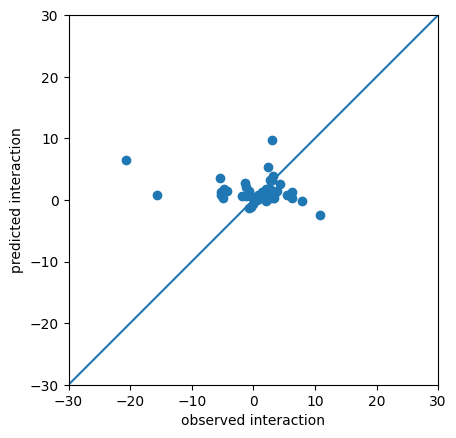

In [70]:
plt.scatter(observe, predict)
plt.xlabel('observed interaction')
plt.ylabel('predicted interaction')
plt.axis('equal')
plt.axis('square')
plt.xlim([-30,30])
plt.ylim([-30,30])
_ = plt.plot([-100, 100], [-100, 100])

In [72]:
np.corrcoef(predict,observe)

array([[ 1.        , -0.26207586],
       [-0.26207586,  1.        ]])

In [44]:
train_dataset = dataset.sample(frac=0.9,random_state=5)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([9, 14, 16, 35, 38], dtype='int64')


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

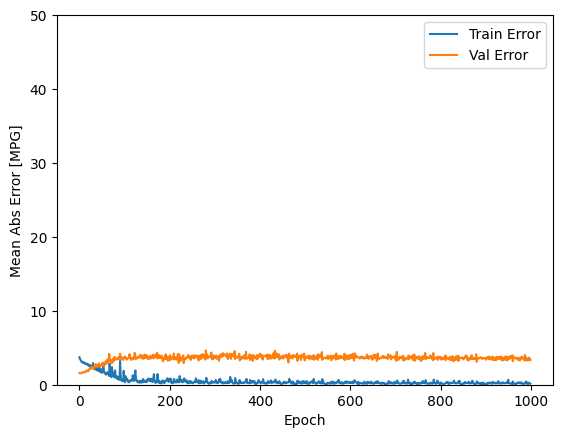

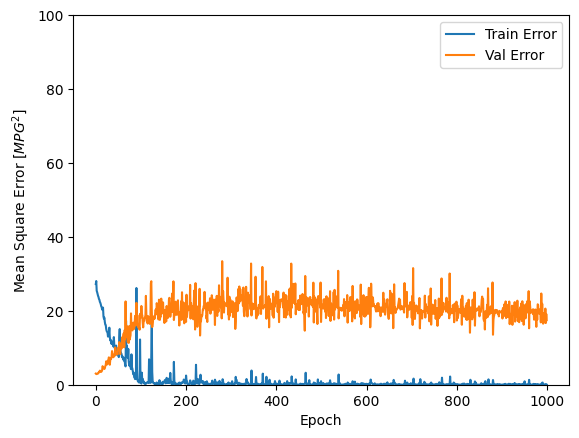


.................

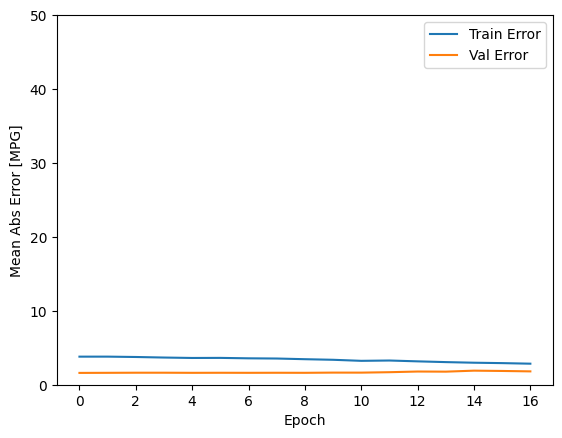

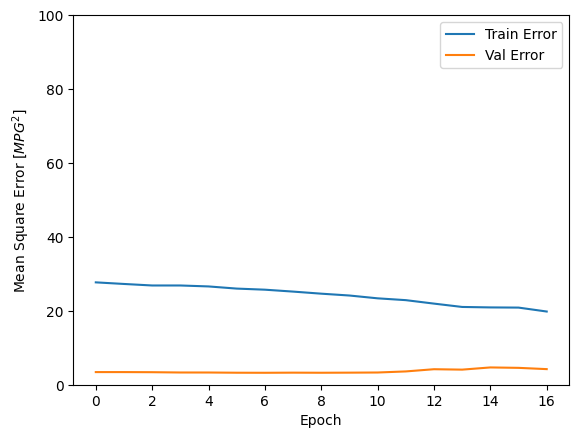

1/1 [==============================] - 0s 57ms/step


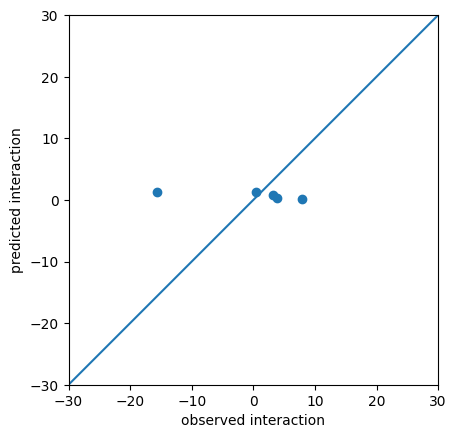

In [45]:
#从标签中分离特征

train_labels = train_dataset.pop('interaction')
test_labels = test_dataset.pop('interaction')

normed_train_data = train_dataset
normed_test_data = test_dataset

#构建模型
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = build_model()

#训练模型
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

#plot difference
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()


plot_history(history)
#优化模型
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

#
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('observed interaction')
plt.ylabel('predicted interaction')
plt.axis('equal')
plt.axis('square')
plt.xlim([-30,30])
plt.ylim([-30,30])
_ = plt.plot([-100, 100], [-100, 100])

#添加参数
predict=np.append(predict,test_predictions)
observe=np.append(observe,test_labels.values)


In [46]:
print(predict)
print(observe)

[ 1.09218180e+00  2.62406778e+00  1.68974674e+00  9.46363211e-01
  5.57137203e+00  4.87008870e-01  3.33610988e+00  1.99348330e+00
  1.35535336e+00  9.58170509e+00  1.61862397e+00  8.53298187e-01
  1.72371829e+00  2.07934856e+00  9.48040390e+00  1.04359198e+00
  1.26877141e+00  1.43464959e+00  3.29423517e-01  5.09630108e+00
 -4.07326102e-01 -2.15290213e+00  9.05178860e-03 -6.89961016e-02
 -3.86136681e-01  3.06583309e+00  1.20187175e+00  7.37938166e-01
  7.61770666e-01  4.65409803e+00  1.21640956e+00  2.60583431e-01
  8.65319729e-01  1.71523318e-01  1.24656355e+00]
[ -0.02402018  10.83826415   2.45986785   0.65658397 -20.69558784
  -0.02402018  10.83826415   2.45986785   0.65658397 -20.69558784
   3.3453856  -15.65007395  -1.88154344  -5.2375253    3.09185673
   3.3453856   -1.17748286   2.74065565   1.48281884 -20.69558784
  -0.02402018  10.83826415   3.3453856    0.82194021   1.39073745
  -5.46608954   3.25593677   4.27638796   1.48281884   3.25127631
 -15.65007395   3.81970345   3.190

In [47]:
np.corrcoef(predict,observe)[[1]]

array([[-0.46007545,  1.        ]])